<Figure size 1440x720 with 0 Axes>

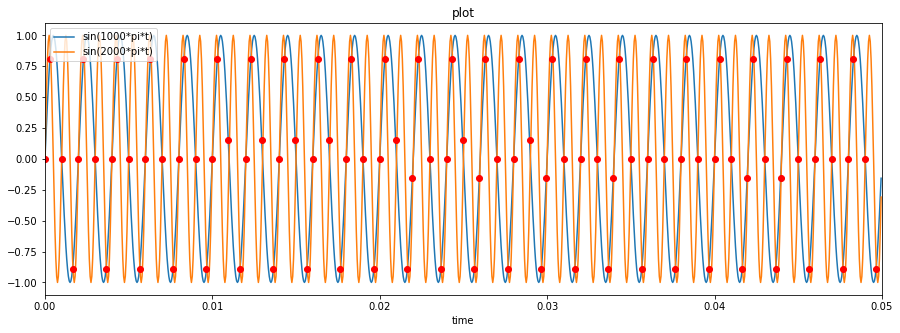

<ipython-input-16-f056acaaf844>:50: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_s3 = scipy.fft(s3)


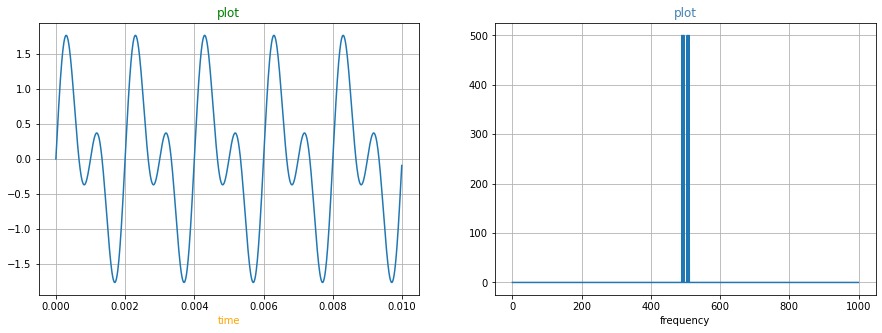

In [16]:
# Question 1

import numpy as np
import matplotlib.pyplot as plt
import scipy
from sympy.solvers import solve

# part 1

# defining the time interval
dt = 0.00005
t = np.arange(0, 0.05, dt)

# defining the two signals
s1 = np.sin(1000*np.pi*t)
s2 = np.sin(2000*np.pi*t)

plt.figure(figsize=(20,10))

# plotting signals on a same graph
fig, axs = plt.subplots(1,figsize=(15,5))
axs.plot(t, s1, label="sin(1000*pi*t)")
axs.plot(t, s2, label="sin(2000*pi*t)")
axs.set_xlabel("time")

plt.legend(loc="upper left")

axs.set_xlim(0,0.05)
axs.set_xlabel('time')
plt.title("plot")


# part 2

#finding intesections
intersections = np.argwhere(np.diff(np.sign(s1 - s2))).flatten()
# plotting the intersection points
plt.plot(t[intersections], s1[intersections], 'ro')
plt.show()


# part 3
dt2 = 0.00001
t2 = np.arange(0, 0.01, dt2)

s1_p = np.sin(1000*np.pi*t2)
s2_p = np.sin(2000*np.pi*t2)

s3 = s2_p + s1_p
fft_s3 = scipy.fft(s3)
#freq =scipy.fft.fftfreq(t.shape[-1])*2*np.pi
fft_s3_shift = scipy.fft.fftshift(fft_s3)

fig1, axs1 = plt.subplots(1,2,figsize=(15,5))
axs1[0].plot(t2, s3)
axs1[0].set_title("plot", color="green")
axs1[0].set_xlabel("time", color="orange")
axs1[0].grid()
axs1[1].plot(abs(fft_s3_shift))
axs1[1].set_title("plot", color="steelblue")
axs1[1].set_xlabel("frequency")
axs1[1].grid()



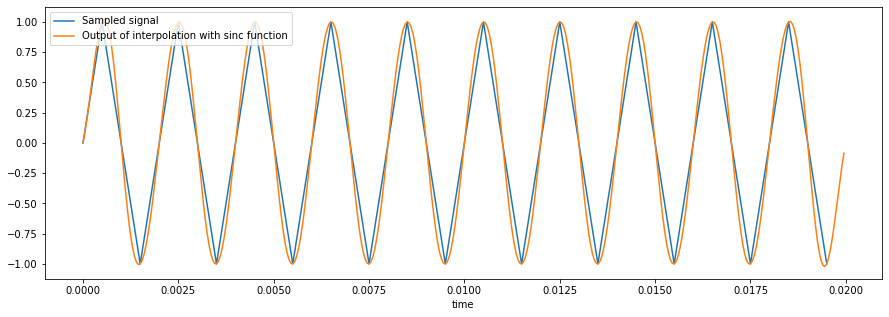

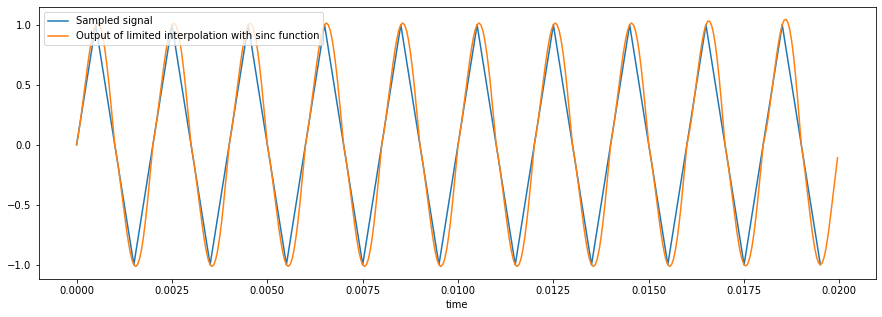

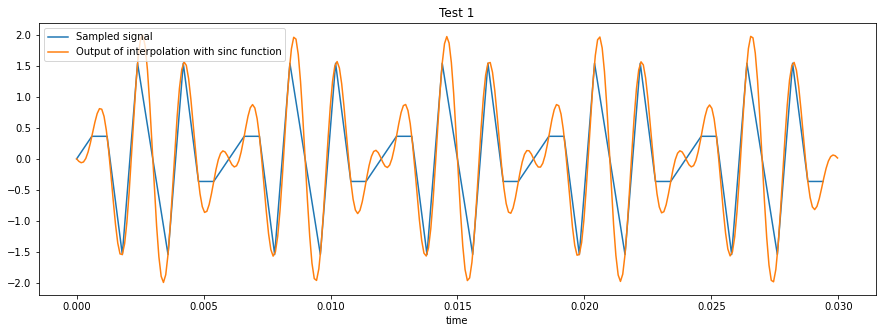

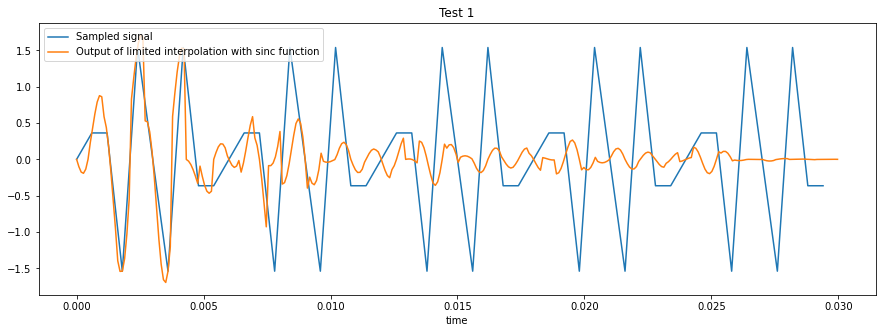

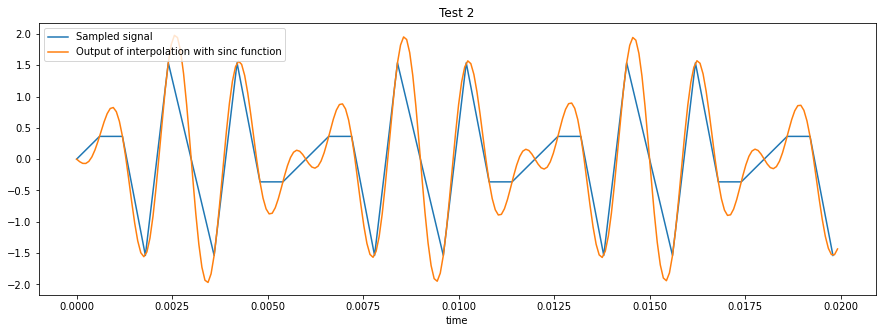

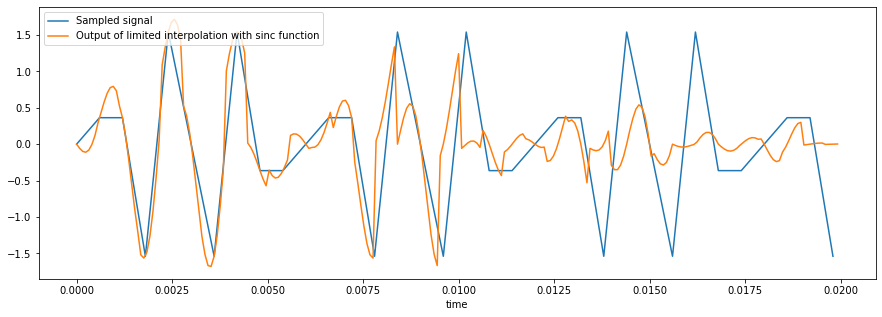

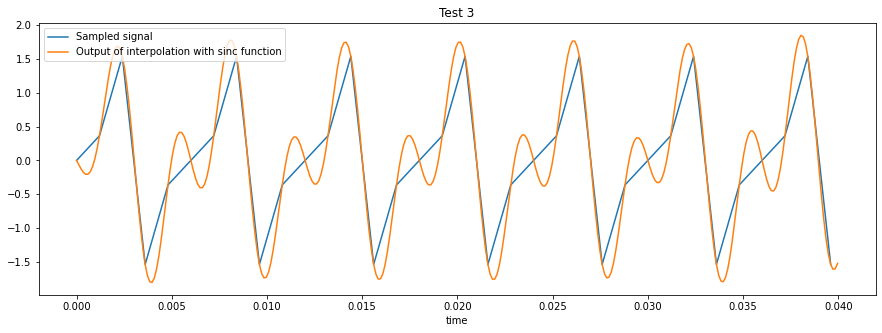

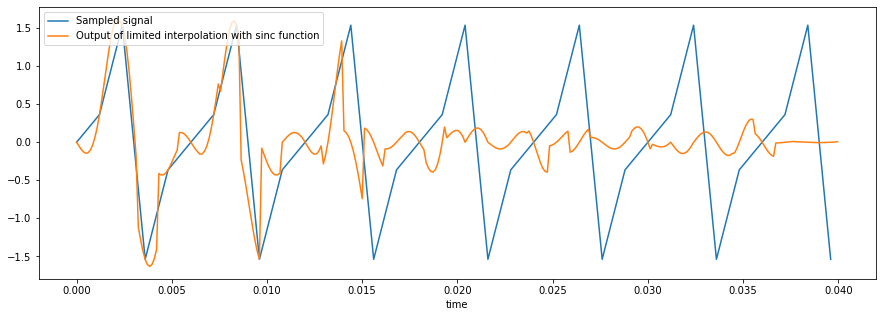

In [37]:
# Question 2
import numpy as np
import matplotlib.pyplot as plt

# Part 1
# Function defenition
def sinc_interpolation(y_n, n1, n2):
    y_r = []
    # T is the sampling rate
    T = n1[1] - n1[0]
    sum = 0
    for i in range(len(n2)):
        for j in range(len(n1)):
            if ((n2[i]-(j*T))!=0):
                sum = sum + y_n[j]*(np.sin((np.pi)*(n2[i]-(j*T))/T))/(((np.pi)*(n2[i]-(j*T)))/T)
            elif ((n2[i]-(j*T))==0):
                sum = sum + y_n[j]  # if the denominator gets zero, replace the whole fraction with 1
        y_r.append(sum)
        sum = 0
    return y_r


# Part 2
# Testing the function with the given signal

t1  = np.arange(0,0.02,0.0005)
t2  = np.arange(0,0.02, 0.00005)
y_n = np.sin(1000*np.pi*t1) + np.sin(2000*np.pi*t1)

y_r_1 = sinc_interpolation(y_n,t1,t2)
#print(y_r)

fig, axs = plt.subplots(1,figsize=(15,5))
axs.plot(t1, y_n, label="Sampled signal")
axs.plot(t2, y_r_1, label="Output of interpolation with sinc function")
axs.set_xlabel("time")
plt.legend(loc="upper left")


# Part 3

# Function defenition
def limited_sinc_interpolation(y_n, n1, n2):
    y_r = []
    # T is the sampling rate
    T = n1[1] - n1[0]
    sum = 0
    for i in range(len(n2)):
        k = int(i/int( len(n2)/len(n1) ))
        if k>(len(n1)-(int(len(n2)/len(n1)))):
            #k = int(len(n1)/2)
            interval1 = np.arange(k,len(n1))
            interval2 = np.arange(0,k-(len(n1)-int(len(n2)/len(n1))))
            for j in interval1: 
                if ((n2[i]-(j*T))!=0):
                    sum = sum + y_n[j]*(np.sin((np.pi)*(n2[i]-(j*T))/T))/(((np.pi)*(n2[i]-(j*T)))/T)
                elif ((n2[i]-(j*T))==0):
                    sum = sum + y_n[j]
            for j in interval2: 
                if ((n2[i]-(j*T))!=0):
                    sum = sum + y_n[j]*(np.sin((np.pi)*(n2[i]-(j*T))/T))/(((np.pi)*(n2[i]-(j*T)))/T)
                elif ((n2[i]-(j*T))==0):
                    sum = sum + y_n[j]
            y_r.append(sum)
            sum = 0
        elif k<=(len(n1)-(int(len(n2)/len(n1)))):
            interval = range(k, k + int(len(n2)/len(n1)) )
            for j in interval: 
                if ((n2[i]-(j*T))!=0):
                    sum = sum + y_n[j]*(np.sin((np.pi)*(n2[i]-(j*T))/T))/(((np.pi)*(n2[i]-(j*T)))/T)
                elif ((n2[i]-(j*T))==0):
                    sum = sum + y_n[j]
            y_r.append(sum)
            sum = 0
    return y_r

# Part 4

t1  = np.arange(0,0.02,0.0005)
t2  = np.arange(0,0.02, 0.00005)
y_n = np.sin(1000*np.pi*t1) + np.sin(2000*np.pi*t1)

y_r_2 = limited_sinc_interpolation(y_n,t1,t2)
#print(y_r)

fig1, axs1 = plt.subplots(1,figsize=(15,5))
axs1.plot(t1, y_n, label="Sampled signal")
axs1.plot(t2, y_r_2, label="Output of limited interpolation with sinc function")
axs1.set_xlabel("time")
plt.legend(loc="upper left")

# Part 5
# changing the sampling frequency

# Test 1
t3  = np.arange(0,0.03,0.0006)
t4  = np.arange(0,0.03, 0.00009)
y_n_3 = np.sin(1000*np.pi*t3) + np.sin(2000*np.pi*t3)

y_r_3 = sinc_interpolation(y_n_3,t3,t4)
y_r_4 = limited_sinc_interpolation(y_n_3,t3,t4)

fig2, axs2 = plt.subplots(1,figsize=(15,5))
axs2.plot(t3, y_n_3, label="Sampled signal")
axs2.plot(t4, y_r_3, label="Output of interpolation with sinc function")
axs2.set_xlabel("time")
plt.title("Test 1")
plt.legend(loc="upper left")

fig3, axs3 = plt.subplots(1,figsize=(15,5))
axs3.plot(t3, y_n_3, label="Sampled signal")
axs3.plot(t4, y_r_4, label="Output of limited interpolation with sinc function")
axs3.set_xlabel("time")
plt.title("Test 1")
plt.legend(loc="upper left")

# Test 2
t5  = np.arange(0,0.02,0.0006)
t6  = np.arange(0,0.02, 0.00008)
y_n_4 = np.sin(1000*np.pi*t5) + np.sin(2000*np.pi*t5)

y_r_5 = sinc_interpolation(y_n_4,t5,t6)
y_r_6 = limited_sinc_interpolation(y_n_4,t5,t6)

fig4, axs4 = plt.subplots(1,figsize=(15,5))
axs4.plot(t5, y_n_4, label="Sampled signal")
axs4.plot(t6, y_r_5, label="Output of interpolation with sinc function")
axs4.set_xlabel("time")
plt.title("Test 2")
plt.legend(loc="upper left")

fig5, axs5 = plt.subplots(1,figsize=(15,5))
axs5.plot(t5, y_n_4, label="Sampled signal")
axs5.plot(t6, y_r_6, label="Output of limited interpolation with sinc function")
axs5.set_xlabel("time")
plt.legend(loc="upper left")

# Test 3
t7  = np.arange(0,0.04,0.0012)
t8  = np.arange(0,0.04, 0.00012)
y_n_5 = np.sin(1000*np.pi*t7) + np.sin(2000*np.pi*t7)

y_r_6 = sinc_interpolation(y_n_5,t7,t8)
y_r_7 = limited_sinc_interpolation(y_n_5,t7,t8)

fig5, axs5 = plt.subplots(1,figsize=(15,5))
axs5.plot(t7, y_n_5, label="Sampled signal")
axs5.plot(t8, y_r_6, label="Output of interpolation with sinc function")
axs5.set_xlabel("time")
plt.title("Test 3")
plt.legend(loc="upper left")

fig6, axs6 = plt.subplots(1,figsize=(15,5))
axs6.plot(t7, y_n_5, label="Sampled signal")
axs6.plot(t8, y_r_7, label="Output of limited interpolation with sinc function")
axs6.set_xlabel("time")
plt.legend(loc="upper left")



In [61]:
# Question 3

from scipy.sparse import diags
import numpy as np

# creating the 4*4 matrix

# part a
matrix1 = diags([1, 7, -1,6], 0).toarray()
print("The reqiured matrix for part 1 is: ", matrix1)

# part b
matrix2 = np.random.randint(1,10,size=(4,4))
print("The 4*4 random matrix for part 2 is: ", matrix2)

# part c
with open('matrixes.csv', 'wb') as f:
    np.save(f, matrix1)
    np.save(f, matrix2)
with open('matrixes.csv', 'rb') as f:
    a = np.load(f)
    b = np.load(f)
print("Mattrix of part 1 loaded from the file is: ", a)
print("Mattrix of part 2 loaded from the file is: ", b)


# part d
# function defenition
def size_comparator (matrix1, matrix2):
    rows1 = len(matrix1)
    columns1 = len(matrix1[0])
    rows2 = len(matrix2)
    columns2 = len(matrix2[0])
    if ((rows1==columns1)&(rows2==columns2)&(rows1==columns2)):
        addition = np.add(matrix1, matrix2)
        multiplication = np.matmul(matrix1, matrix2)
        return addition, multiplication
    else:
        return "These two matrixes are not of the same size!"
        
        
    
# testing the function
test_matrix1 = [[1, 2], [2, 2], [2, 3]]
test_matrix2 = [[2, 4, 3], [1, 10, 5], [21, 15, 3]]
res1 = size_comparator (test_matrix1, test_matrix2)
print("The first pair of test matrixes: ")
print(test_matrix1)
print(test_matrix2)
print("Result of testing the function with the first pair of examples: ", res1)


test_matrix3 = [[1, 2, 10], [2, 2, 2], [2, 3, 4]]
test_matrix4 = [[2, 4, 3], [1, 10, 5], [21, 15, 3]]
res2 = size_comparator (test_matrix3, test_matrix4)
print("The second pair of test matrixes: ")
print(test_matrix3)
print(test_matrix4)
print("Result of testing the function with the second pair of examples: ")
print("Addition of two matrixes: ", res2[0])
print("Multiplication of two matrixes: ", res2[1])

# part e
res = size_comparator (matrix1, matrix2)
print("Output of function for matrixes of part 1 and 2: ")
print("Addition of two matrixes: ", res[0])
print("Multiplication of two matrixes: ", res[1])



The reqiured matrix for part 1 is:  [[ 1.  0.  0.  0.]
 [ 0.  7.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  6.]]
The 4*4 random matrix for part 2 is:  [[9 4 3 4]
 [3 9 5 2]
 [7 7 2 8]
 [7 7 7 4]]
Mattrix of part 1 loaded from the file is:  [[ 1.  0.  0.  0.]
 [ 0.  7.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  6.]]
Mattrix of part 2 loaded from the file is:  [[9 4 3 4]
 [3 9 5 2]
 [7 7 2 8]
 [7 7 7 4]]
The first pair of test matrixes: 
[[1, 2], [2, 2], [2, 3]]
[[2, 4, 3], [1, 10, 5], [21, 15, 3]]
Result of testing the function with the first pair of examples:  These two matrixes are not of the same size!
The second pair of test matrixes: 
[[1, 2, 10], [2, 2, 2], [2, 3, 4]]
[[2, 4, 3], [1, 10, 5], [21, 15, 3]]
Result of testing the function with the second pair of examples: 
Addition of two matrixes:  [[ 3  6 13]
 [ 3 12  7]
 [23 18  7]]
Multiplication of two matrixes:  [[214 174  43]
 [ 48  58  22]
 [ 91  98  33]]
Output of function for matrixes of part 1 and 2: 
Addition of two matrix

In [67]:
# Question 4

import numpy as np
x = 0
level_num = 0
a = []
a.append(np.random.randint(0,9))
a.append(np.random.randint(0,9))
a.append(np.random.randint(0,9))
a.append(np.random.randint(0,9))
print (a)

while ((x!=1) & (level_num!=10)):
    guessed_num = input("Enter your 4 digit guess code: ");
    #print(type(guessed_num))
    count = 0;
    for i in range(len(guessed_num)):
        if ((int(guessed_num[i]) in a)==False):
            #print((int(guessed_num[i])))
            print("F", end="")
        elif (int(guessed_num[i]) == a[i]):
            print("T", end="")
            count = count + 1
        else:
            print("S", end="")
    if (count==4):
        x = 1
        print("")
        print("  You guessed it !   ", a )
    level_num = level_num + 1
    if ((level_num == 10)&(x!=1)):
        print("")
        print("You ran out of tries !")
    print(" ")
        
        
        
            
               
            
     

[3, 4, 5, 5]
Enter your 4 digit guess code: 5410
STFF 
Enter your 4 digit guess code: 5251
SFTF 
Enter your 4 digit guess code: 3554
TSTS 
Enter your 4 digit guess code: 3455
TTTT
  You guessed it !    [3, 4, 5, 5]
 


Text(0.5, 1.0, 'Three signals with fs = 90 KHz')

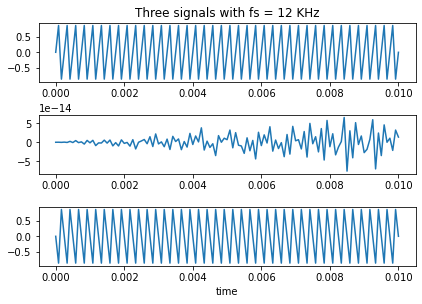

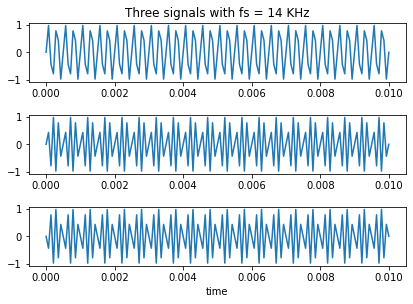

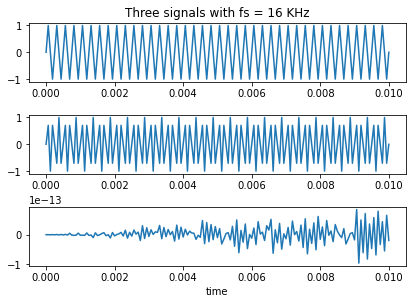

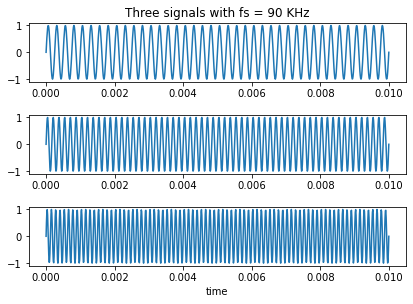

In [68]:
# Question 6

############### Part a

import numpy as np
import matplotlib.pyplot as plt



t1 = np.linspace(0, 0.01, 121)
t2 = np.linspace(0, 0.01, 141)
t3 = np.linspace(0, 0.01, 161)
t4 = np.linspace(0, 0.01, 901)

### firt signal

# fc = 12 KHz
s1_1 = np.sin(2*np.pi*4000*t1)
# fc = 14 KHz
s1_2 = np.sin(2*np.pi*4000*t2)
# fc = 16 KHz
s1_3 = np.sin(2*np.pi*4000*t3)
# fc = 18 KHz
s1_4 = np.sin(2*np.pi*4000*t4)


### second signal

# fc = 12 KHz
s2_1 = np.sin(2*np.pi*6000*t1)
# fc = 14 KHz
s2_2 = np.sin(2*np.pi*6000*t2)
# fc = 16 KHz
s2_3 = np.sin(2*np.pi*6000*t3)
# fc = 18 KHz
s2_4 = np.sin(2*np.pi*6000*t4)

### third signal

# fc = 12 KHz
s3_1 = np.sin(2*np.pi*8000*t1)
# fc = 14 KHz
s3_2 = np.sin(2*np.pi*8000*t2)
# fc = 16 KHz
s3_3 = np.sin(2*np.pi*8000*t3)
# fc = 18 KHz
s3_4 = np.sin(2*np.pi*8000*t4)

# plotting
fig, axs = plt.subplots(3)
fig.tight_layout(pad=1.2)
axs[0].plot(t1, s1_1)
axs[1].plot(t1, s2_1)
axs[2].plot(t1, s3_1)
axs[2].set_xlabel('time')
axs[0].set_title("Three signals with fs = 12 KHz")

fig, axs = plt.subplots(3)
fig.tight_layout(pad=1.2)
axs[0].plot(t2, s1_2)
axs[1].plot(t2, s2_2)
axs[2].plot(t2, s3_2)
axs[2].set_xlabel('time')
axs[0].set_title("Three signals with fs = 14 KHz")

fig, axs = plt.subplots(3)
fig.tight_layout(pad=1.2)
axs[0].plot(t3, s1_3)
axs[1].plot(t3, s2_3)
axs[2].plot(t3, s3_3)
axs[2].set_xlabel('time')
axs[0].set_title("Three signals with fs = 16 KHz")

fig, axs = plt.subplots(3)
fig.tight_layout(pad=1.2)
axs[0].plot(t4, s1_4)
axs[1].plot(t4, s2_4)
axs[2].plot(t4, s3_4)
axs[2].set_xlabel('time')
axs[0].set_title("Three signals with fs = 90 KHz")






Note: you may need to restart the kernel to use updated packages.


<ipython-input-79-2e625b189e57>:11: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  st_1_fft = scipy.fft(st_1)
<ipython-input-79-2e625b189e57>:17: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  st_2_fft = scipy.fft(st_2)
<ipython-input-79-2e625b189e57>:23: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  st_3_fft = scipy.fft(st_3)
<ipython-input-79-2e625b189e57>:29: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  st_4_fft = scipy.fft(st_4)


Text(0.5, 50.99999999999994, 'frequency')

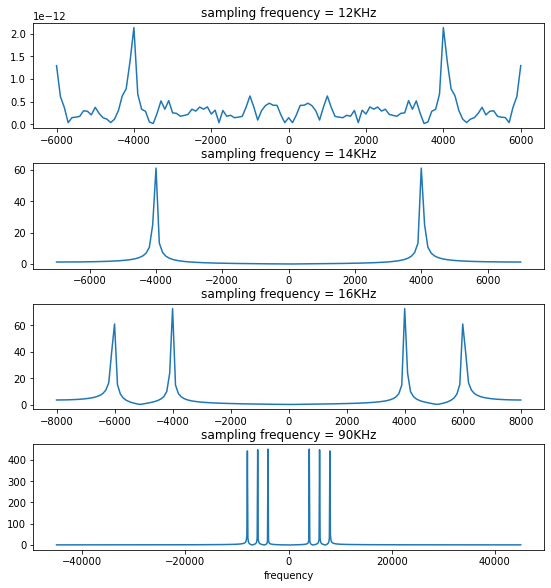

In [79]:
# Question 6

################# Part b

import matplotlib.pyplot as plt
import numpy as np


# fc = 12 KHz
st_1 = s1_1 + s2_1 + s3_1 
st_1_fft = scipy.fft(st_1)
st_1_fft = scipy.fft.fftshift(st_1_fft)
interval_1 = np.linspace(-6000,6000,121)

# fc = 14 KHz
st_2 = s1_2 + s2_2 + s3_2
st_2_fft = scipy.fft(st_2)
st_2_fft = scipy.fft.fftshift(st_2_fft)
interval_2 = np.linspace(-7000,7000,141)

# fc = 16 KHz
st_3 = s1_3 + s2_3 + s3_3
st_3_fft = scipy.fft(st_3)
st_3_fft = scipy.fft.fftshift(st_3_fft)
interval_3 = np.linspace(-8000,8000,161)

# fc = 90 KHz
st_4 = s1_4 + s2_4 + s3_4
st_4_fft = scipy.fft(st_4)
st_4_fft = scipy.fft.fftshift(st_4_fft)
interval_4 = np.linspace(-45000,45000,901)




fig, axs = plt.subplots(4,figsize=(8,8))
fig.tight_layout(pad=1.4)
axs[0].plot(interval_1, abs(st_1_fft))
axs[0].set_title("sampling frequency = 12KHz")
axs[1].plot(interval_2, abs(st_2_fft))
axs[1].set_title("sampling frequency = 14KHz")
axs[2].plot(interval_3, abs(st_3_fft))
axs[2].set_title("sampling frequency = 16KHz")
axs[3].plot(interval_4, abs(st_4_fft))
axs[3].set_title("sampling frequency = 90KHz")
axs[3].set_xlabel("frequency")






In [ ]:
pip install python-ffmpeg

<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scip

<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))
<ipython-input-3-de166b0ff835>:22: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  fft_st = scipy.fft(st)
<ipython-input-3-de166b0ff835>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

1

<Figure size 432x288 with 0 Axes>

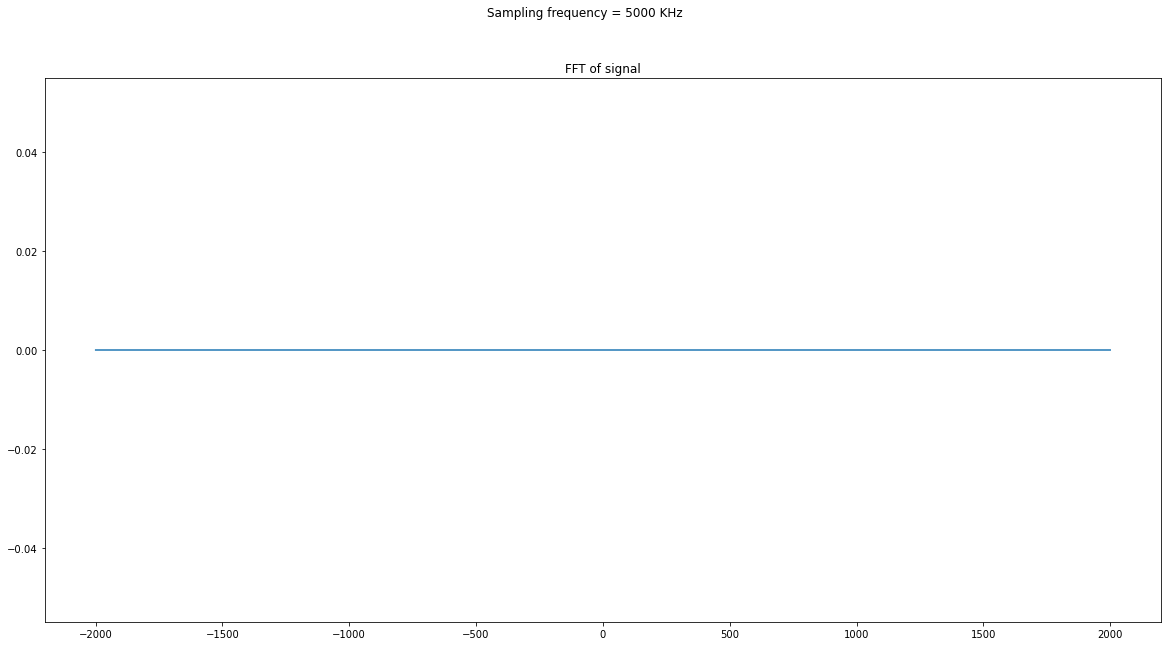

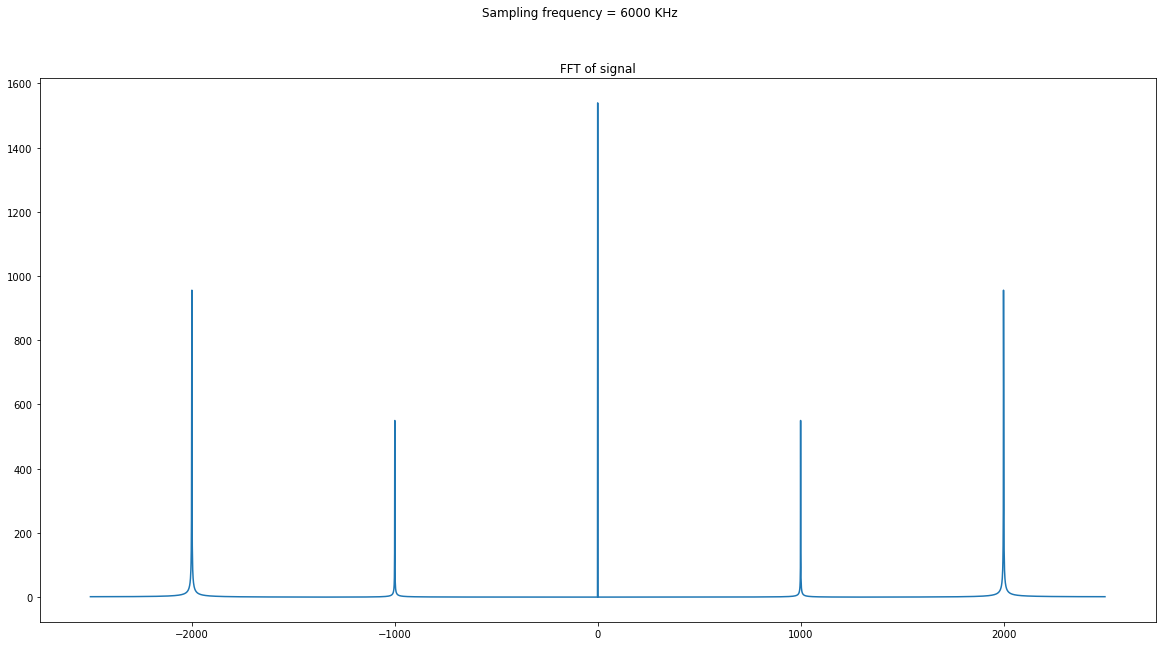

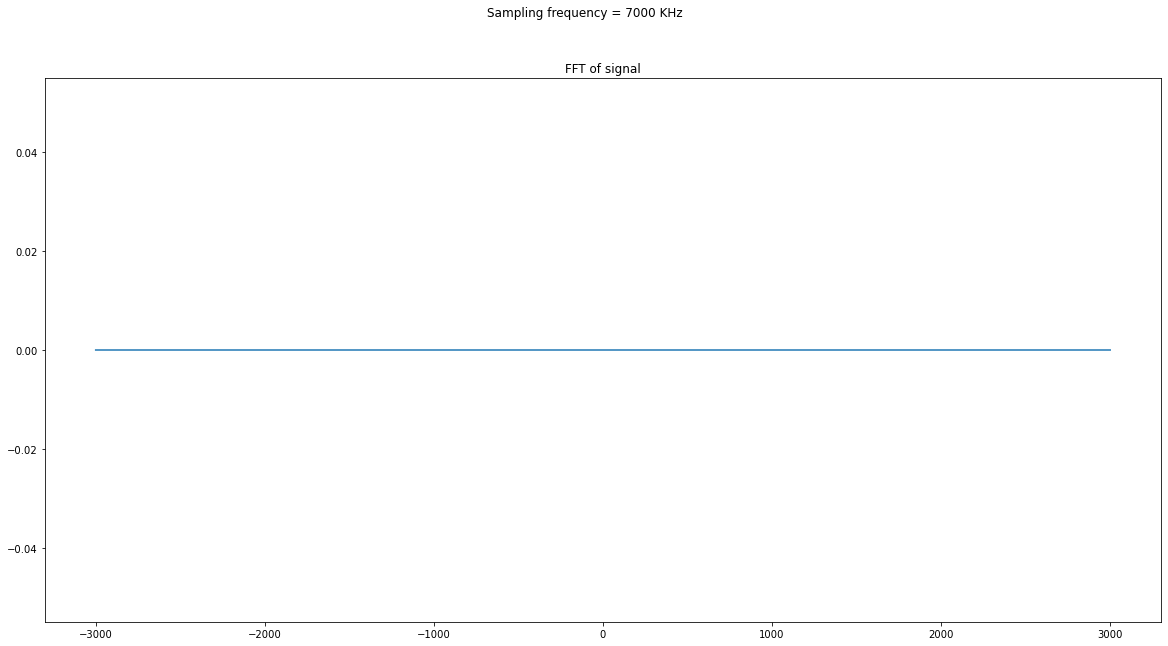

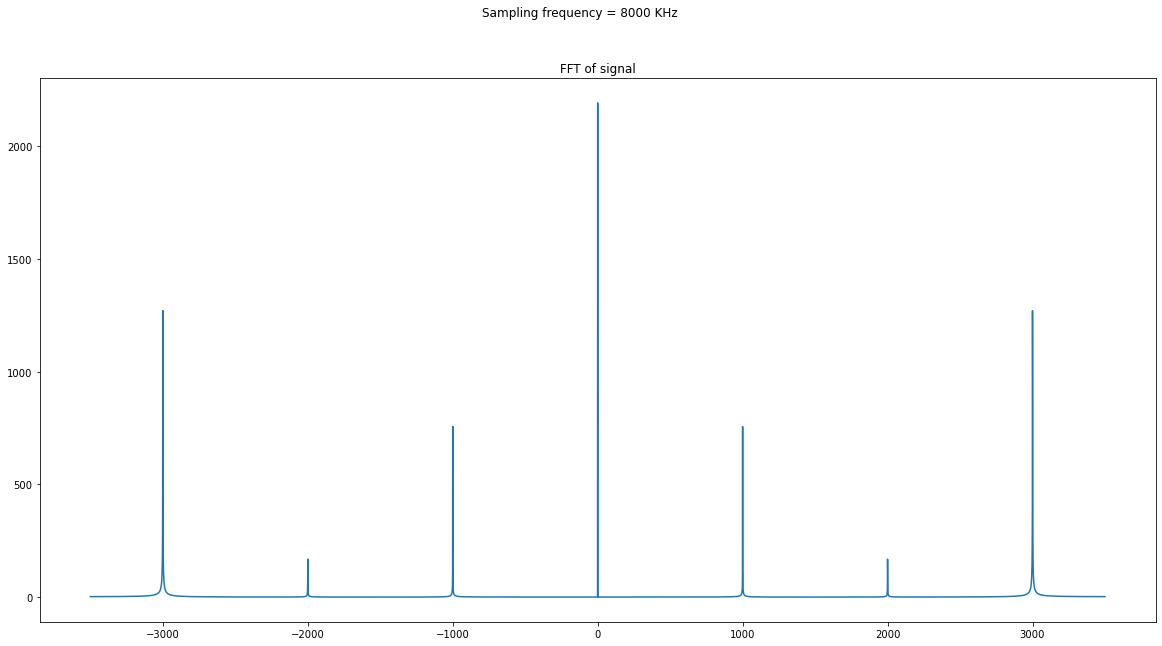

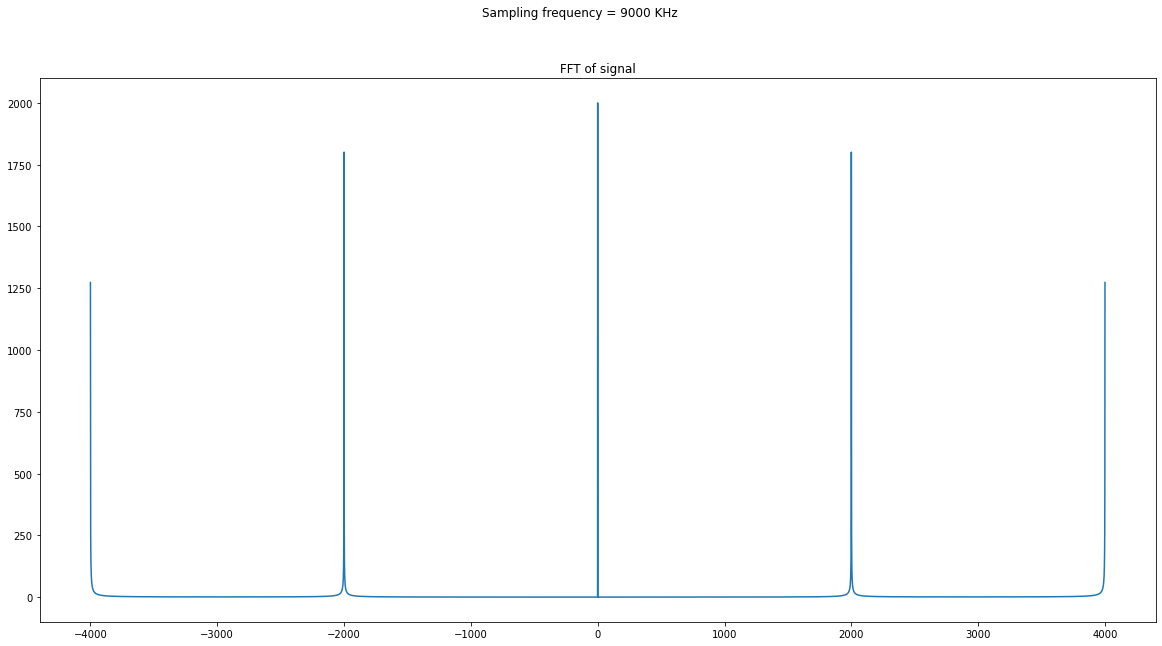

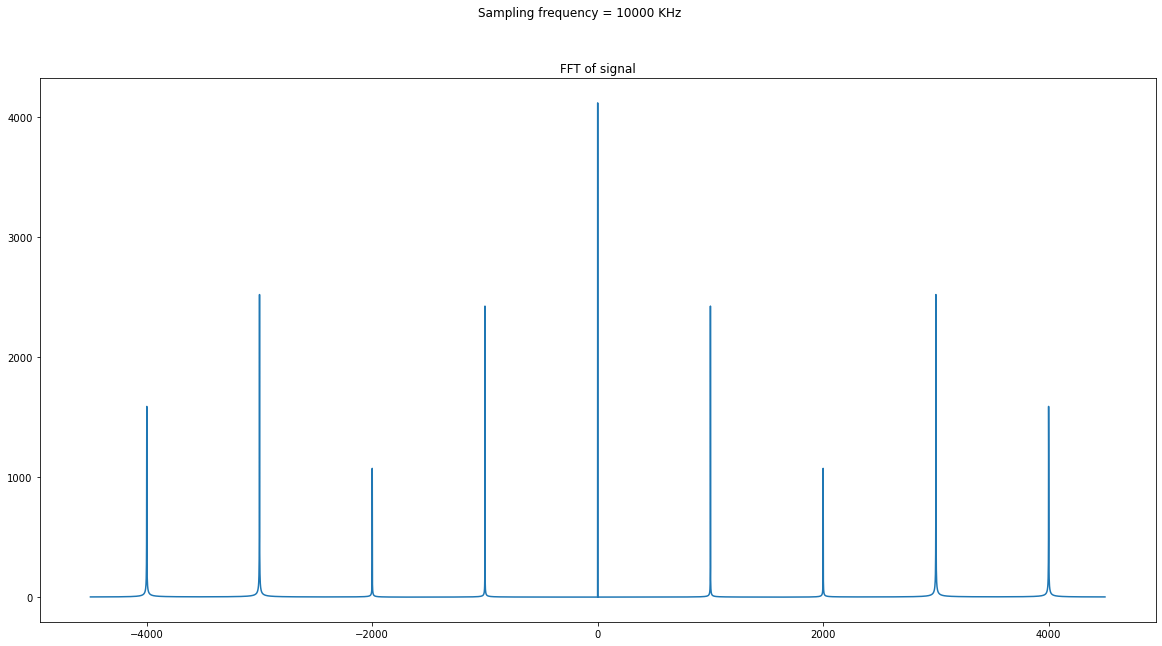

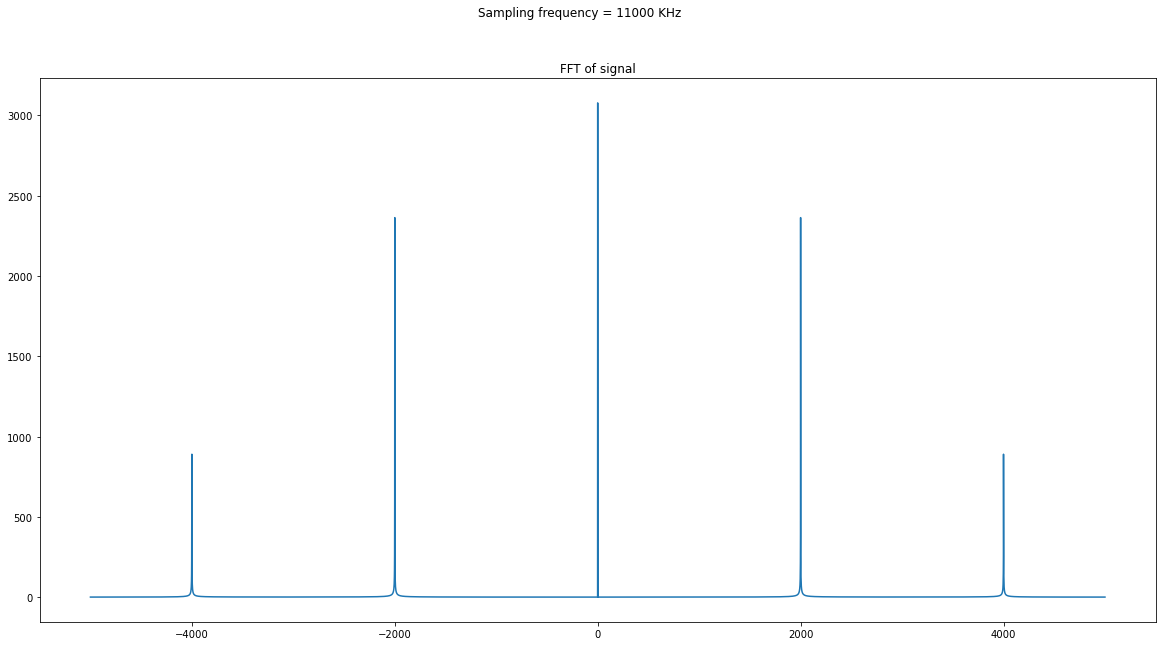

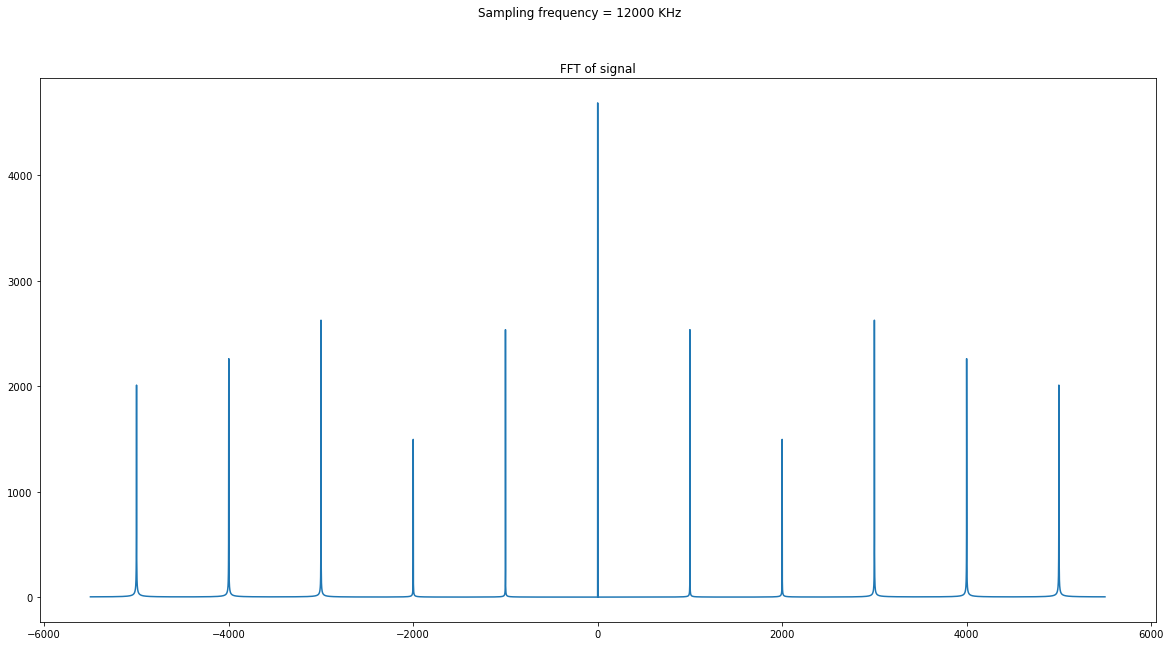

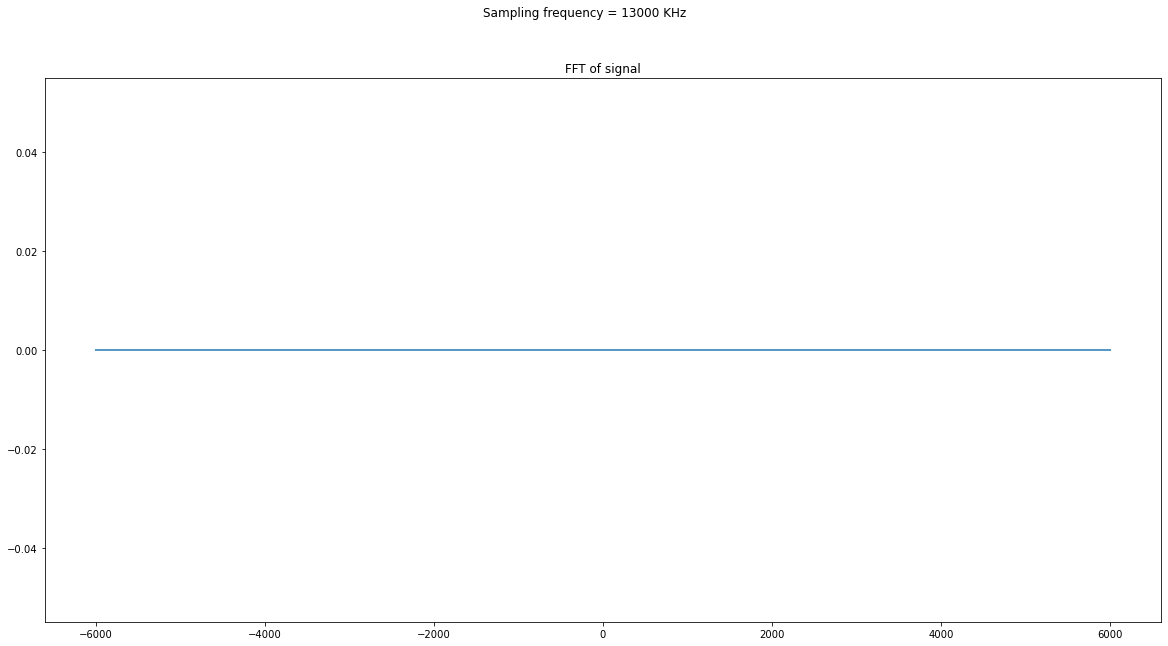

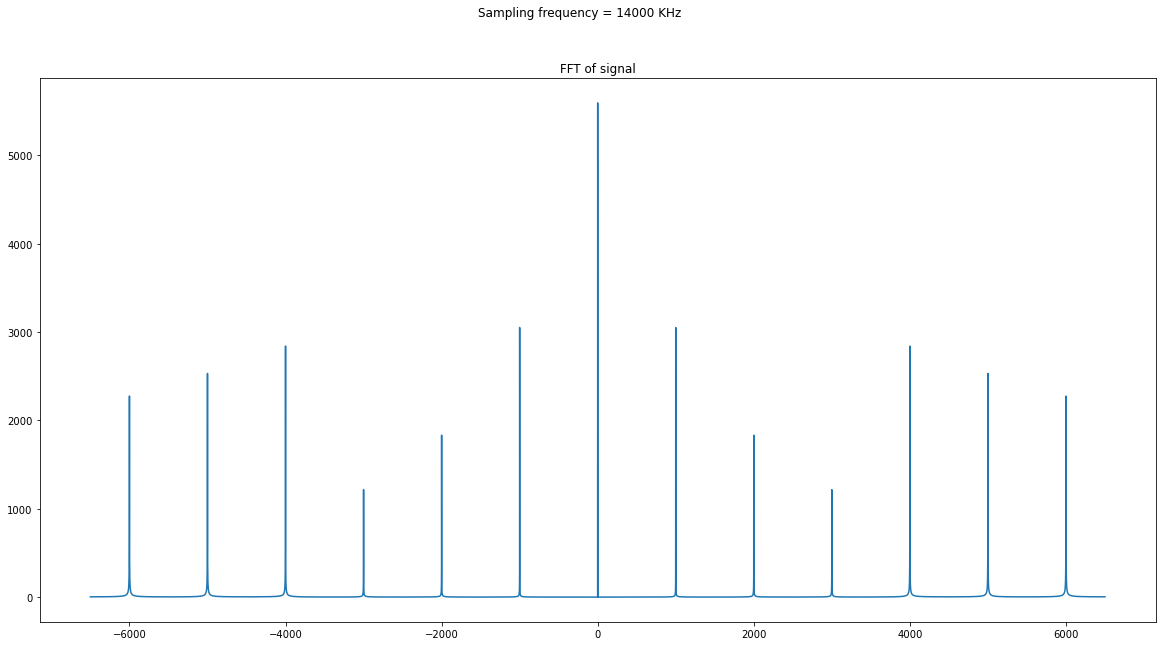

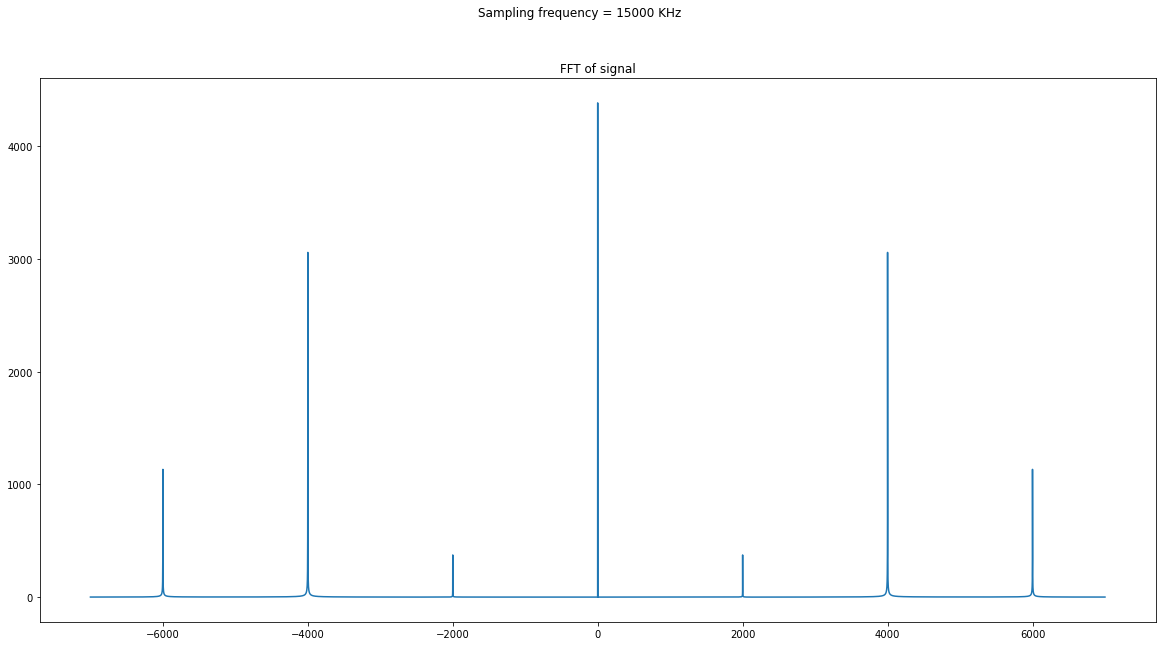

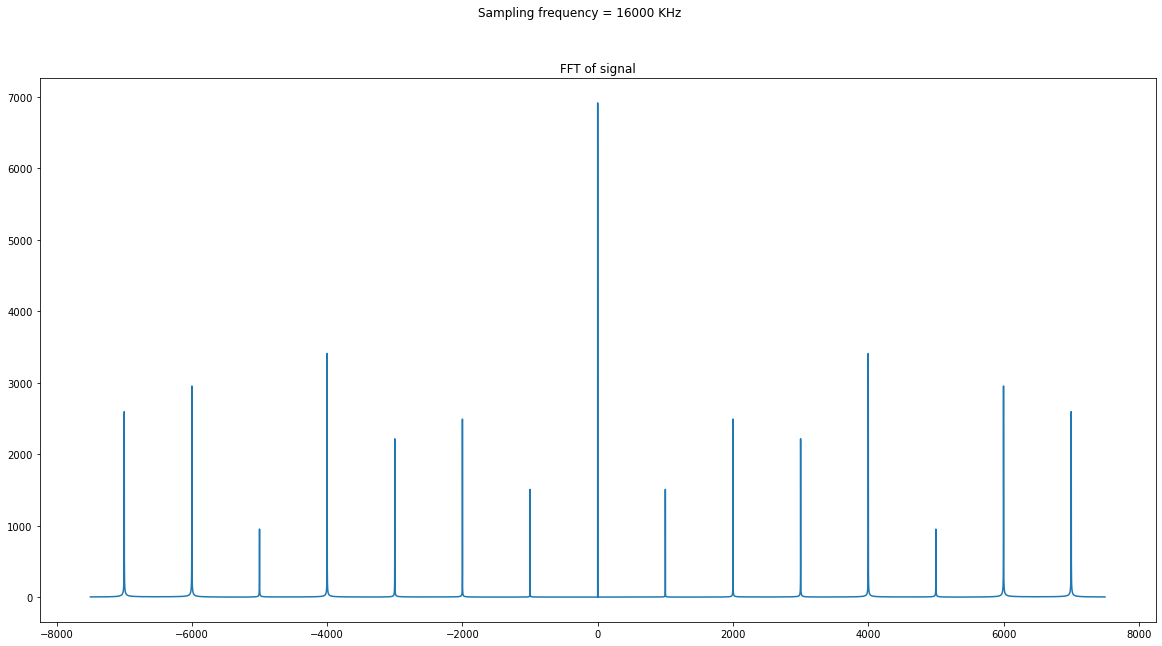

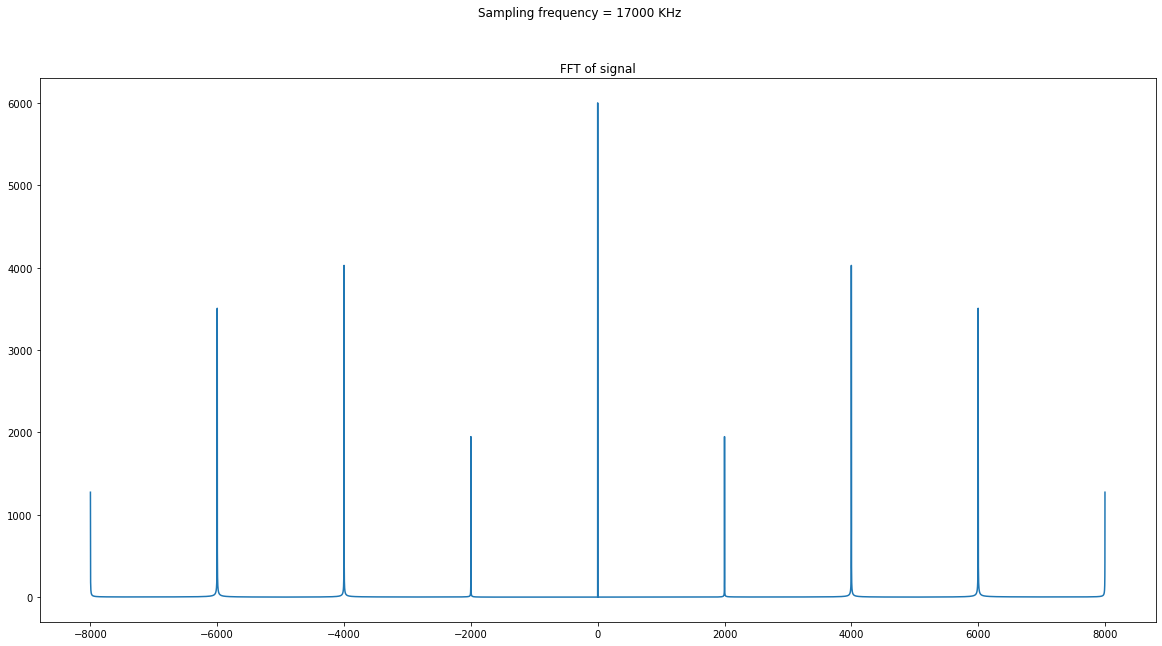

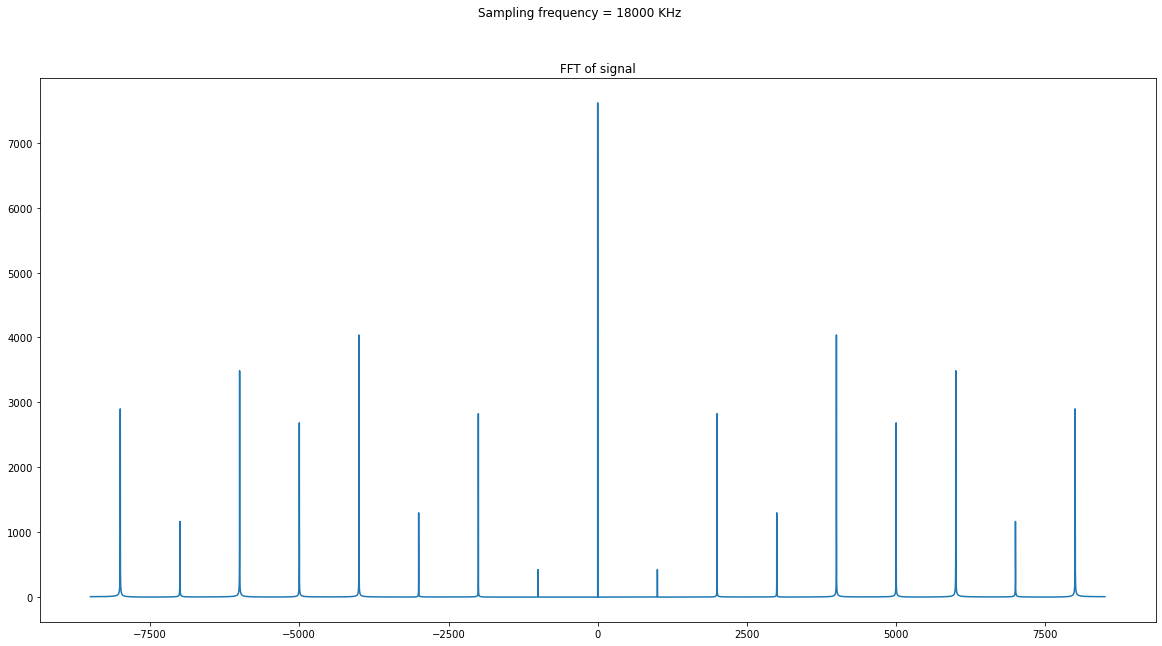

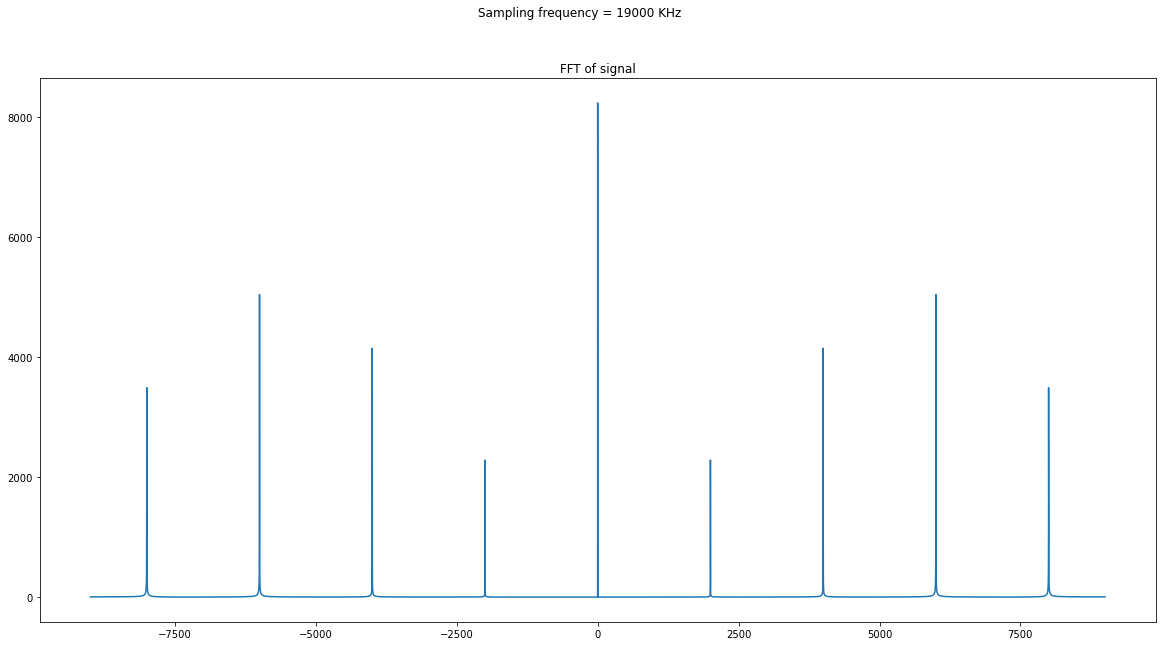

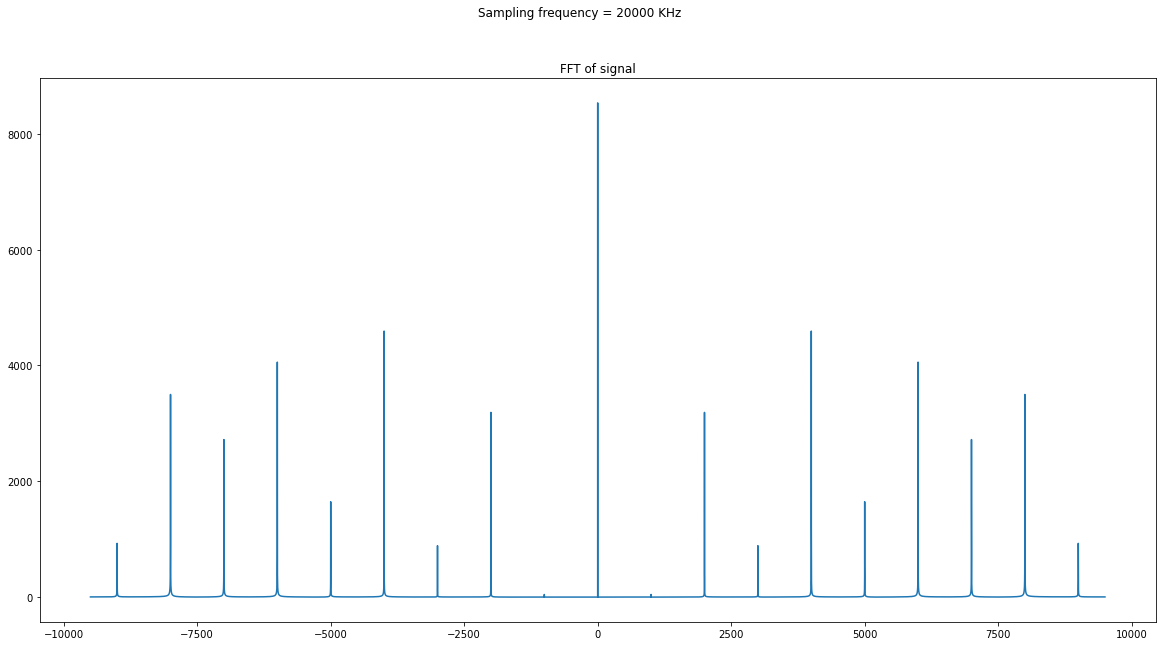

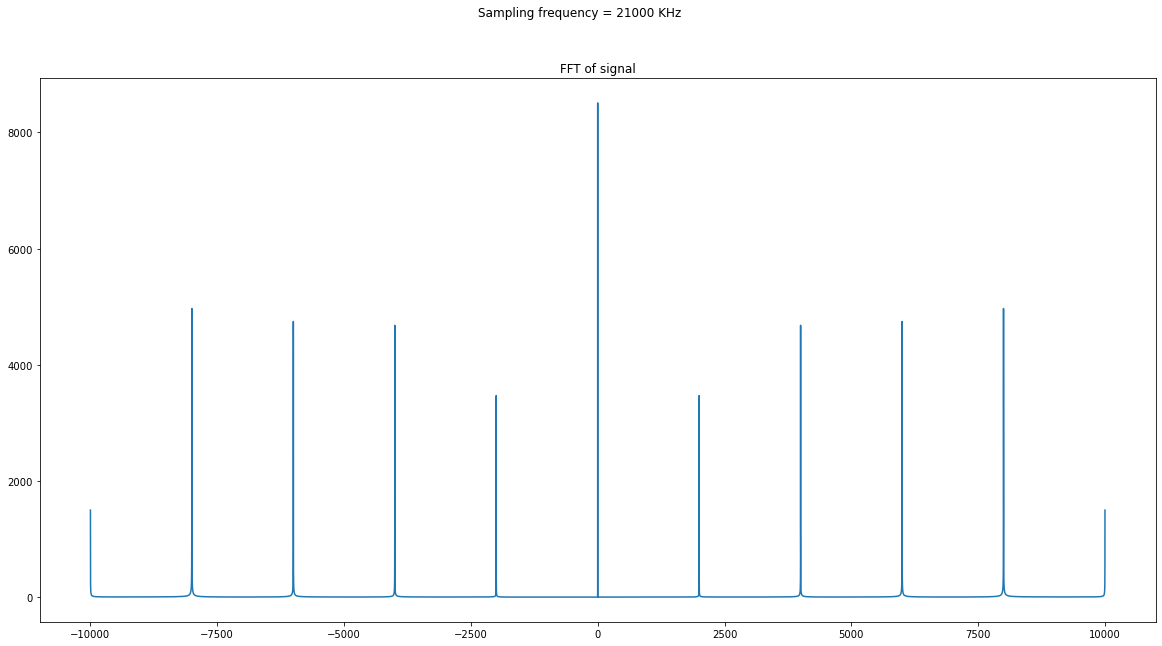

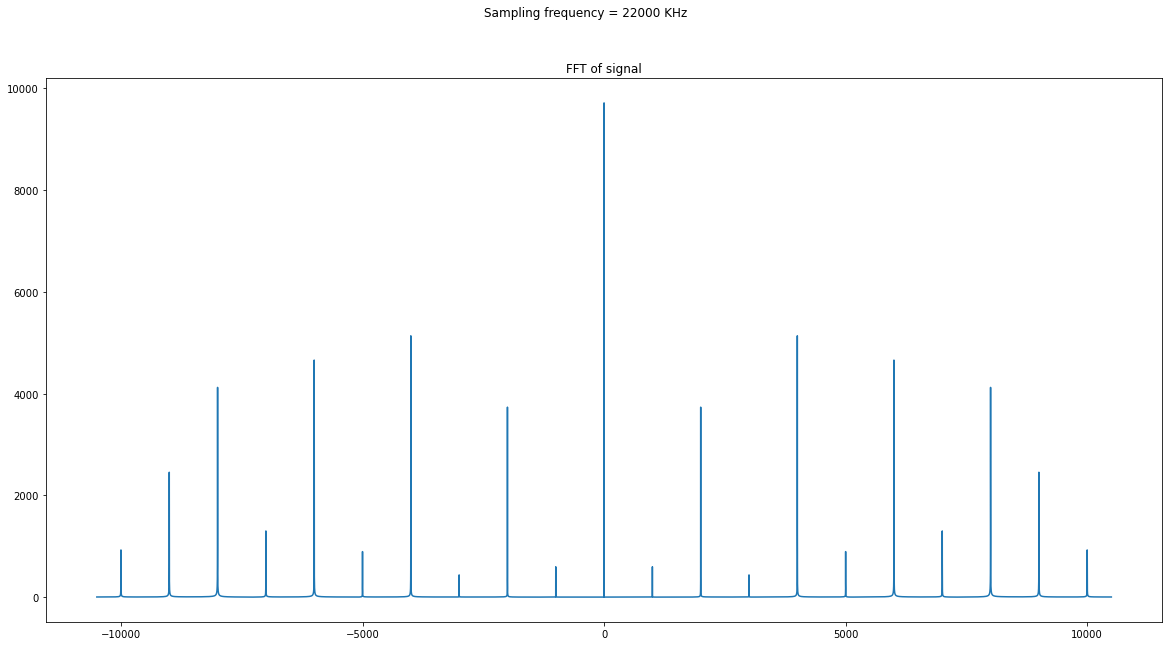

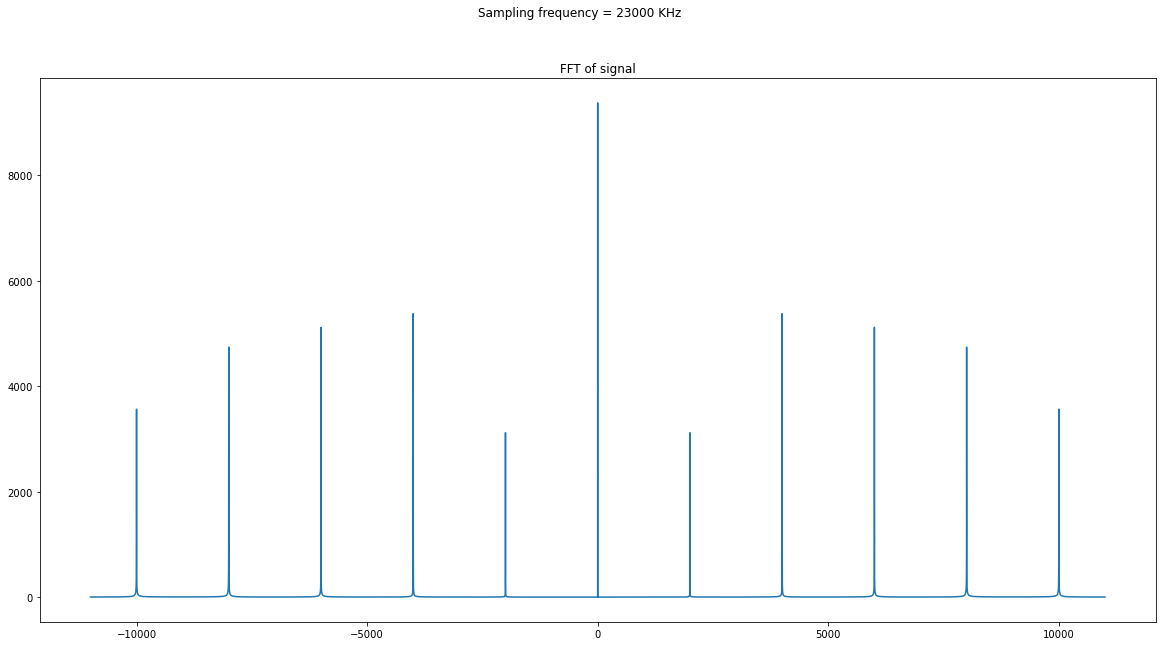

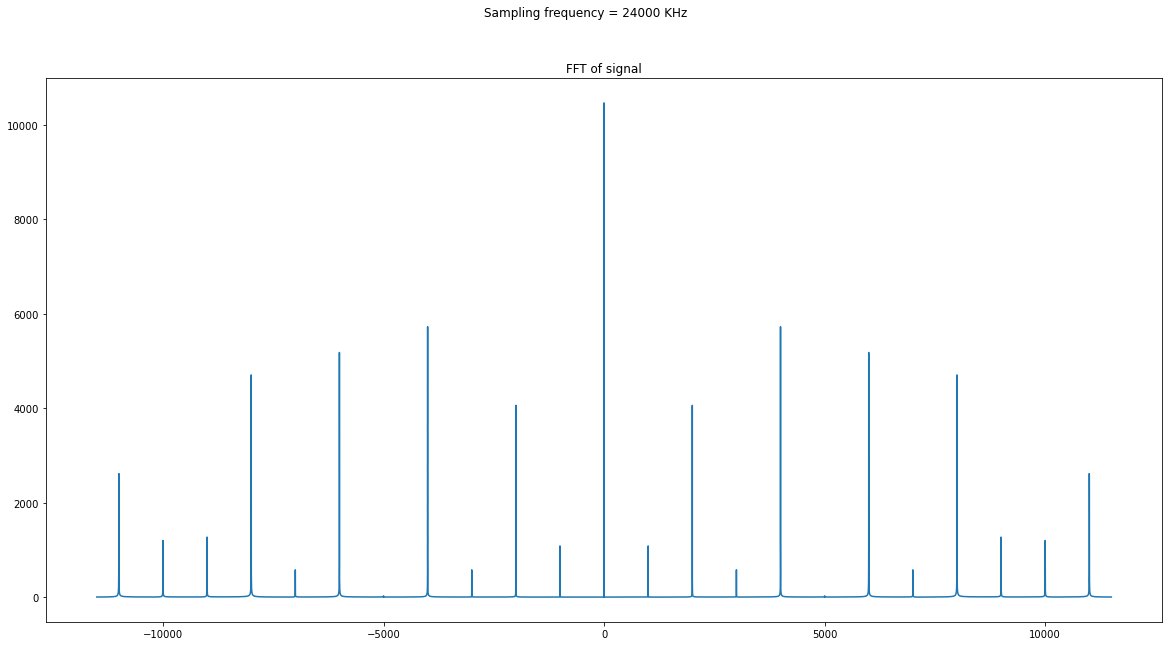

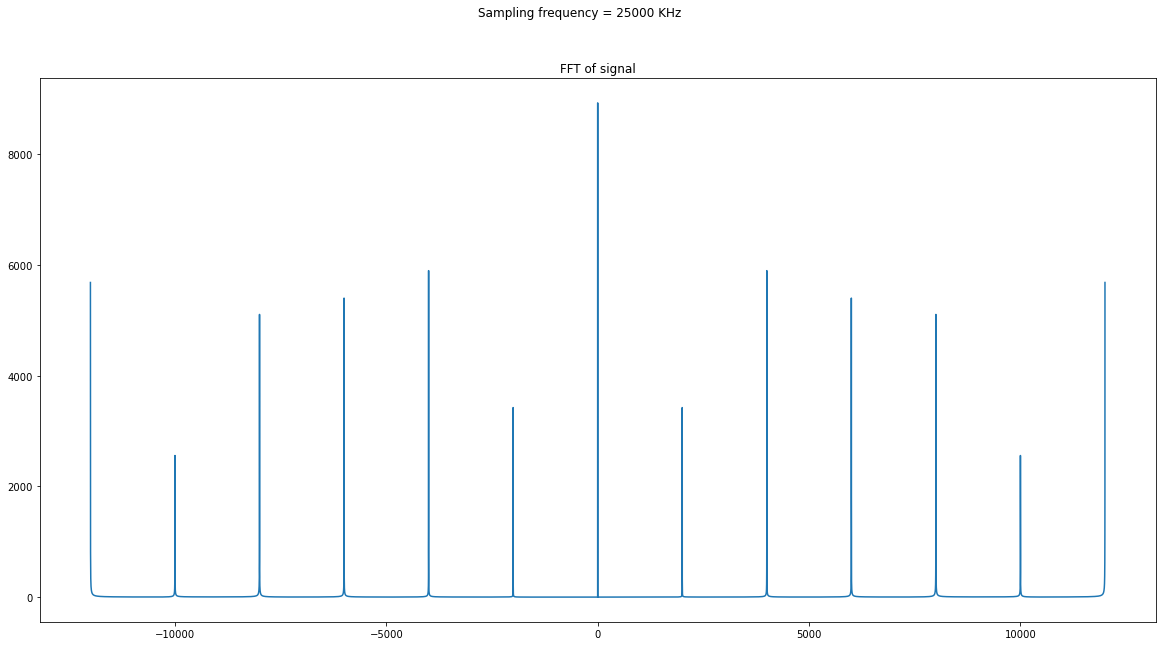

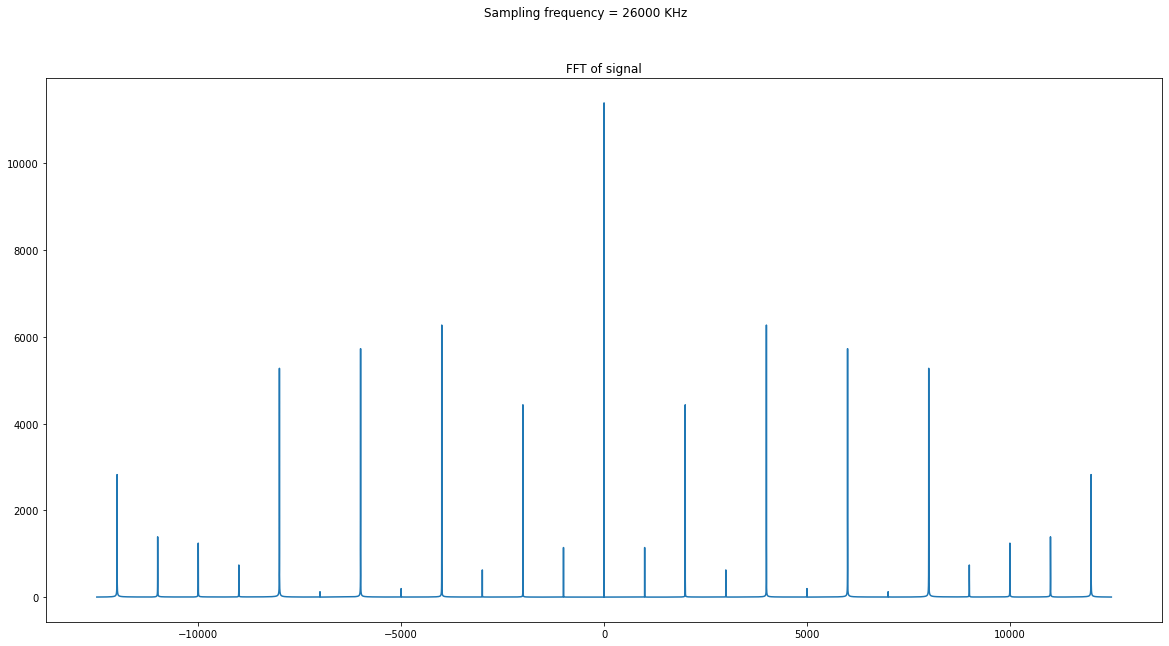

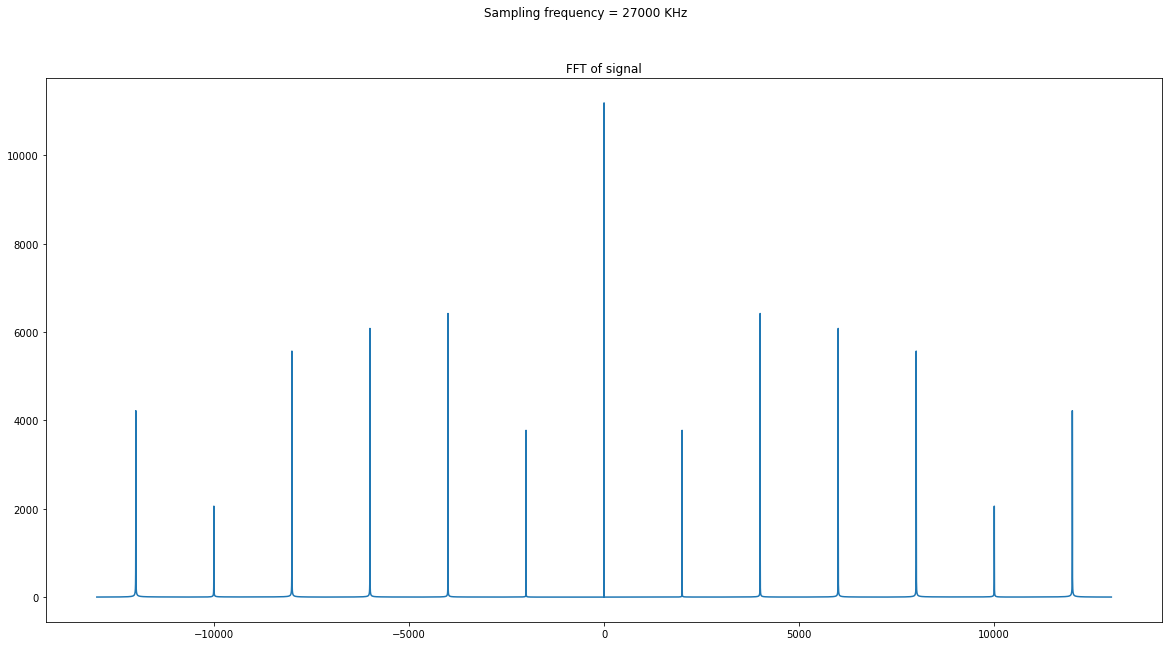

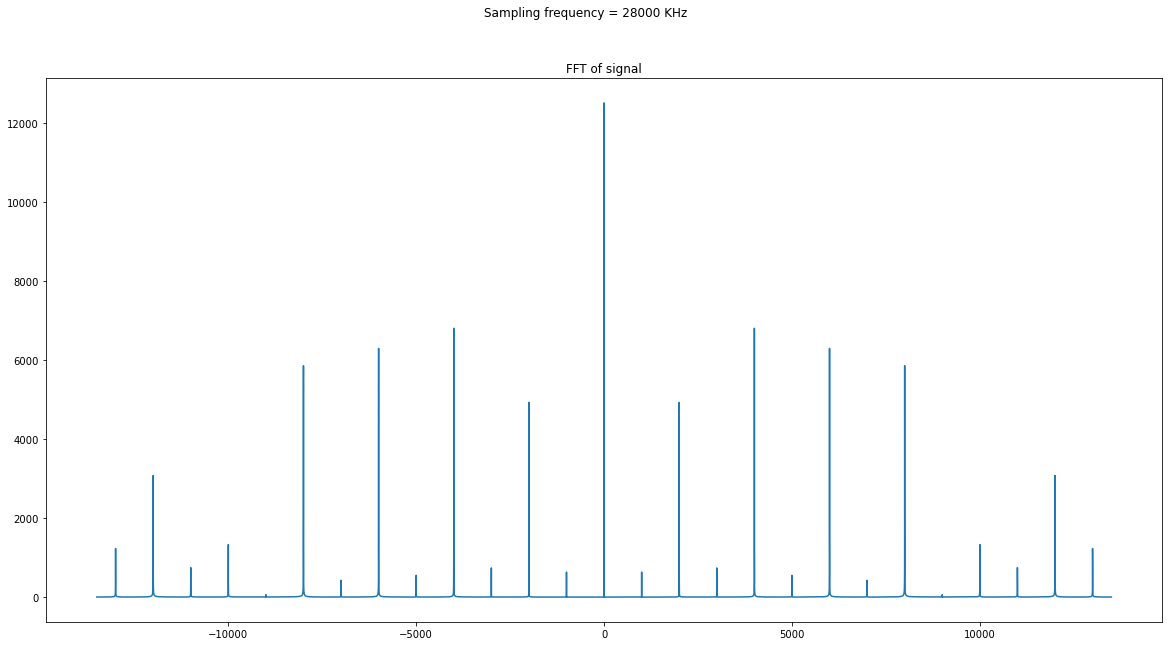

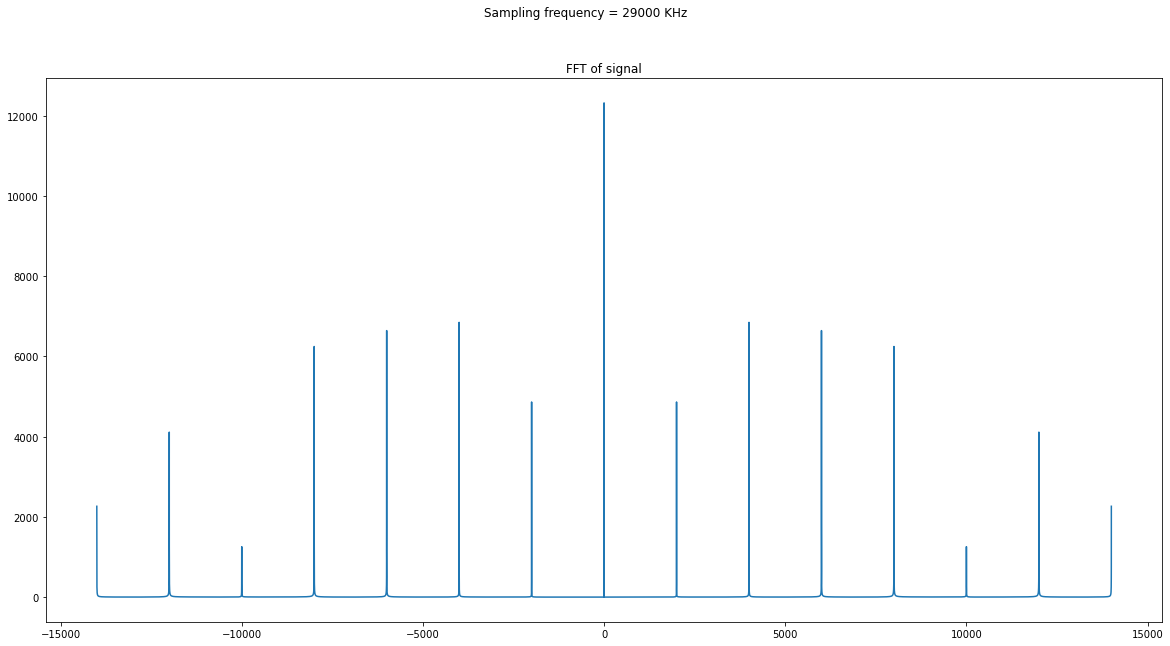

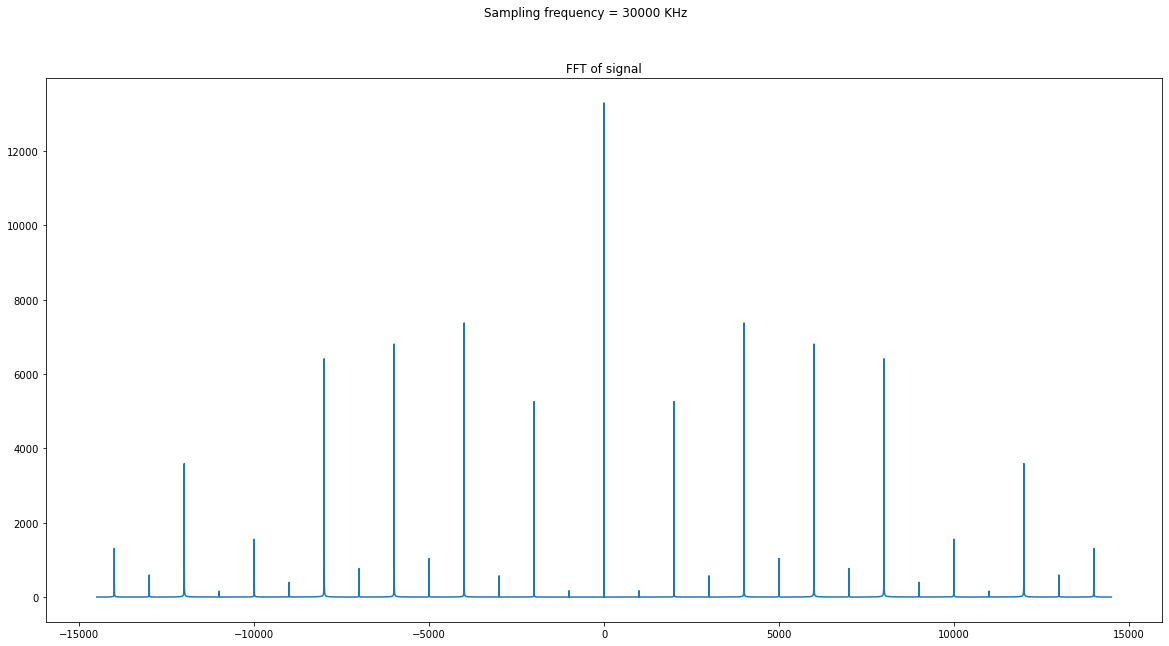

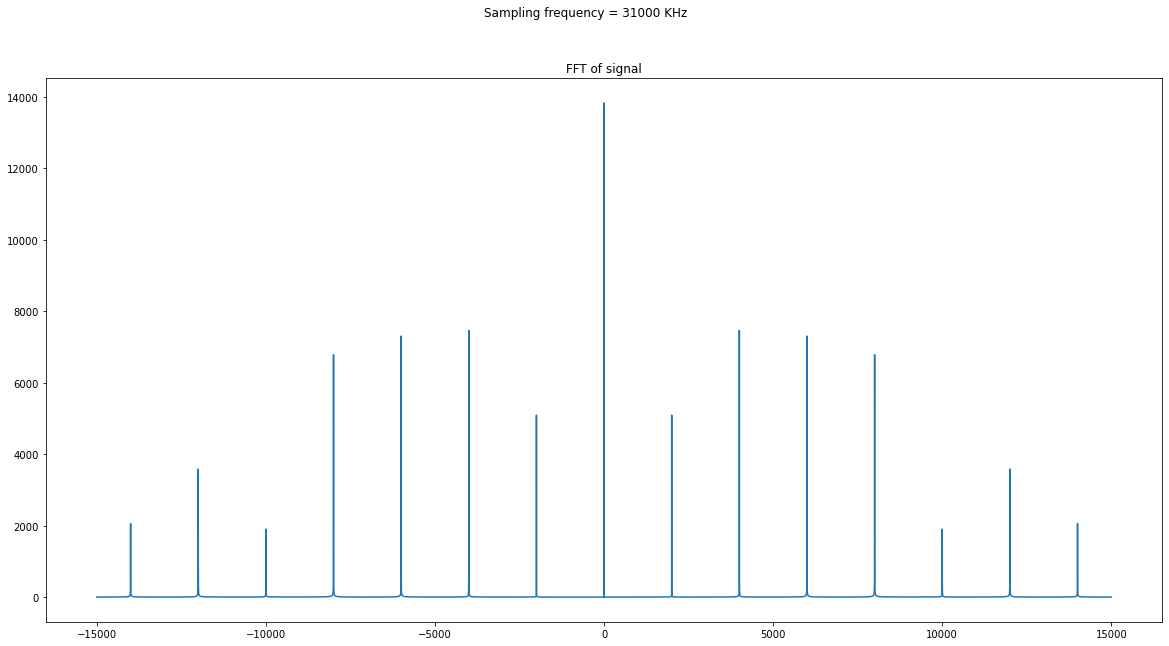

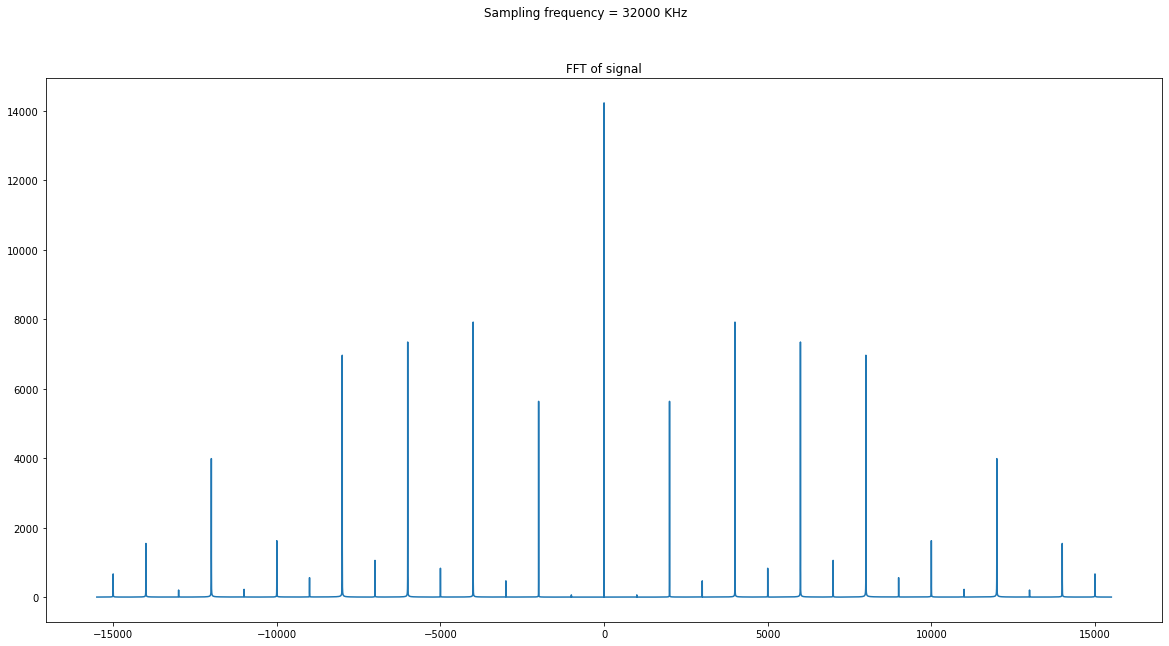

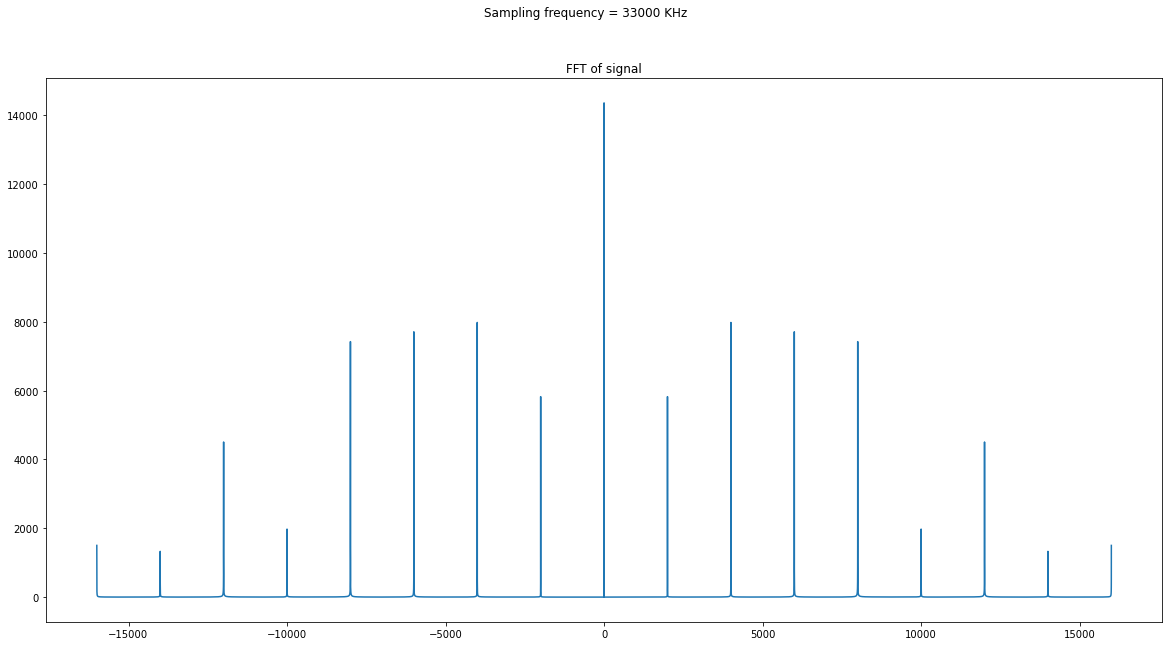

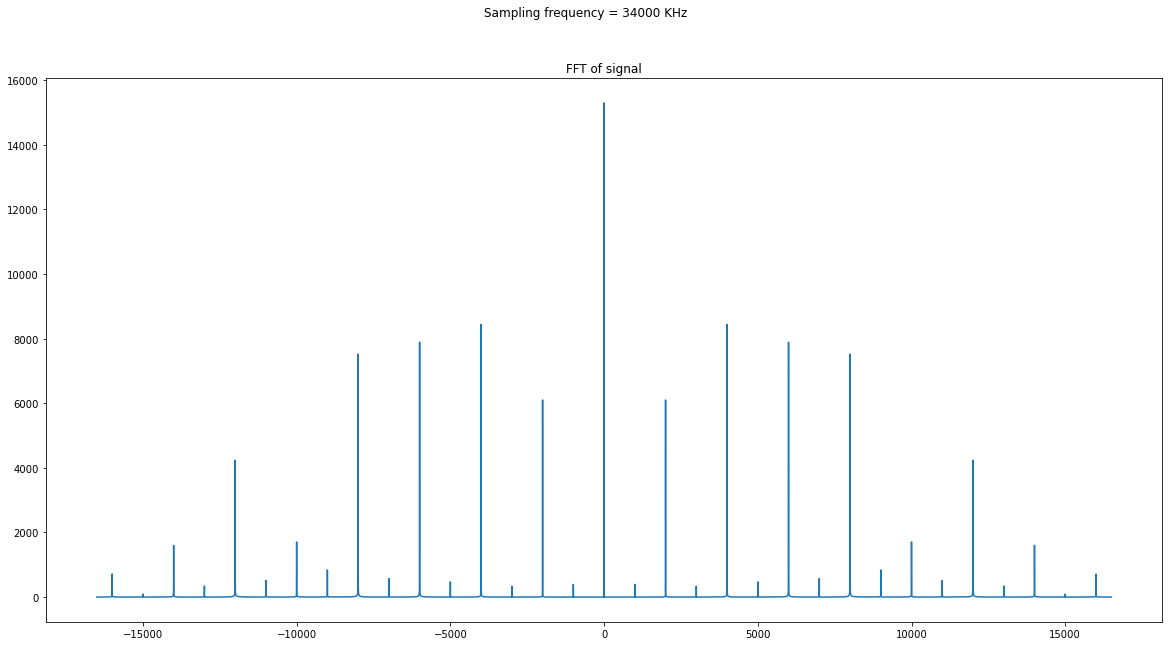

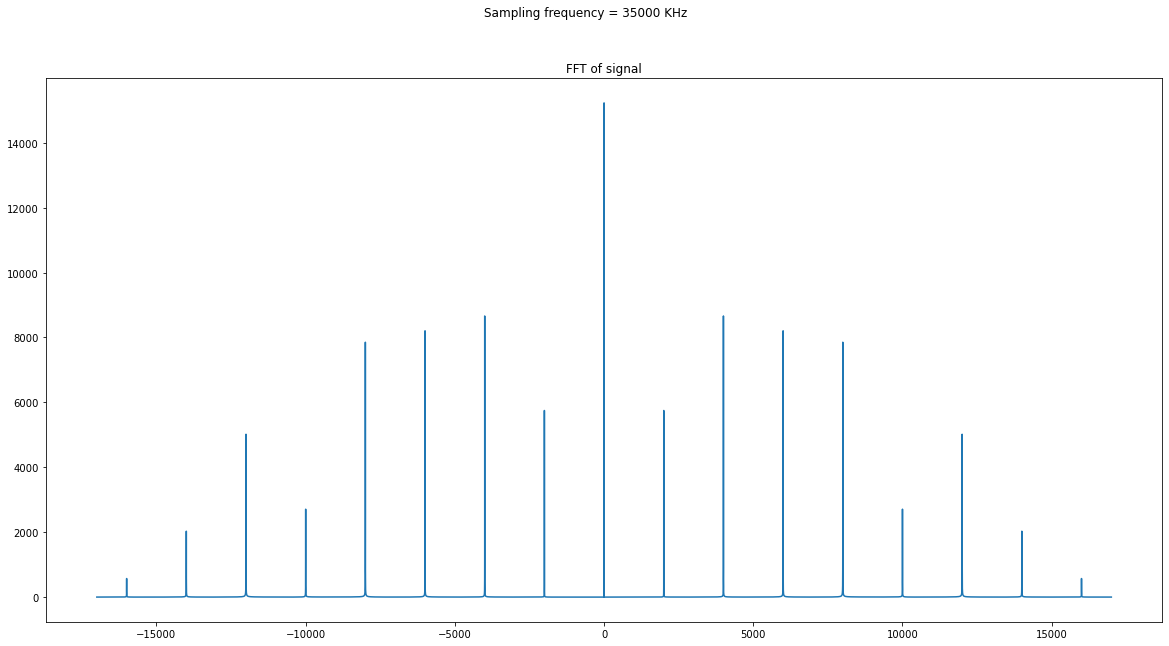

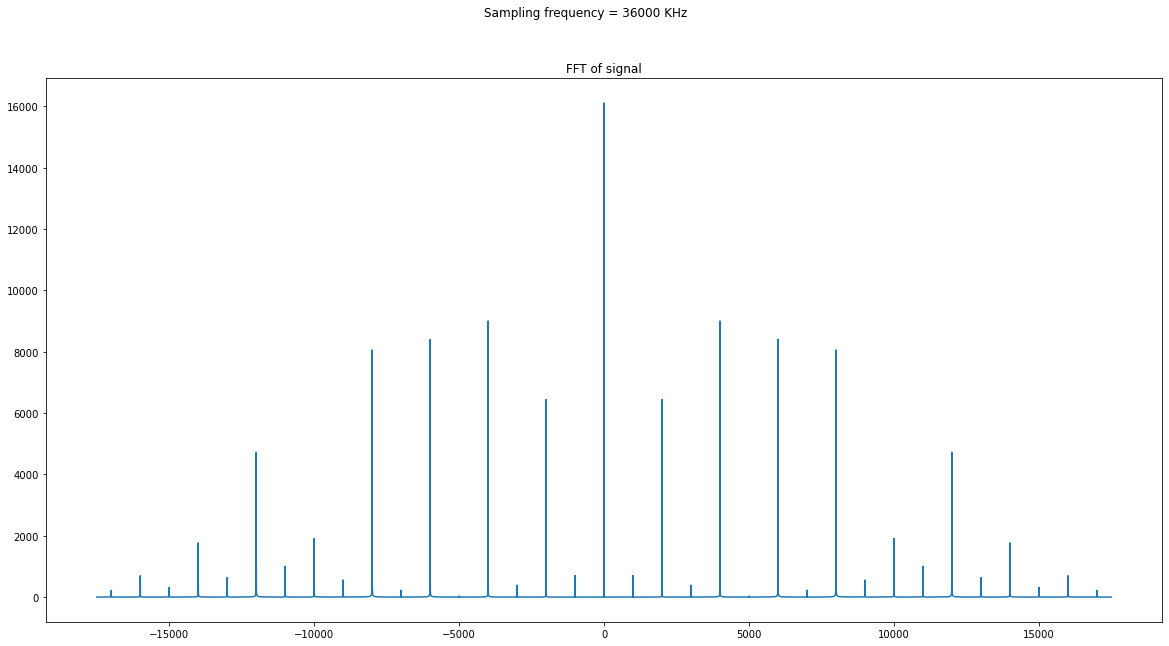

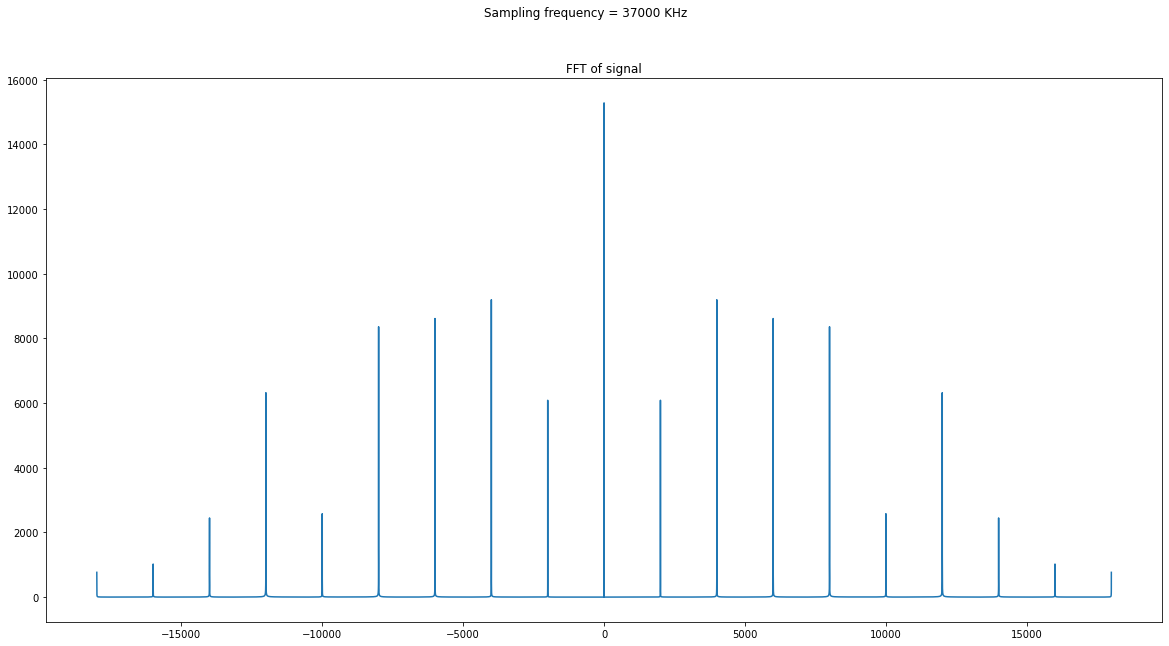

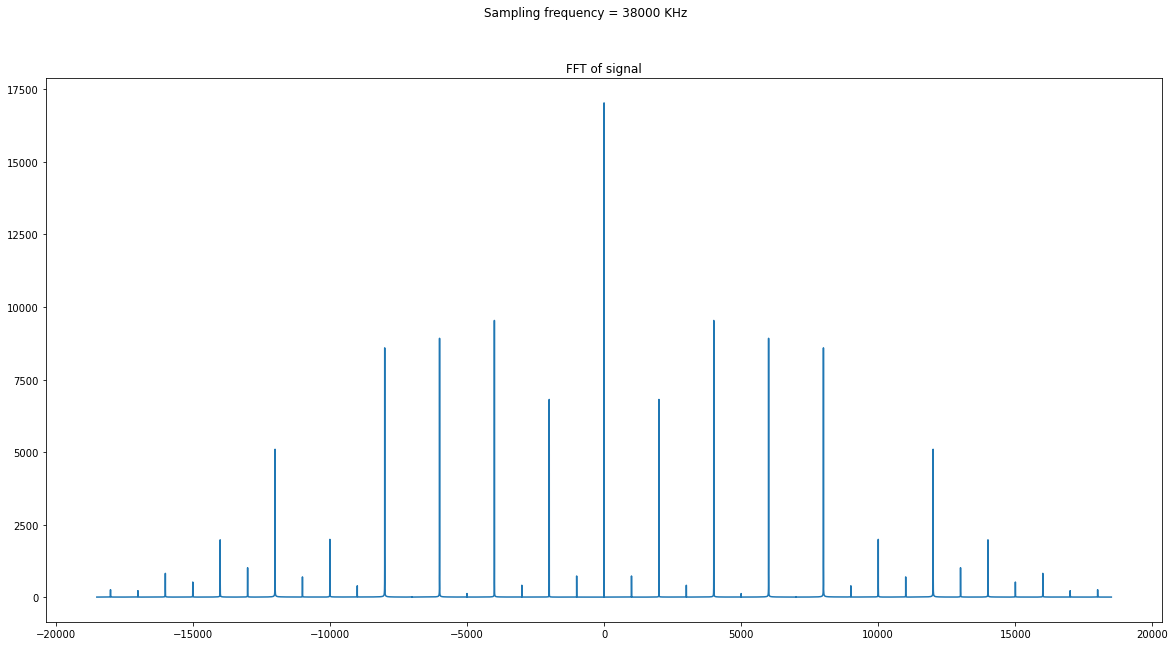

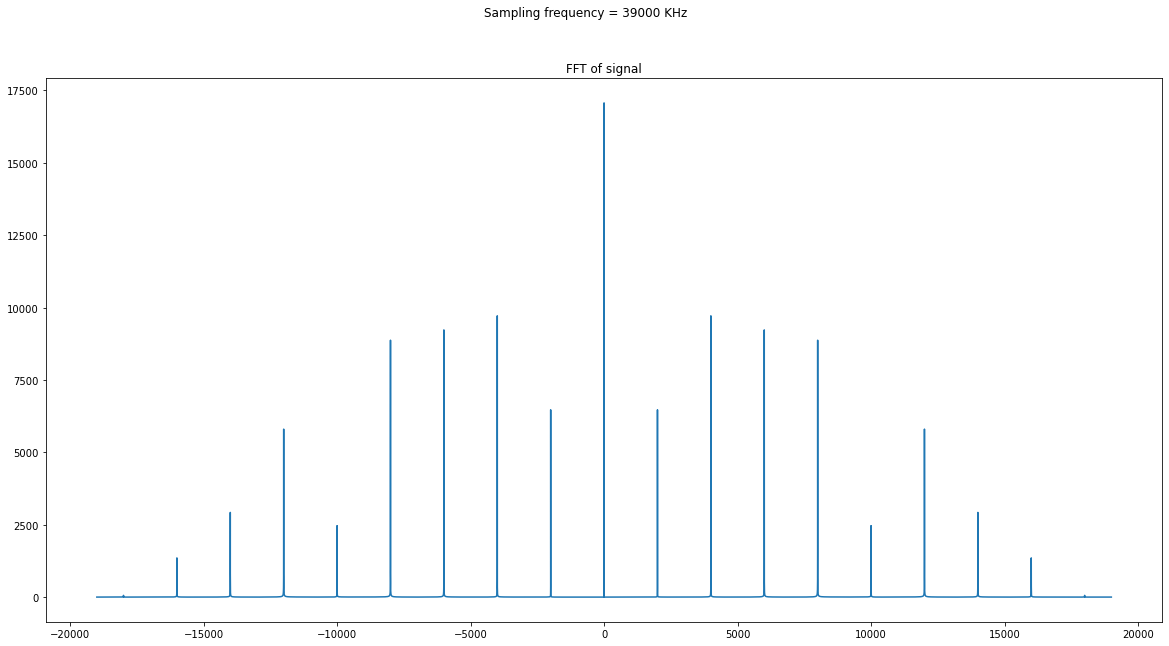

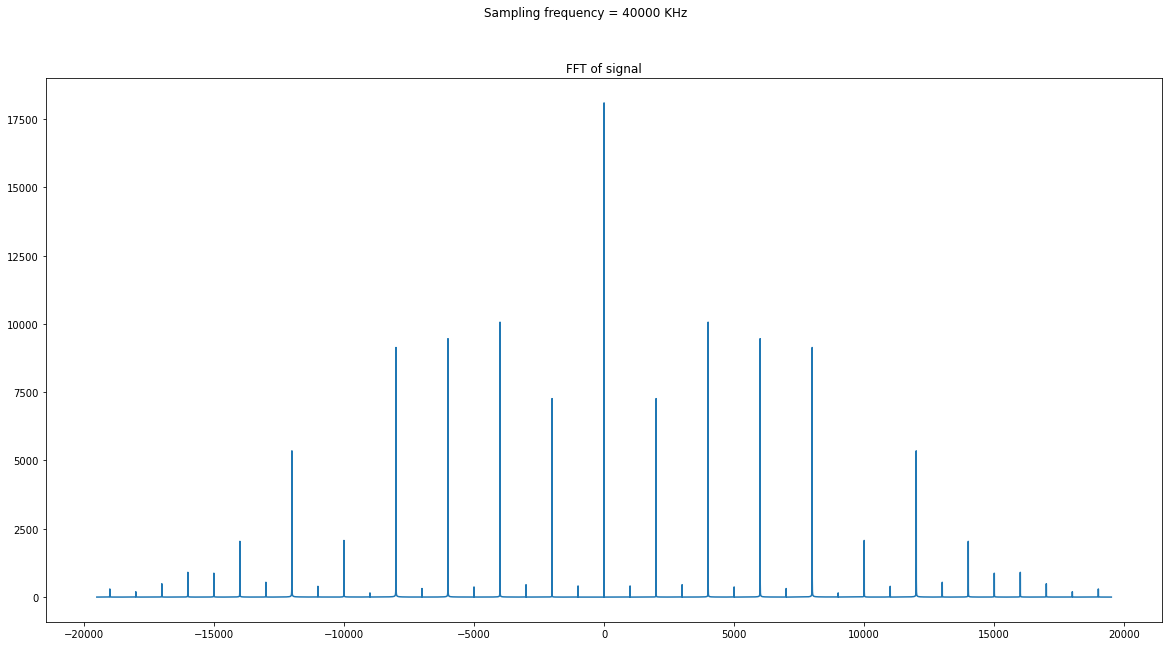

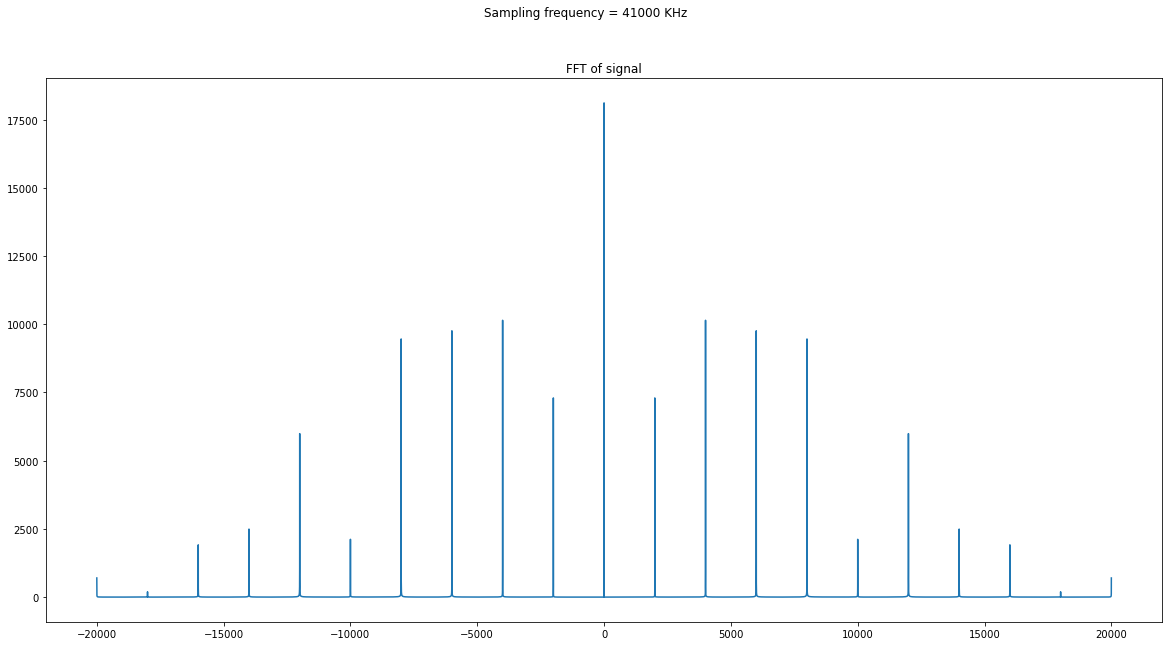

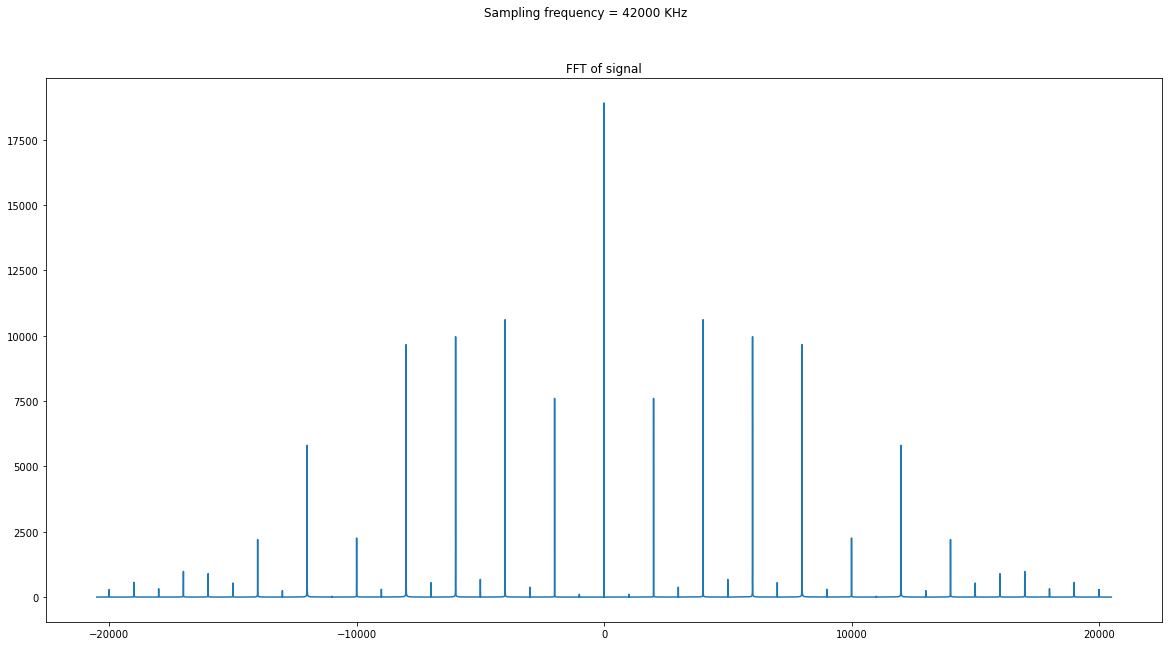

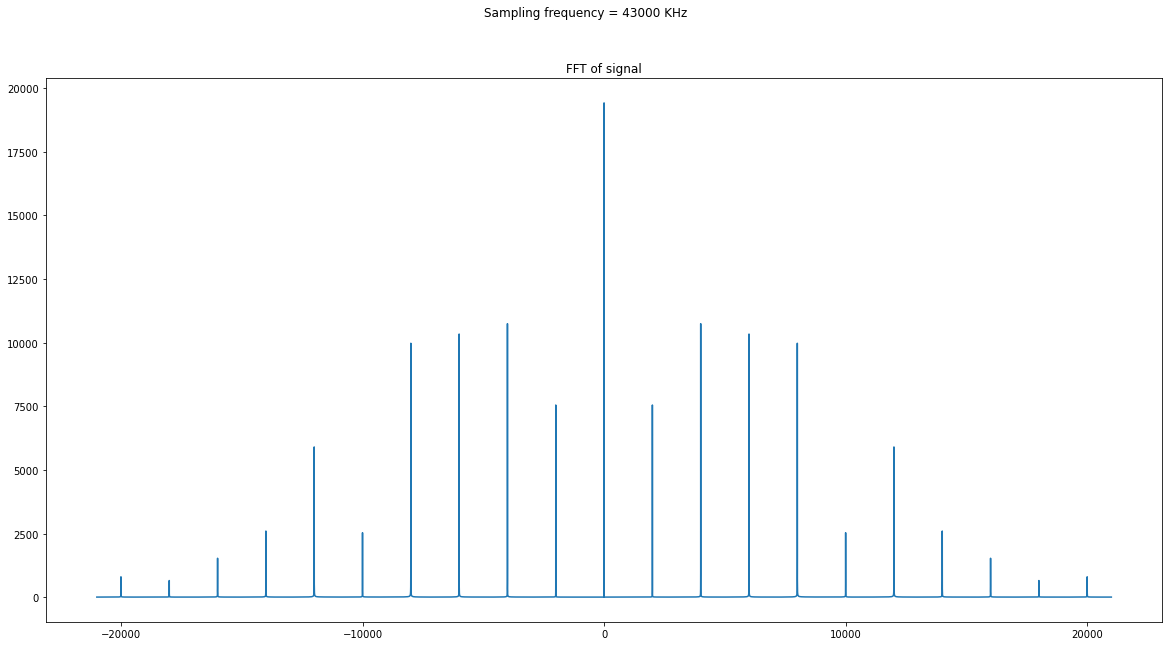

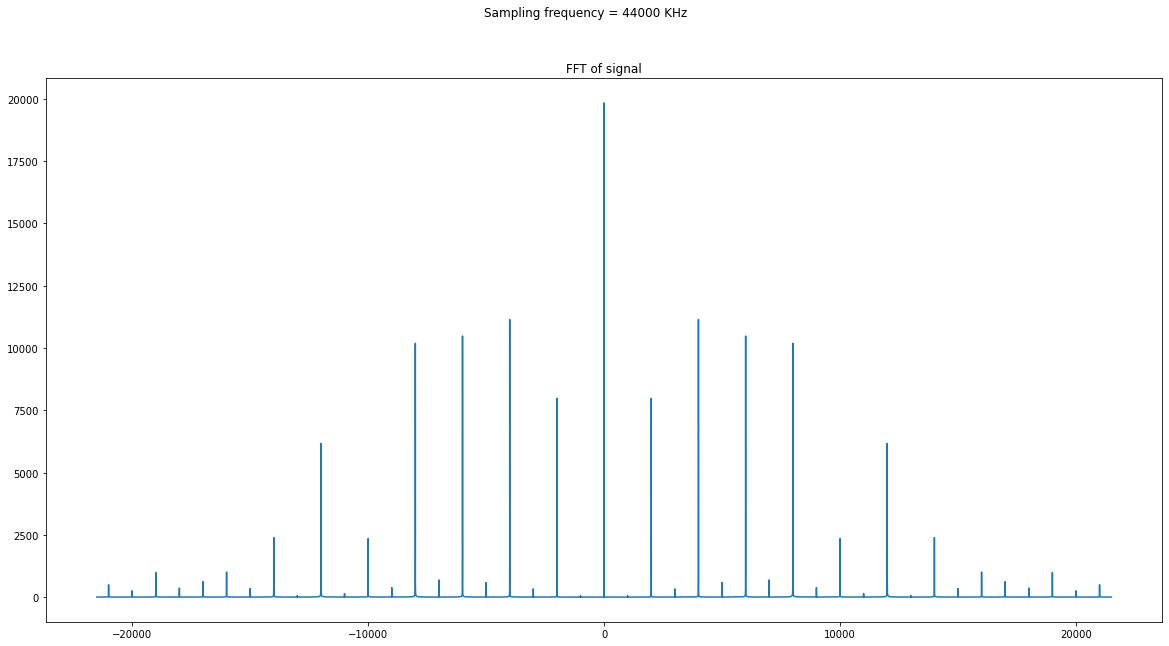

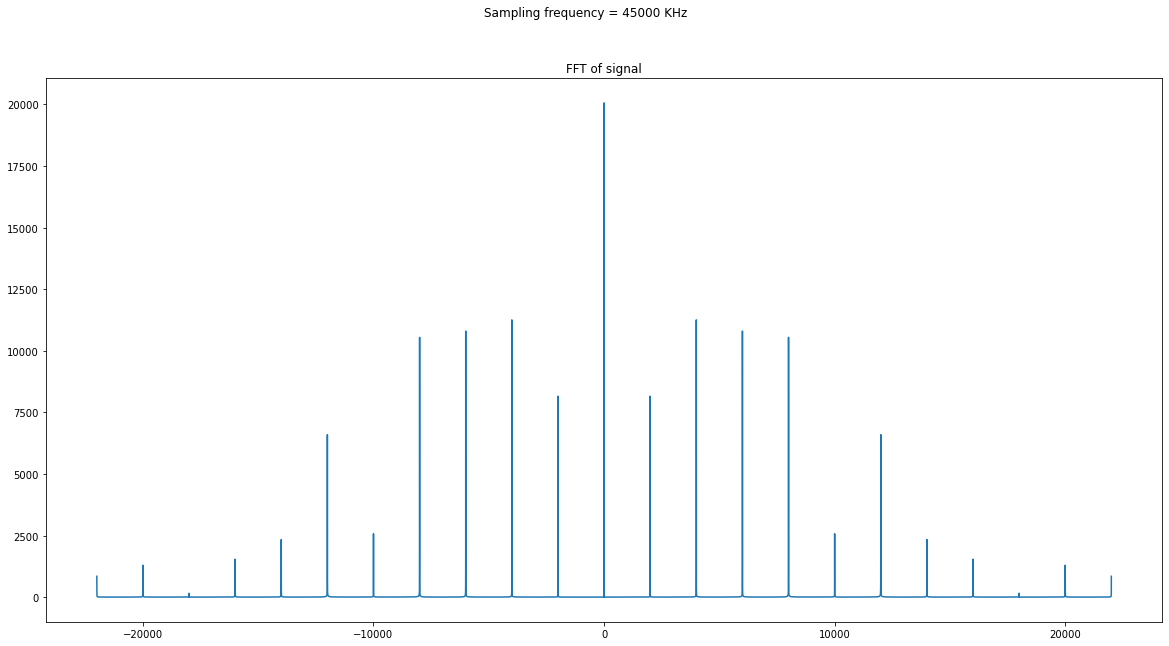

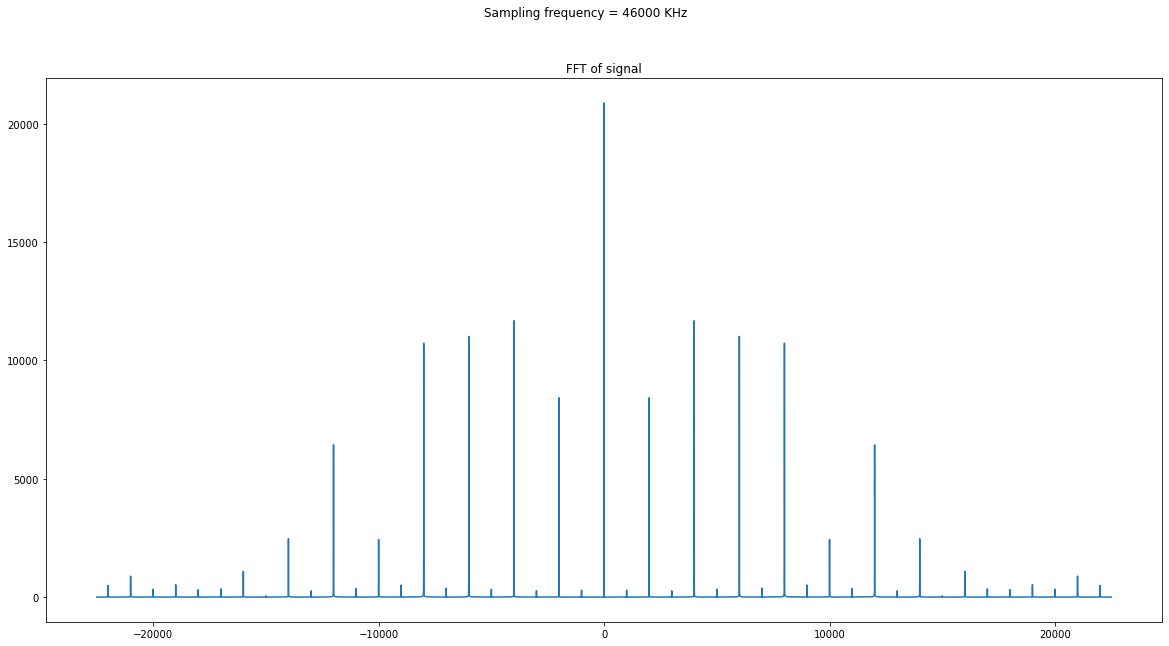

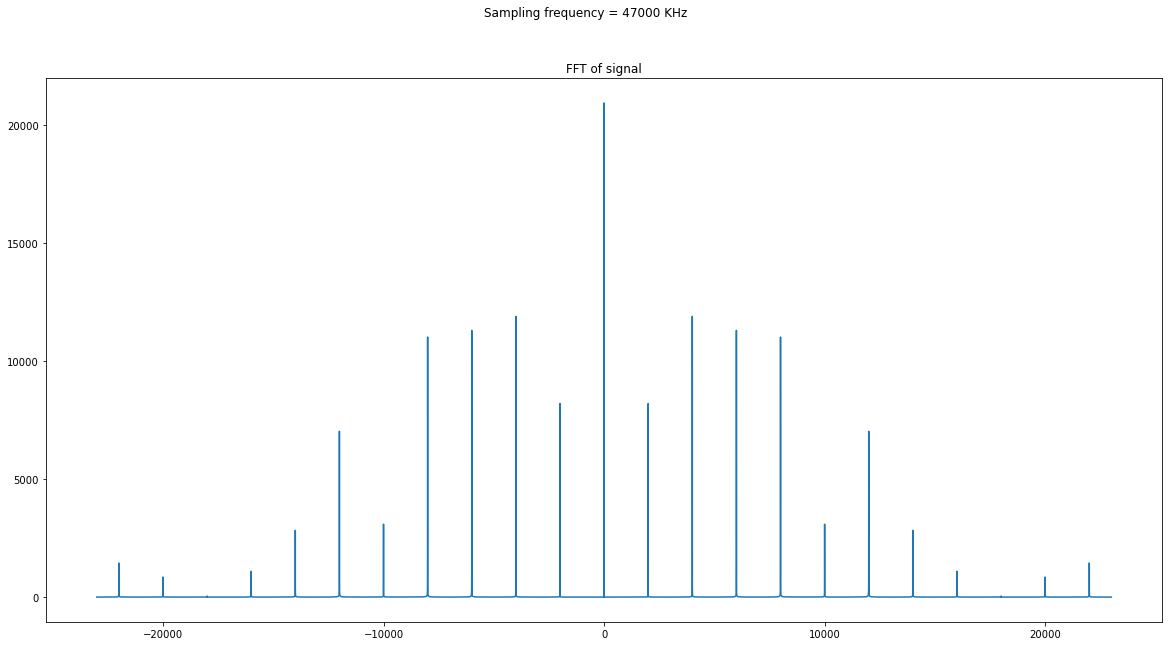

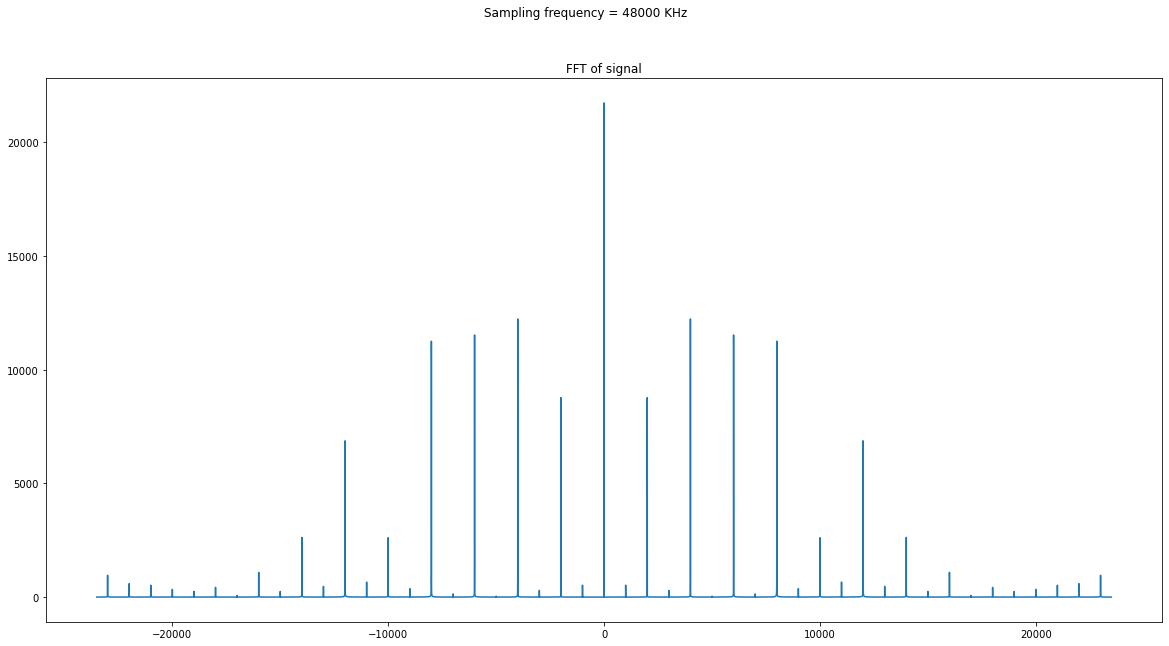

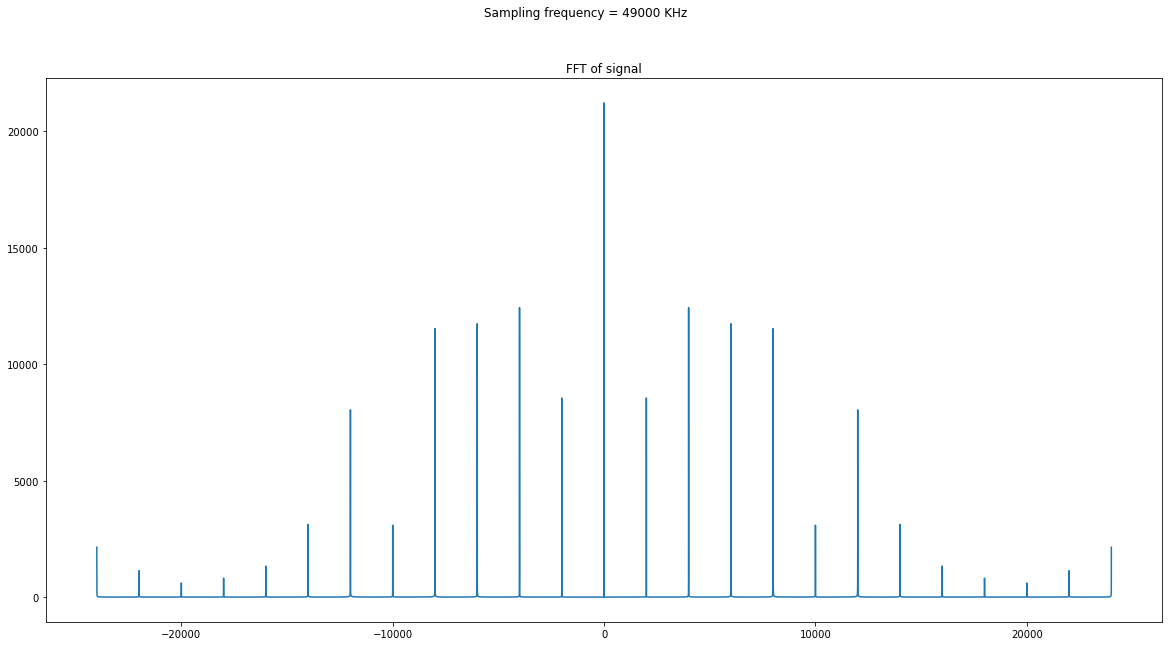

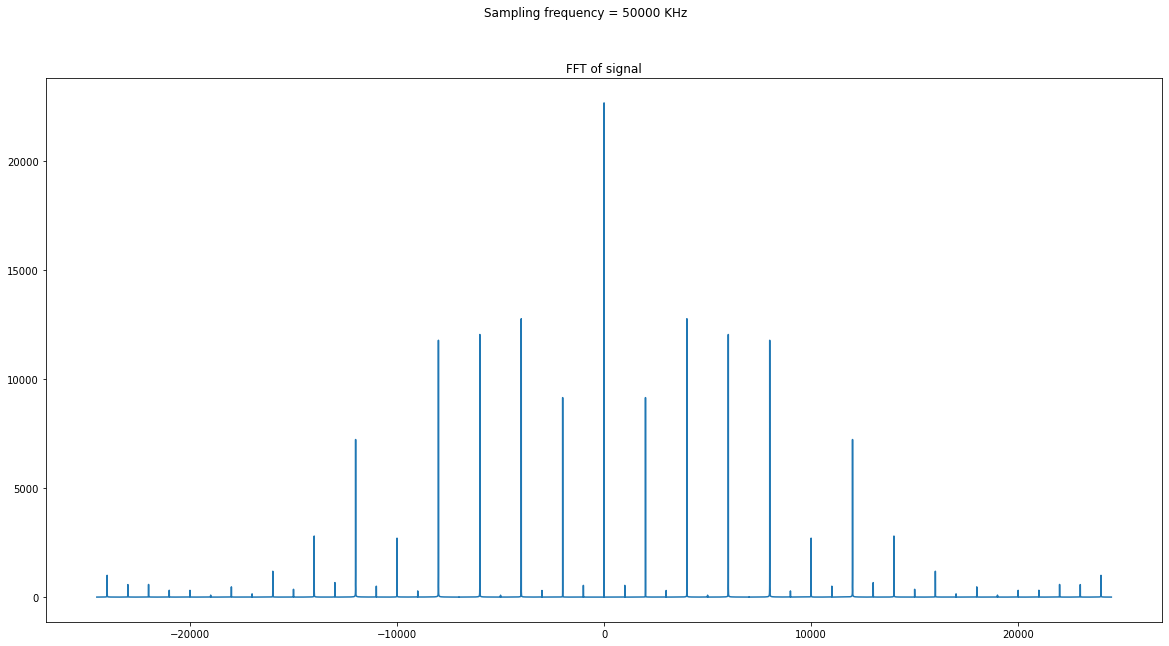

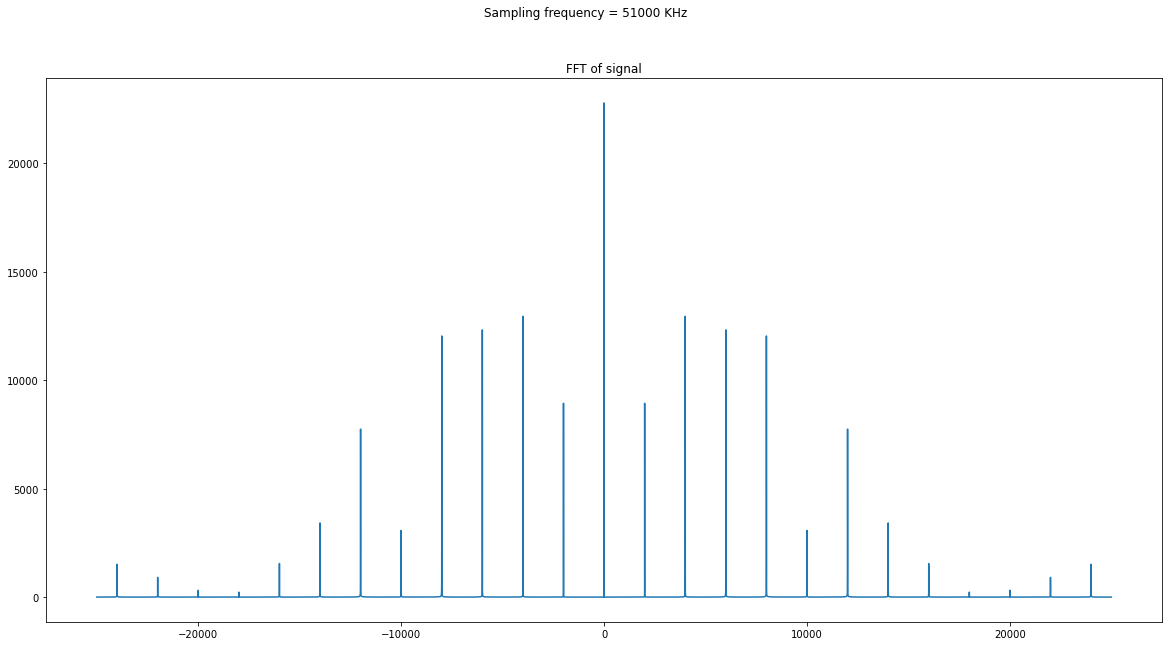

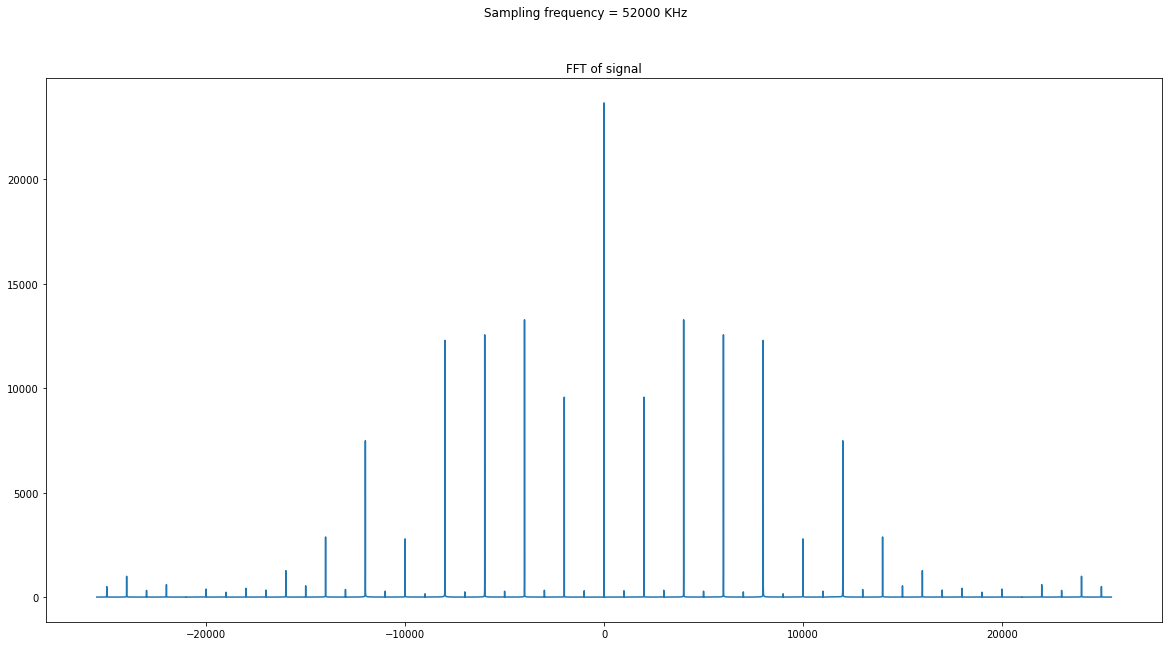

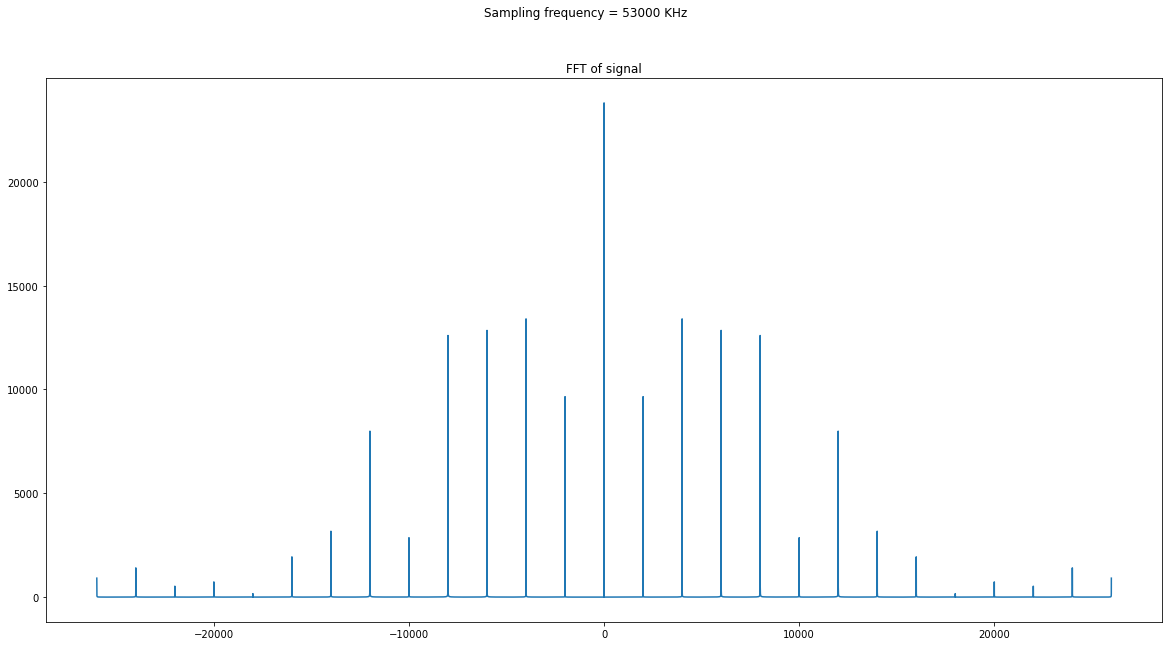

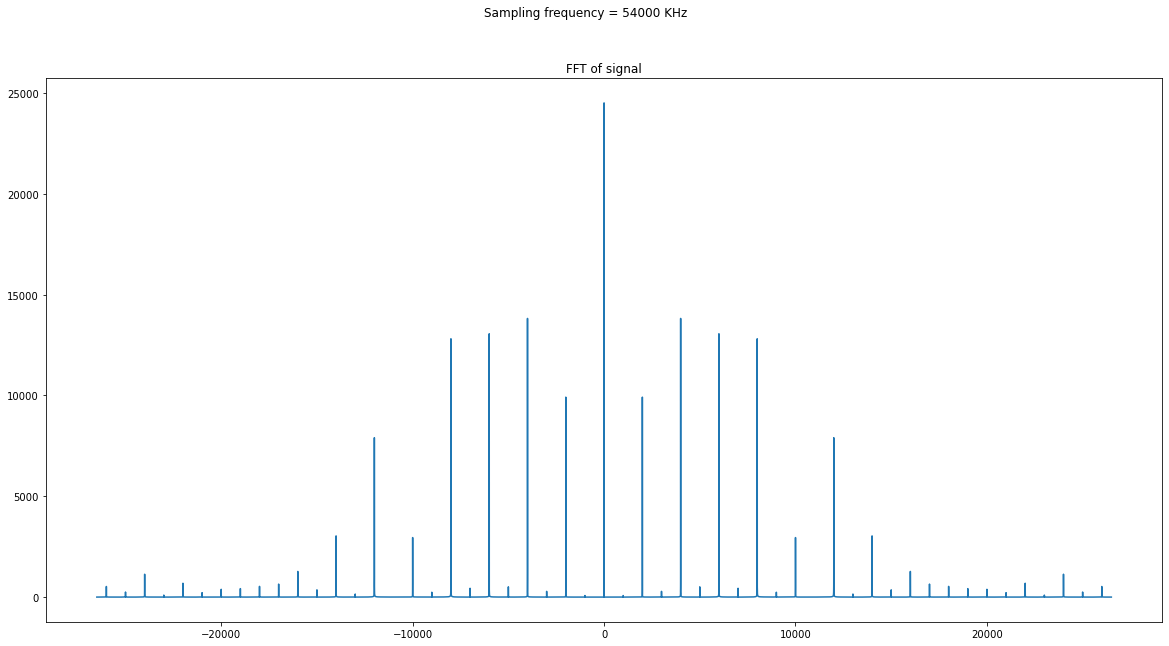

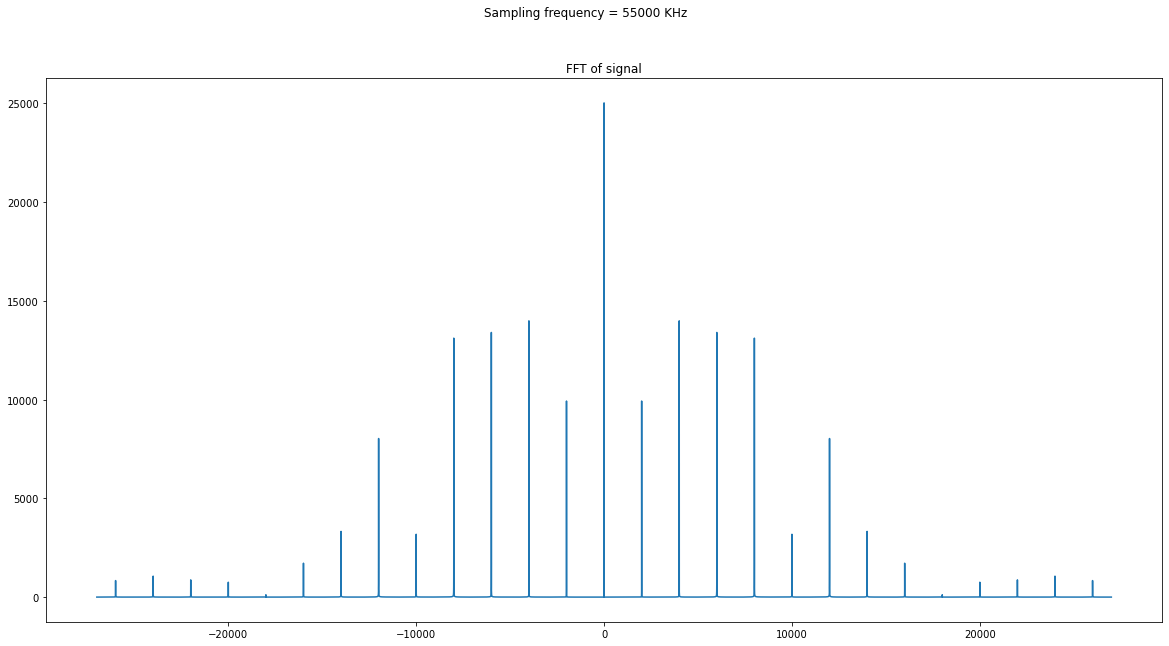

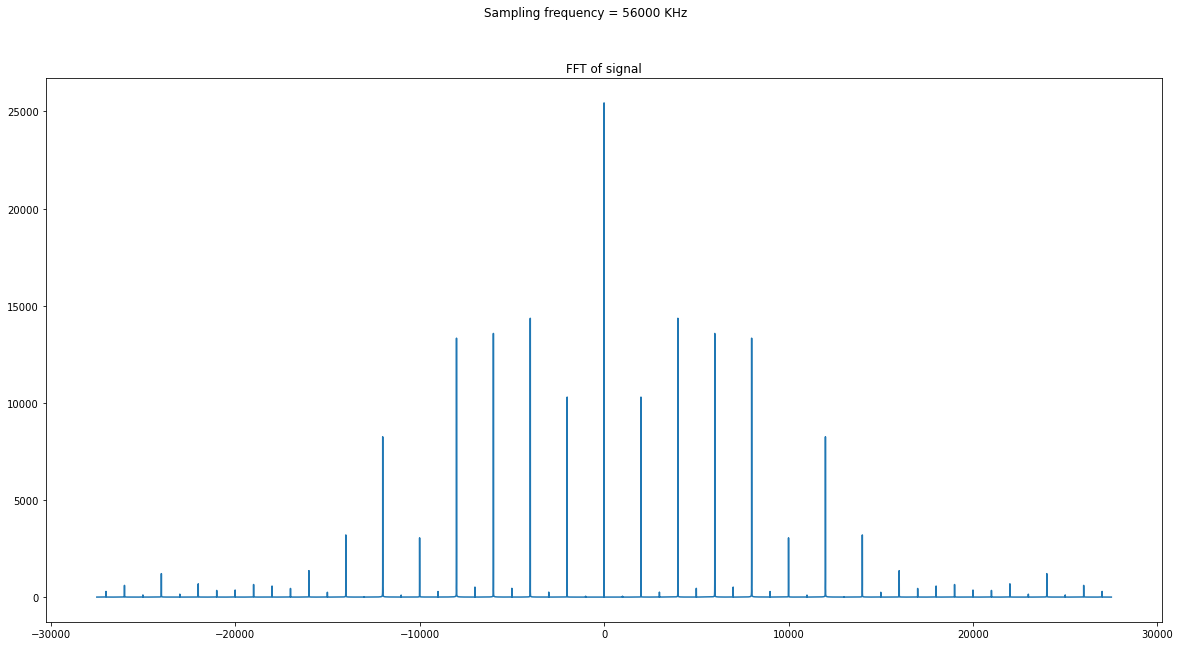

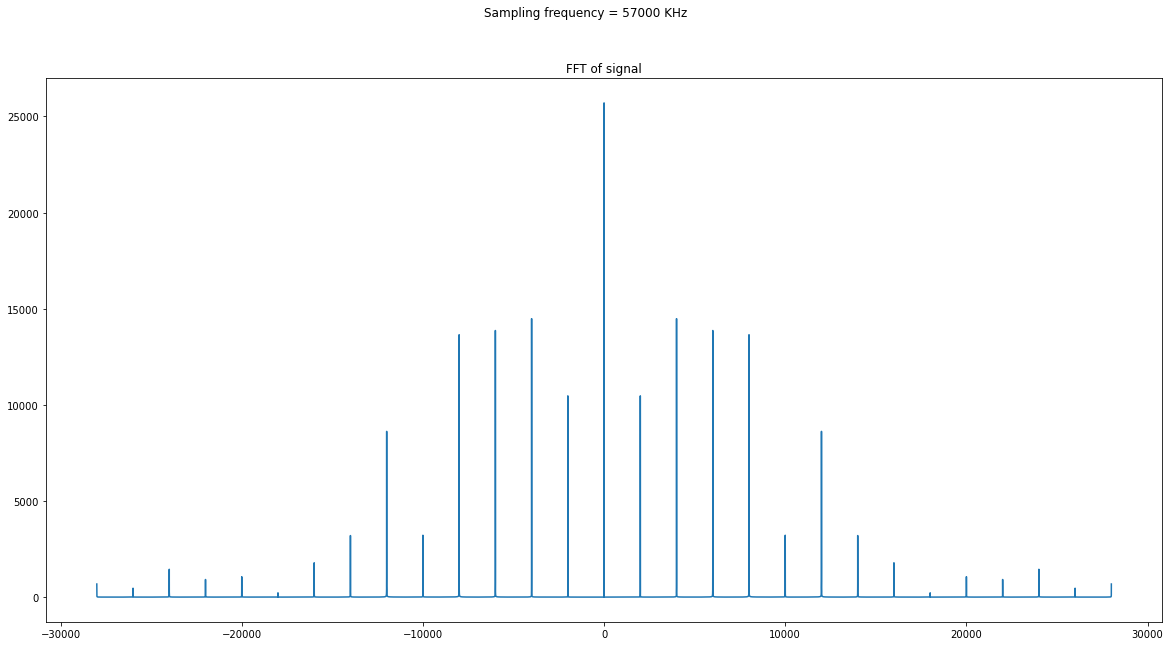

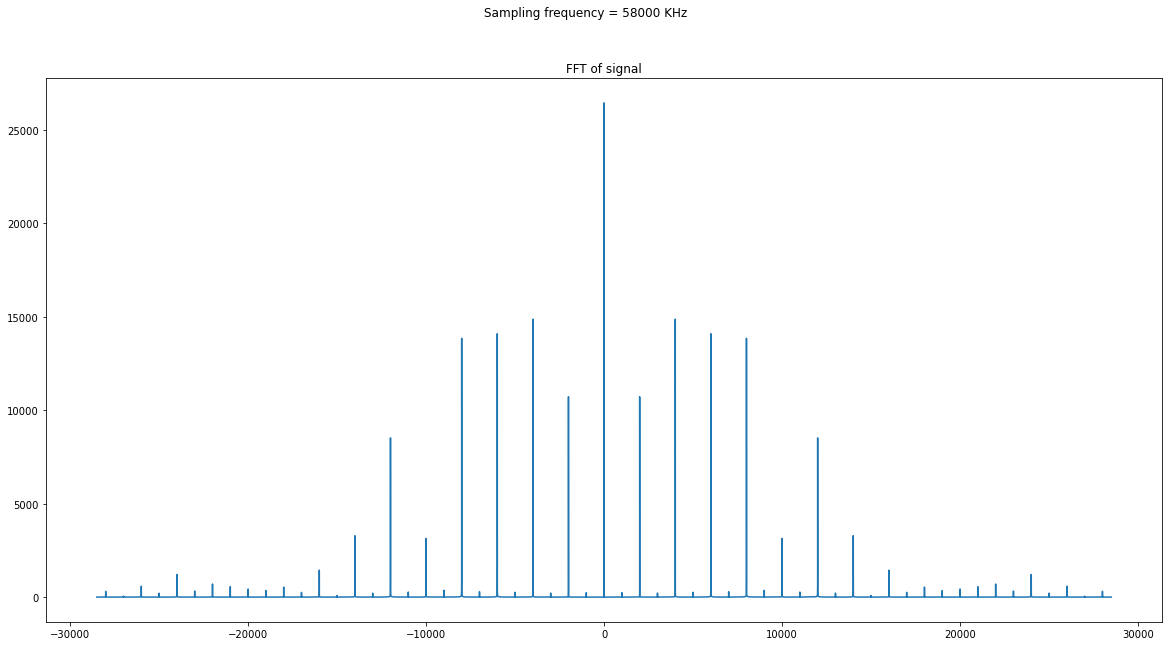

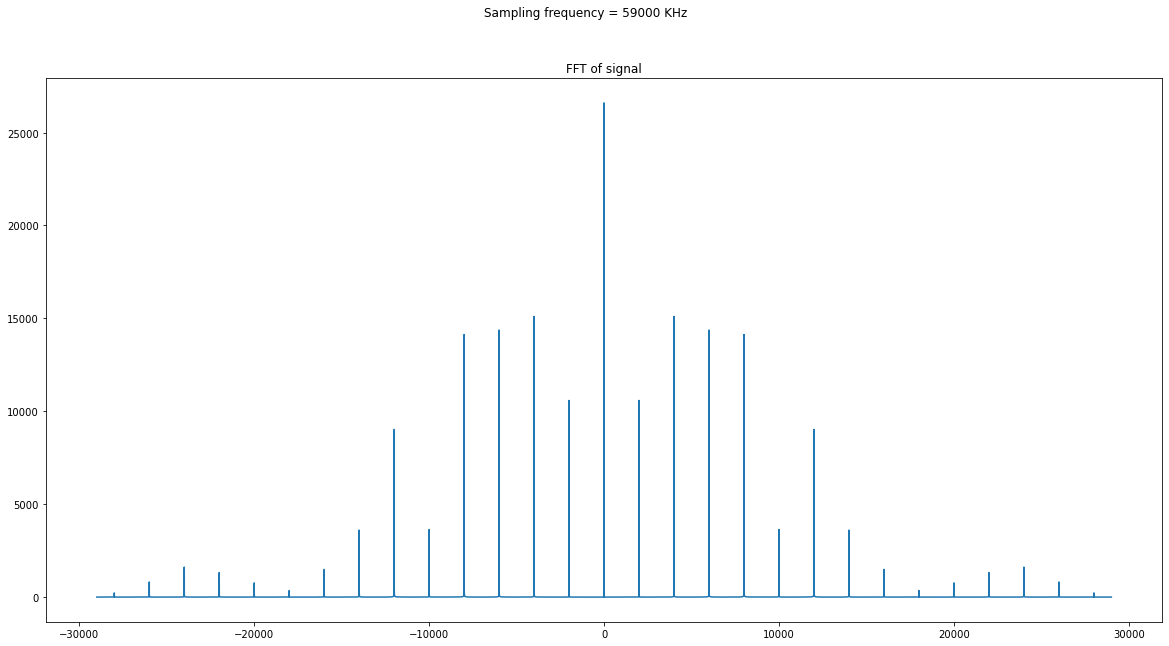

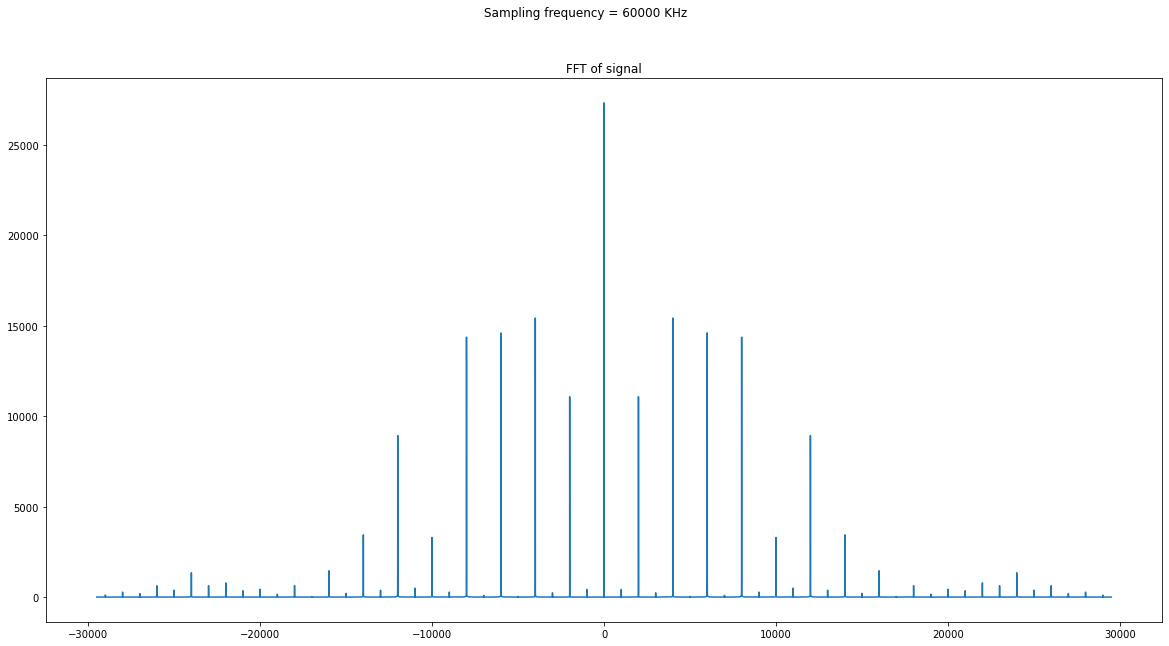

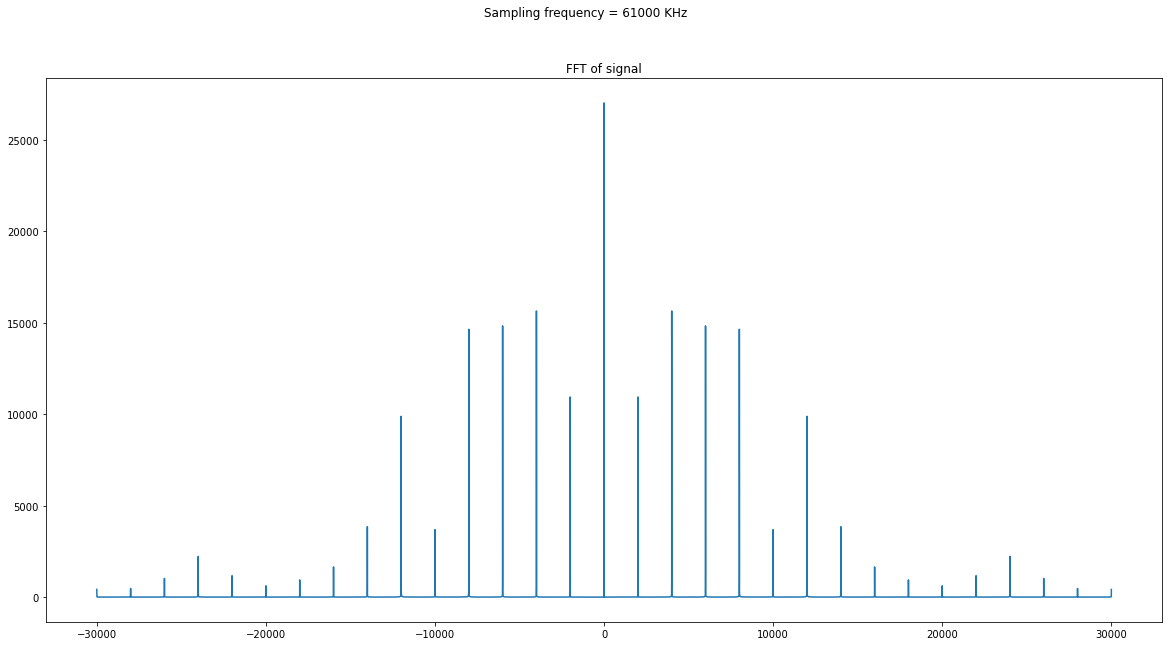

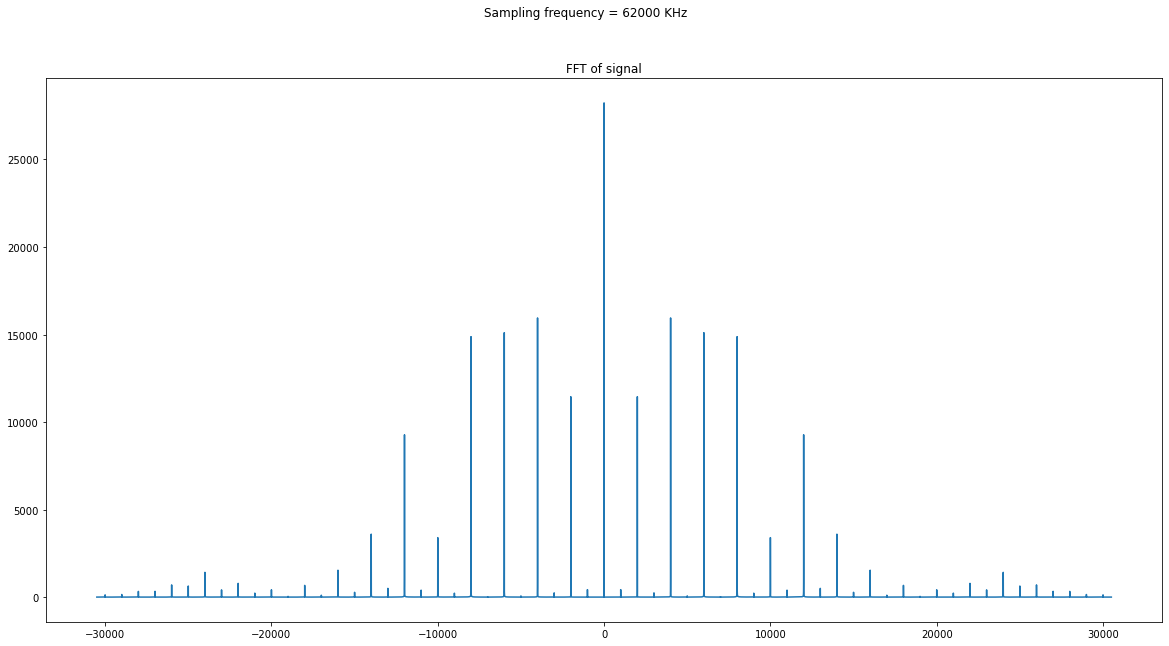

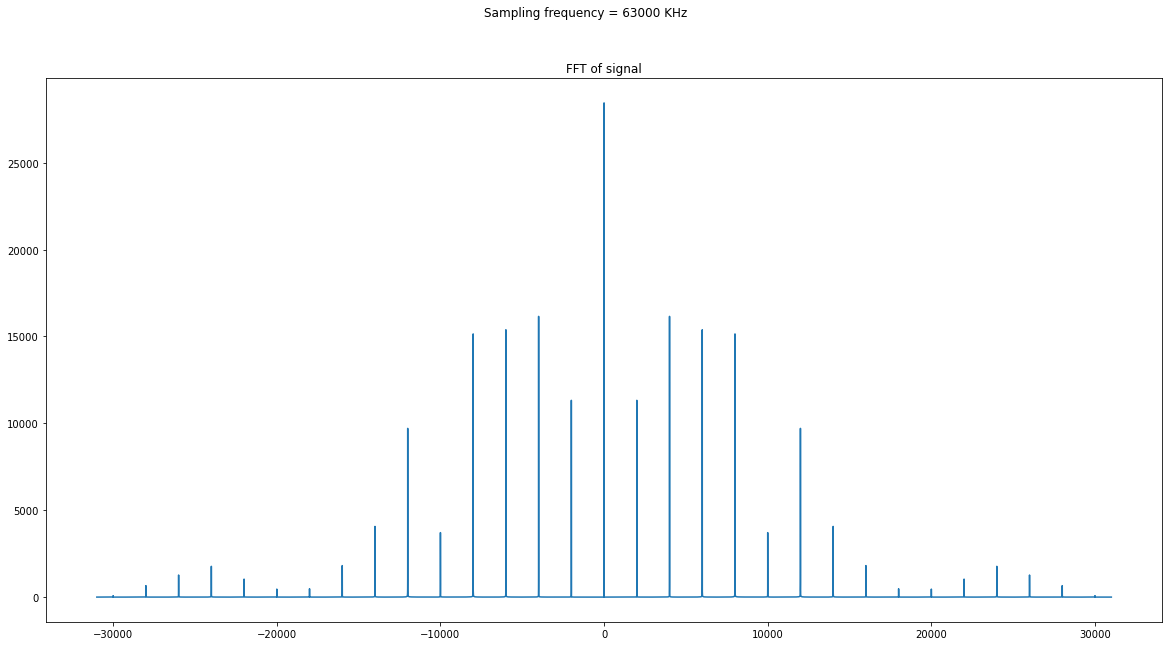

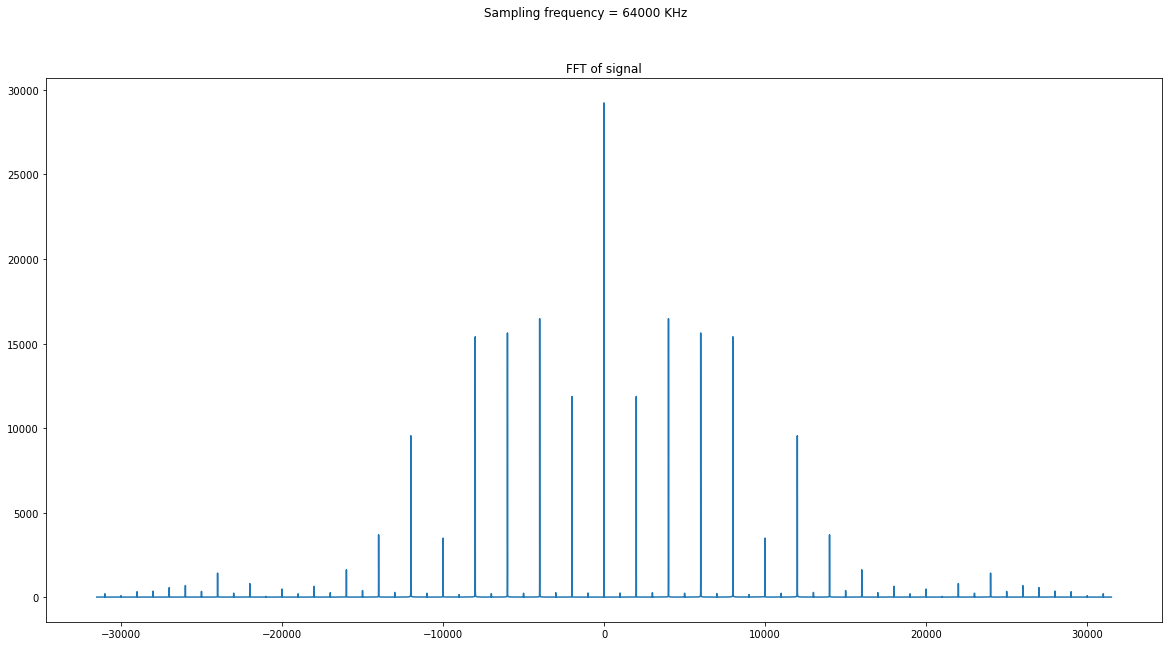

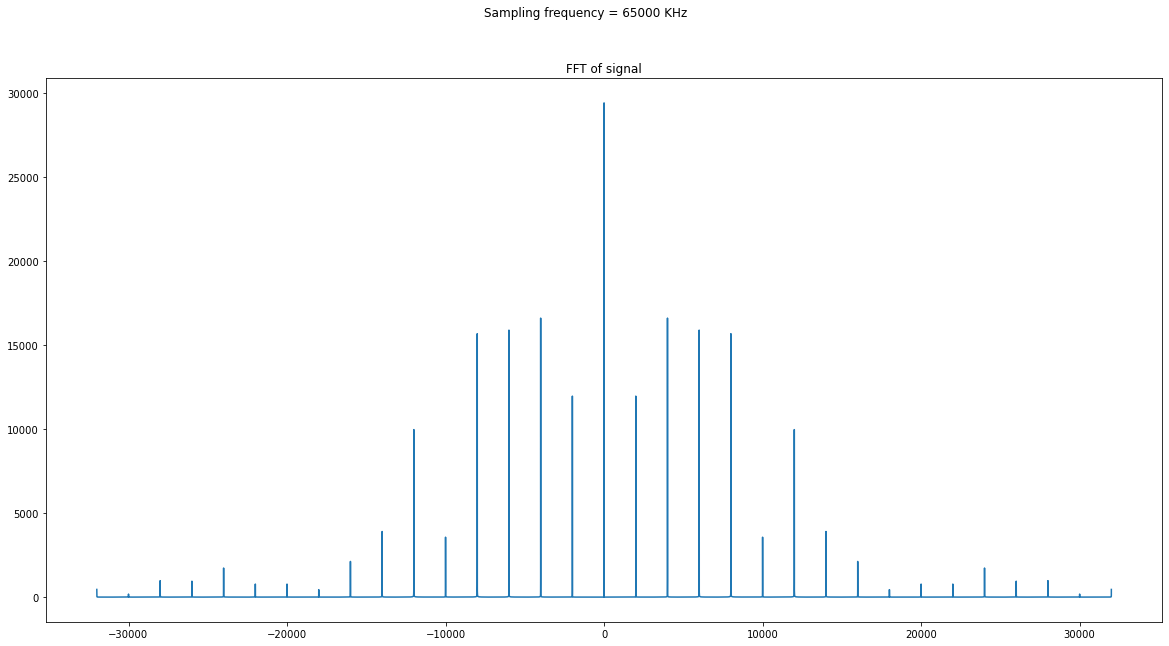

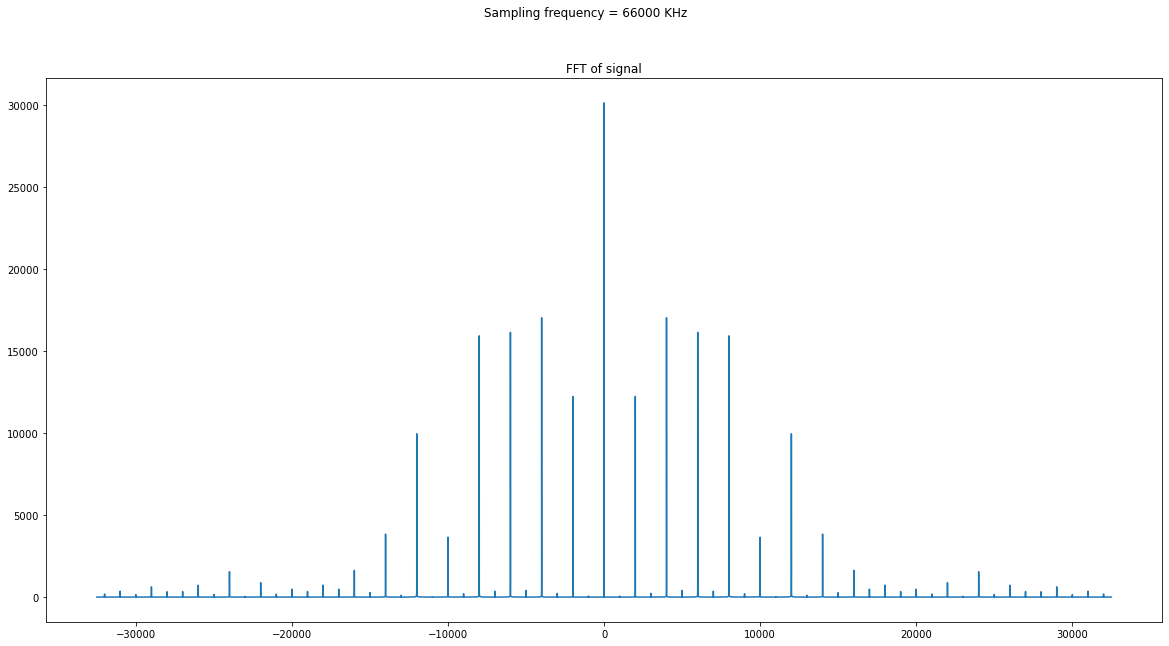

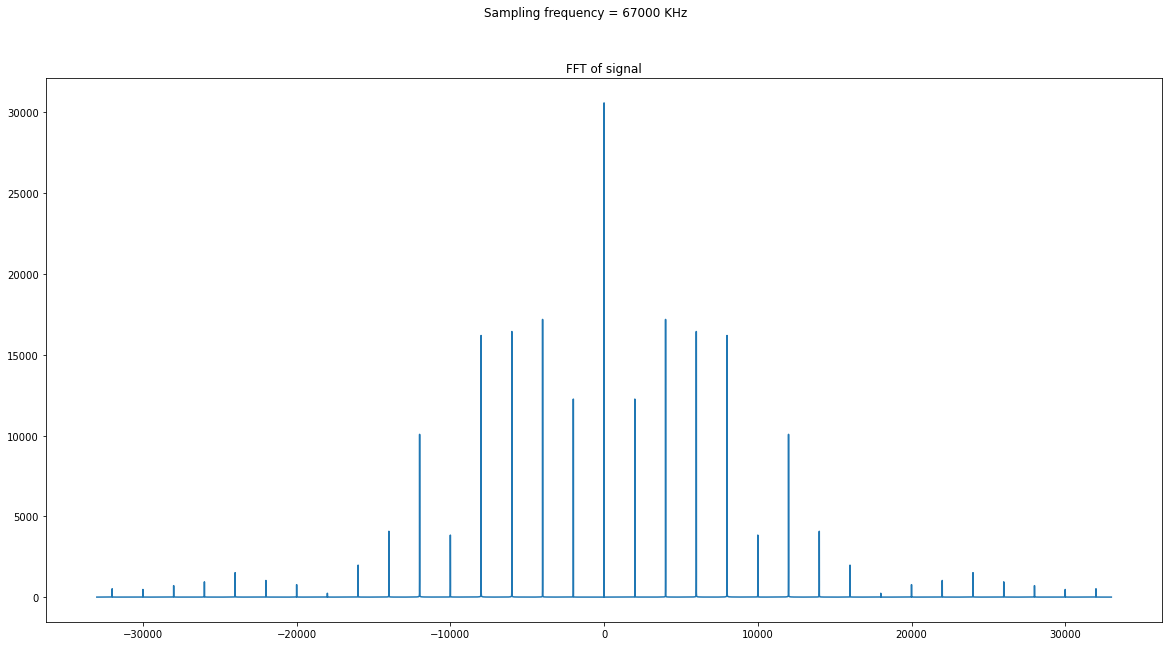

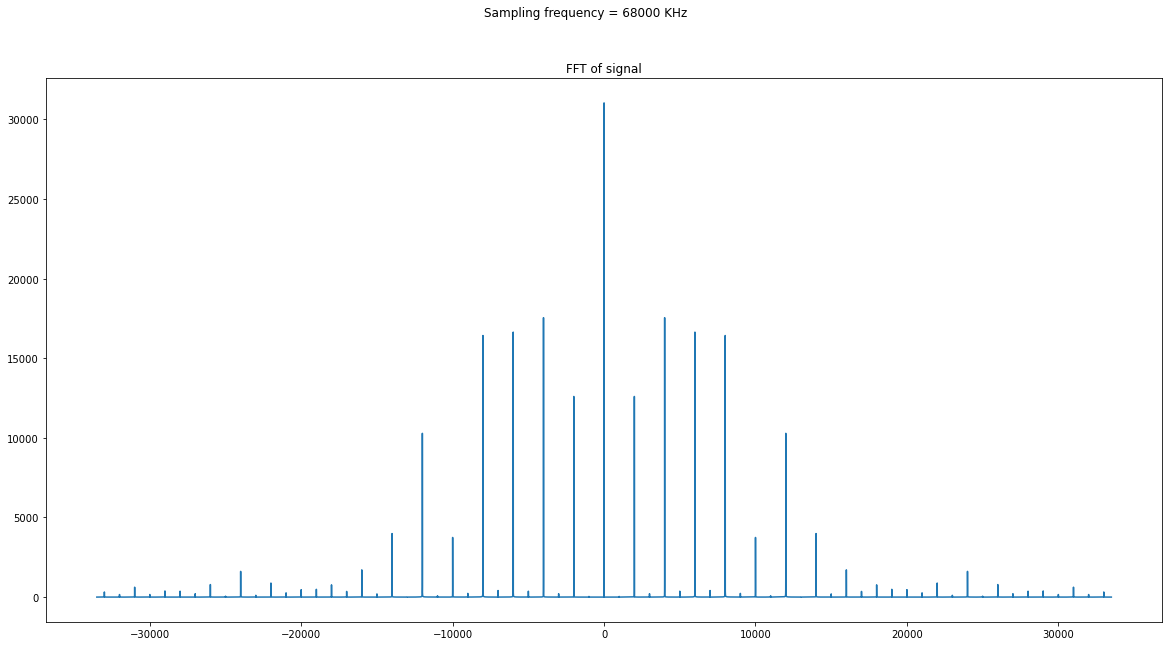

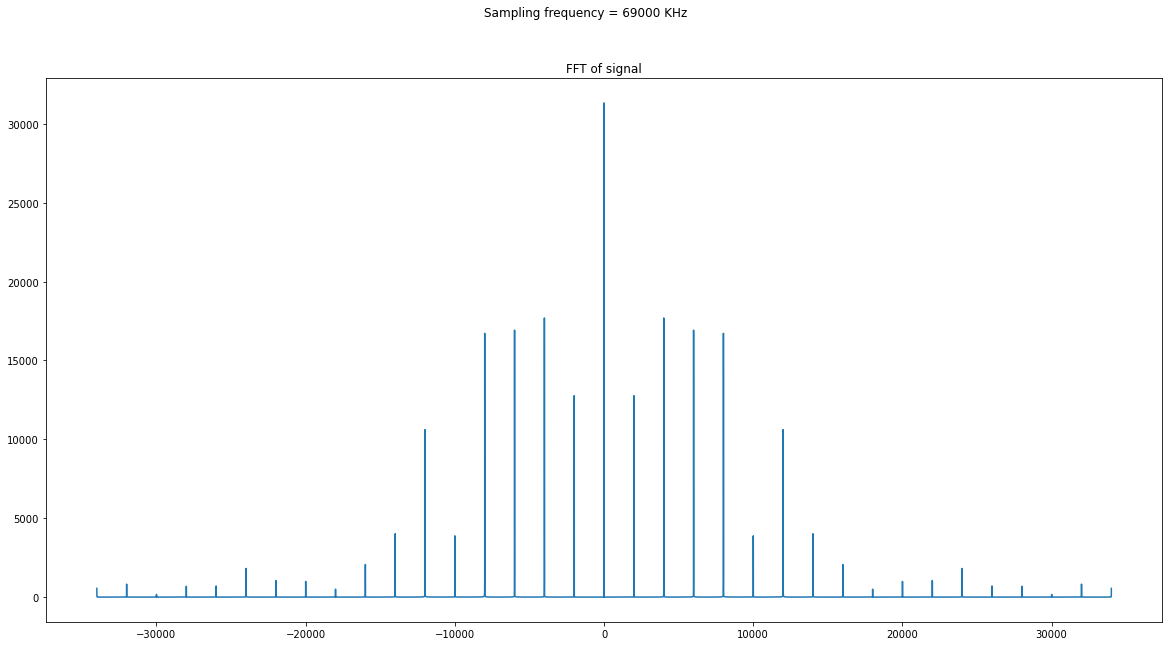

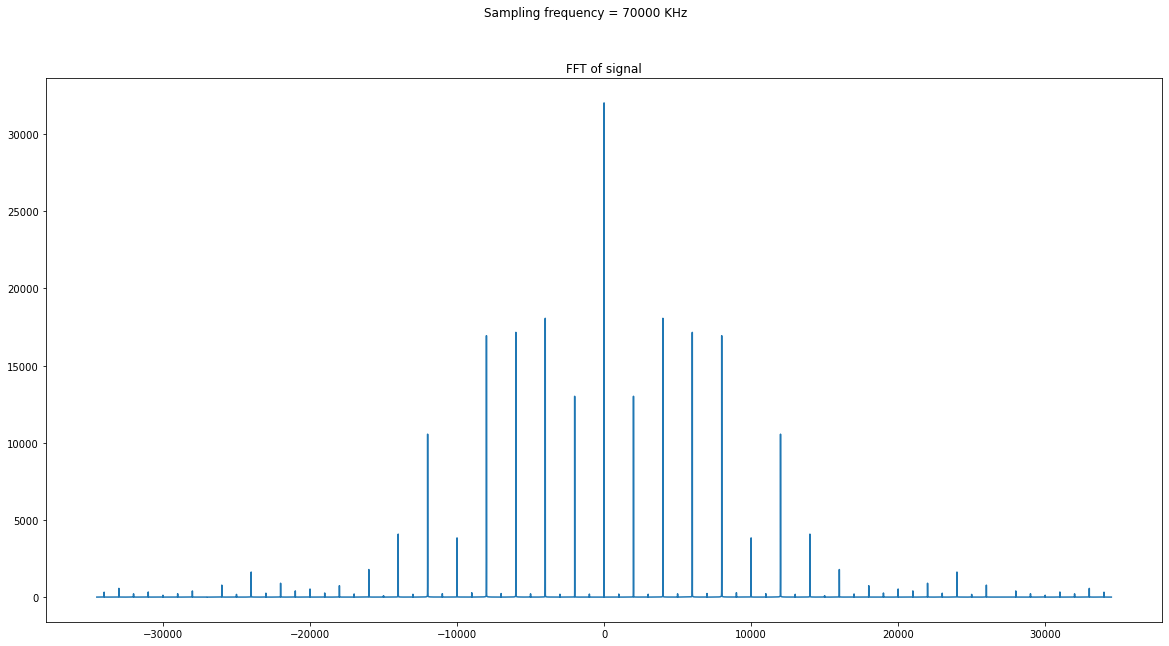

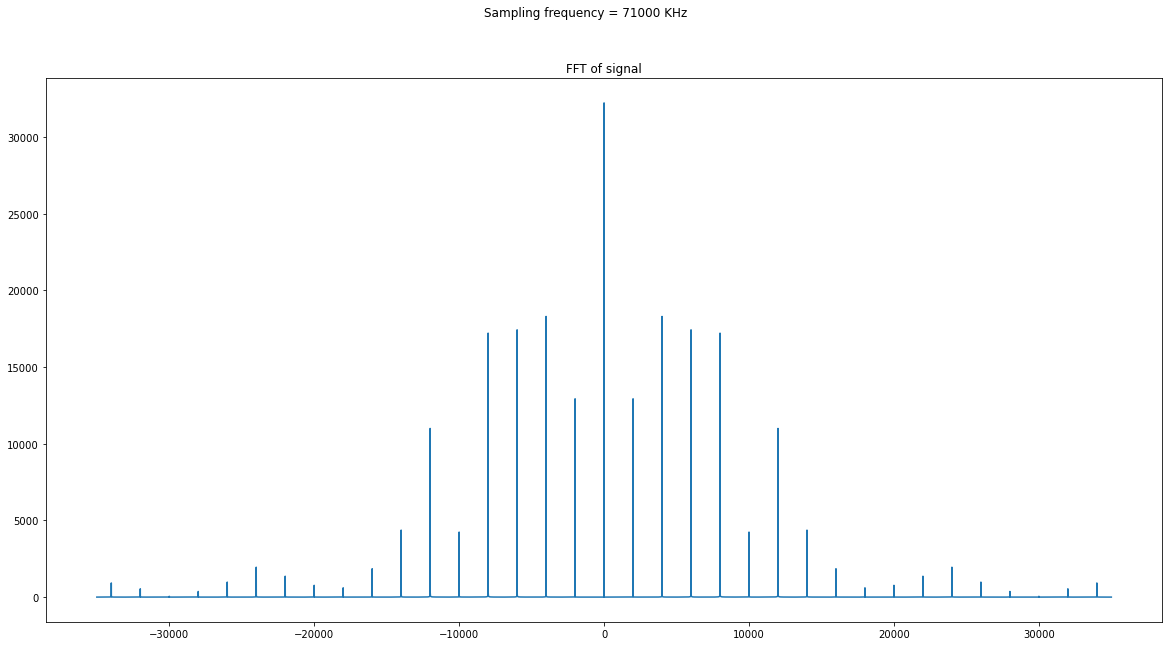

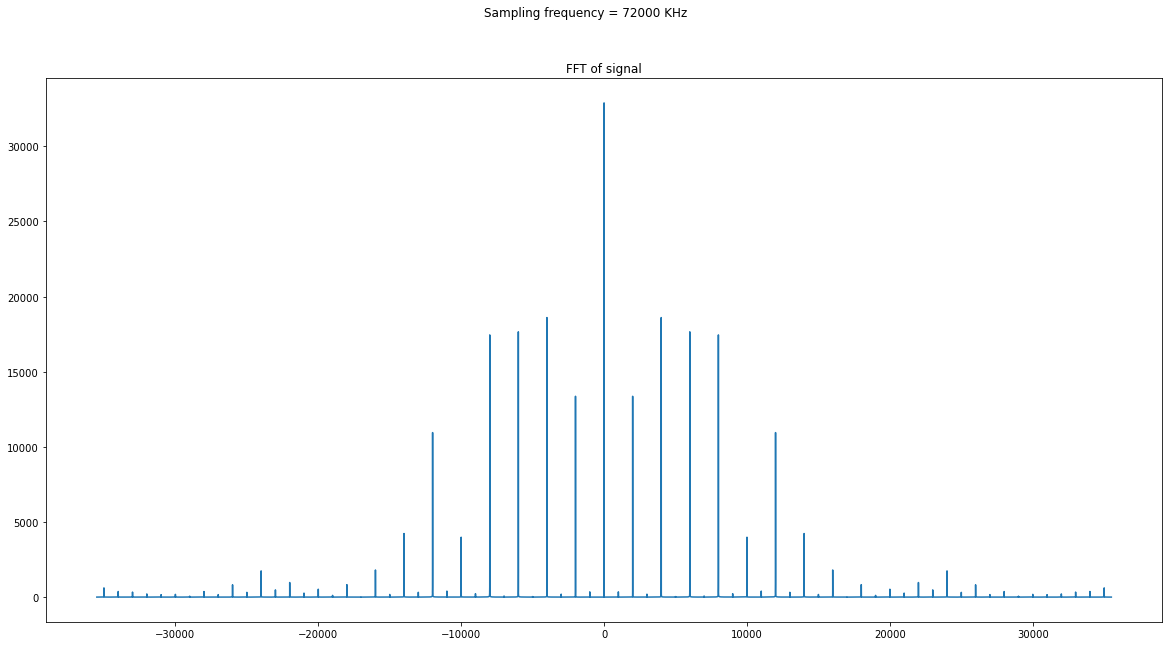

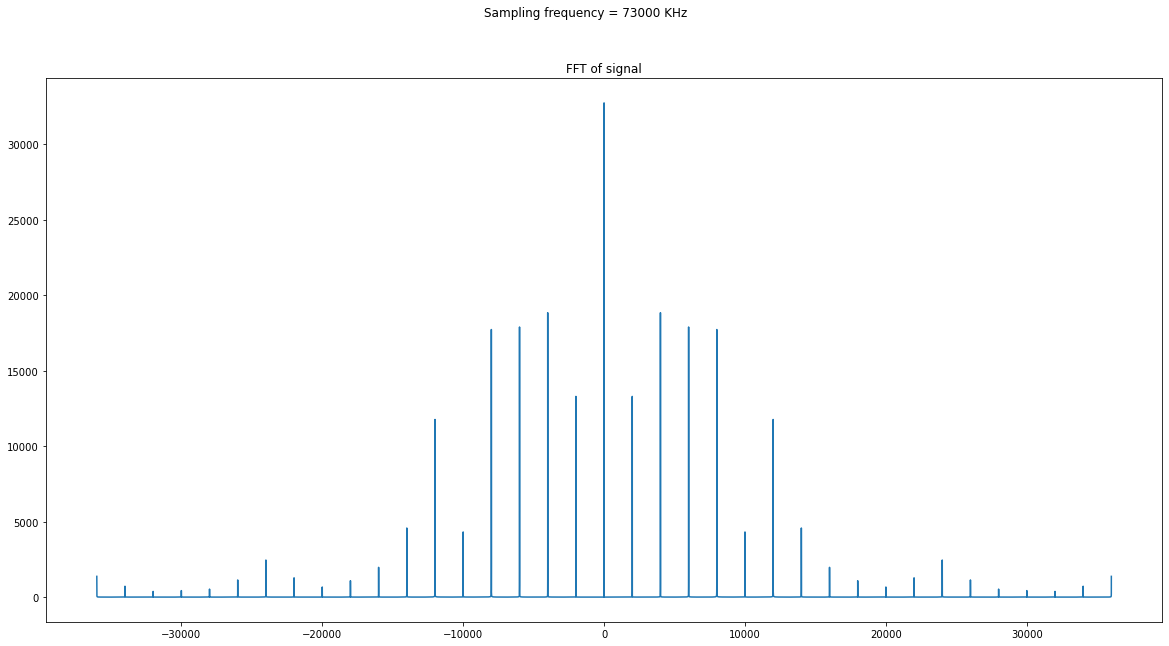

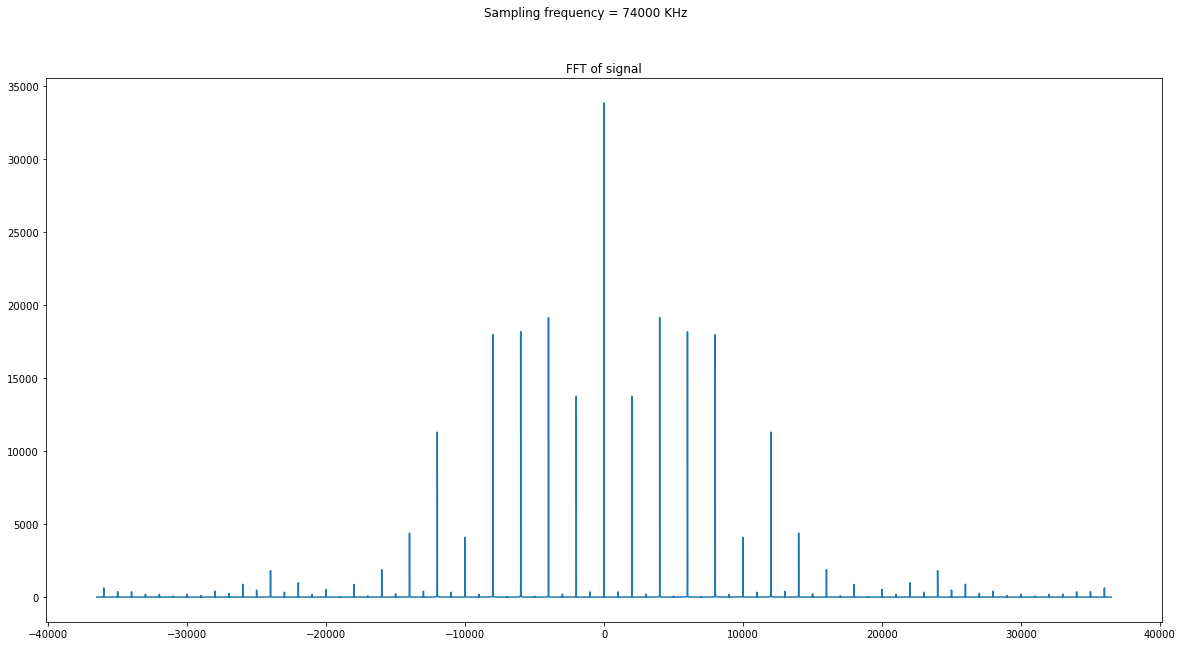

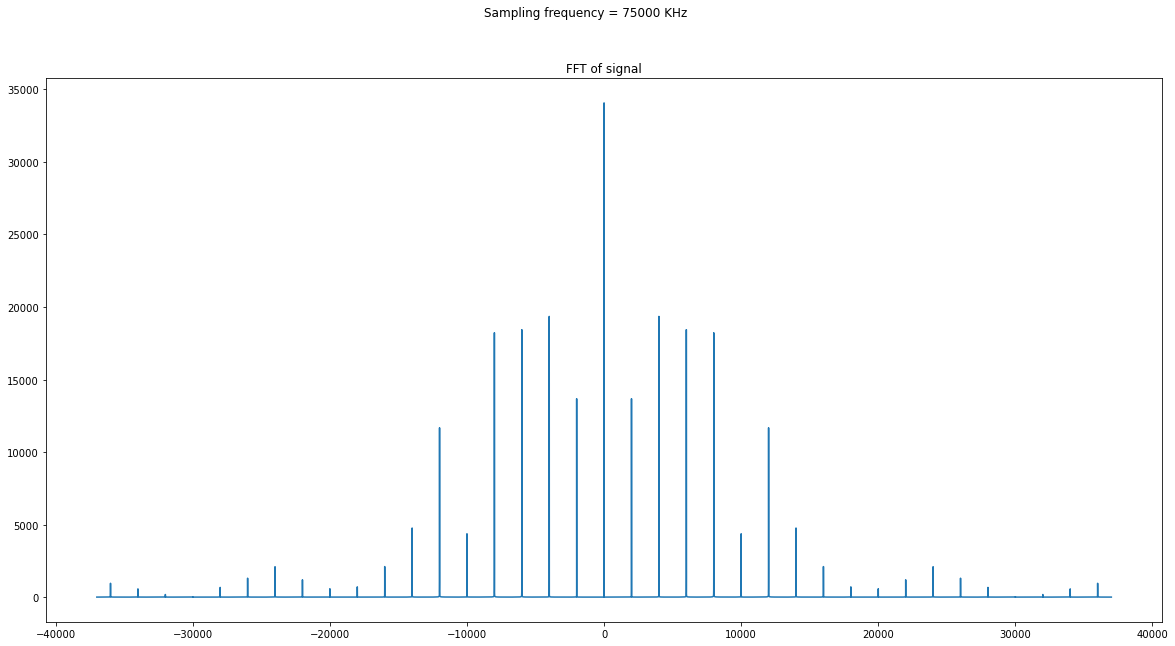

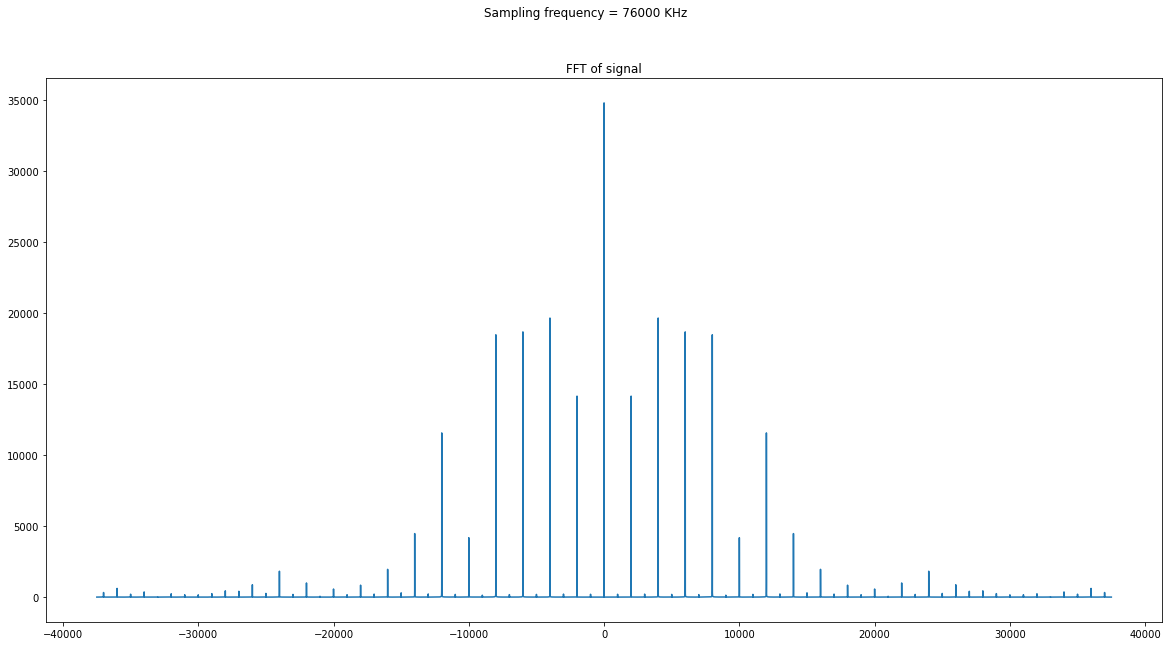

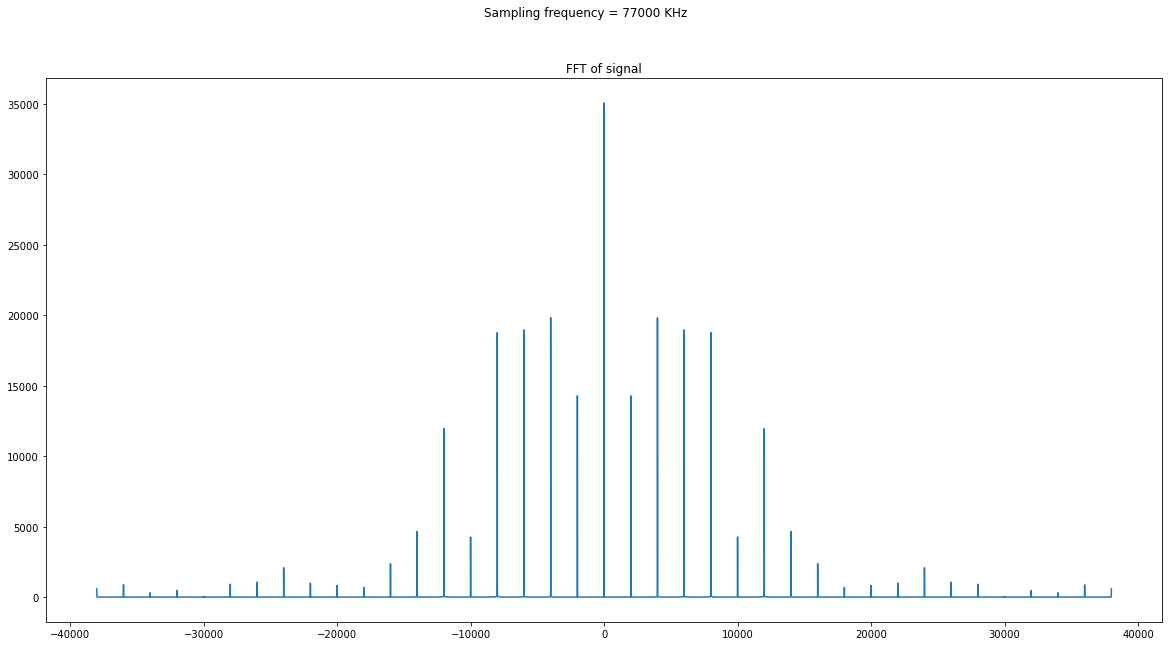

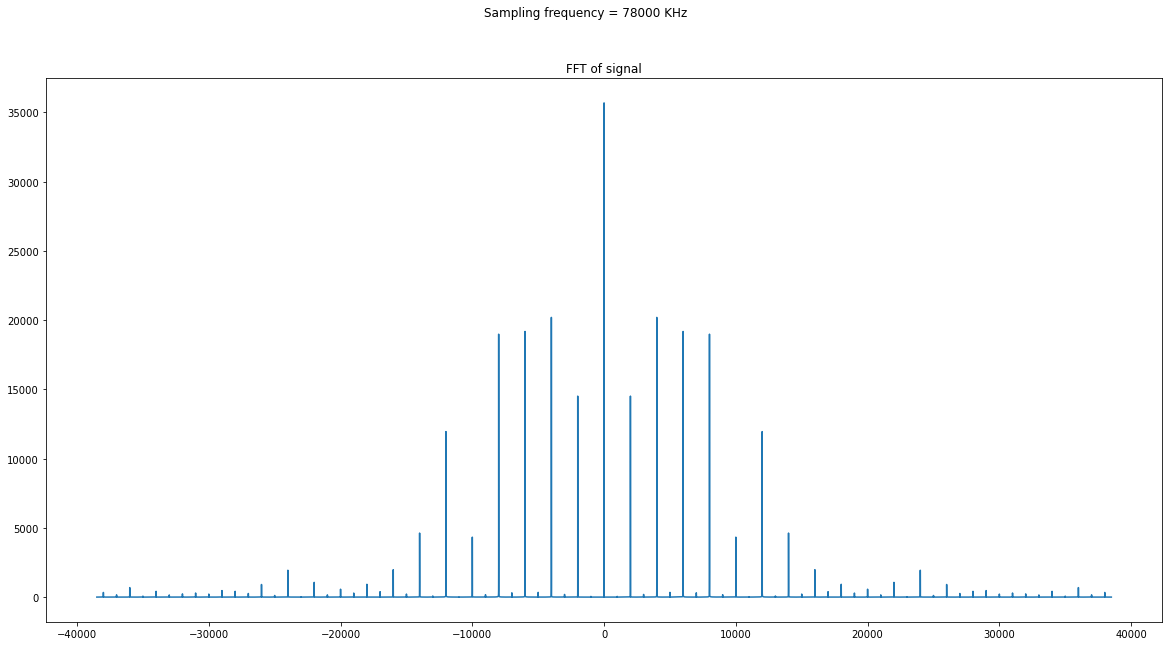

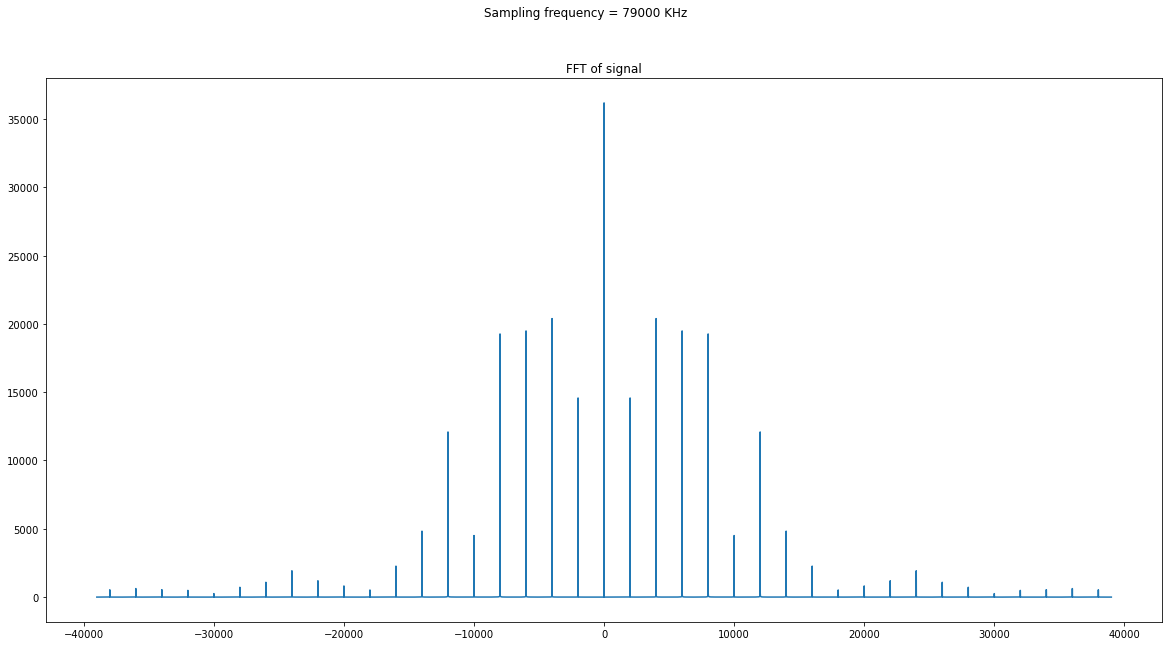

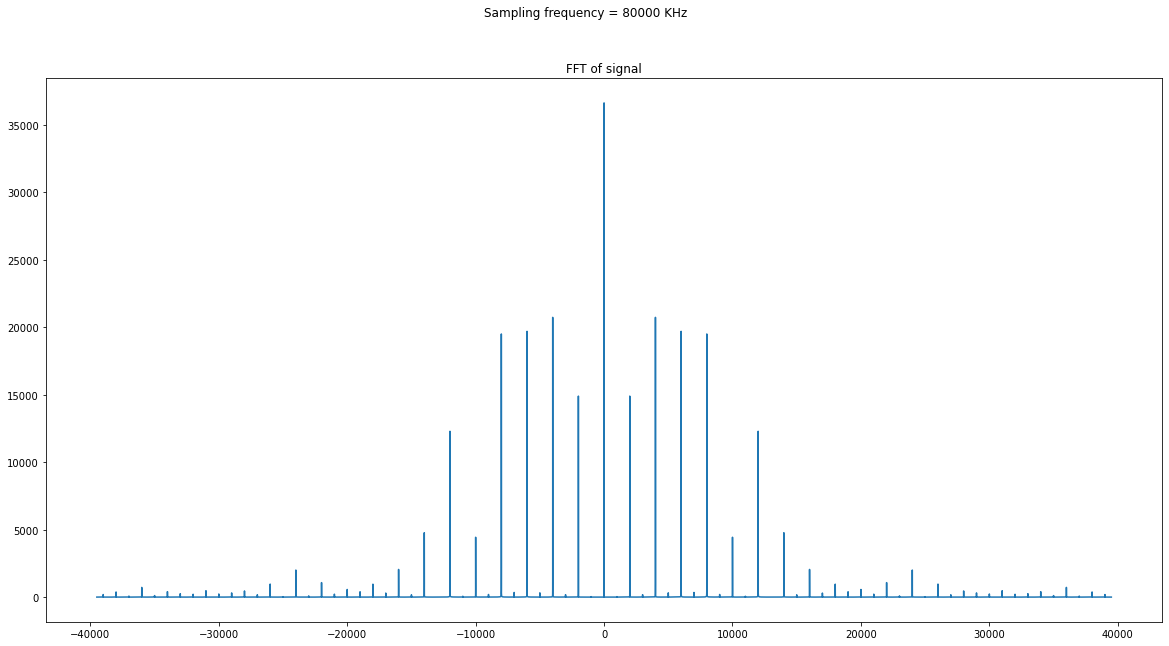

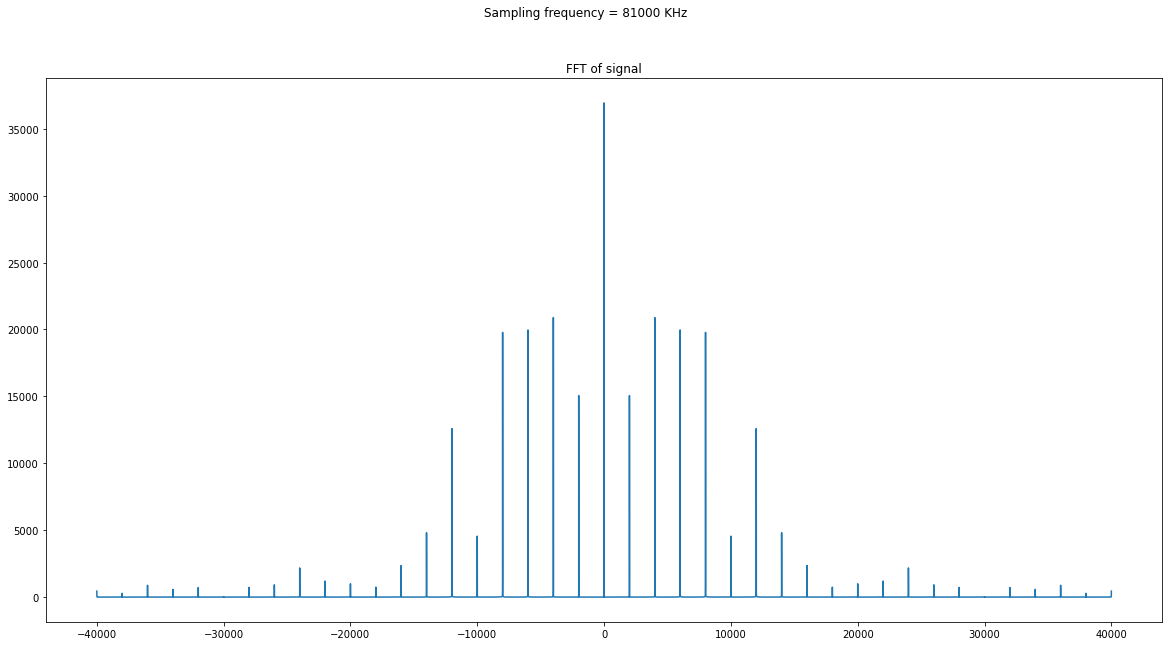

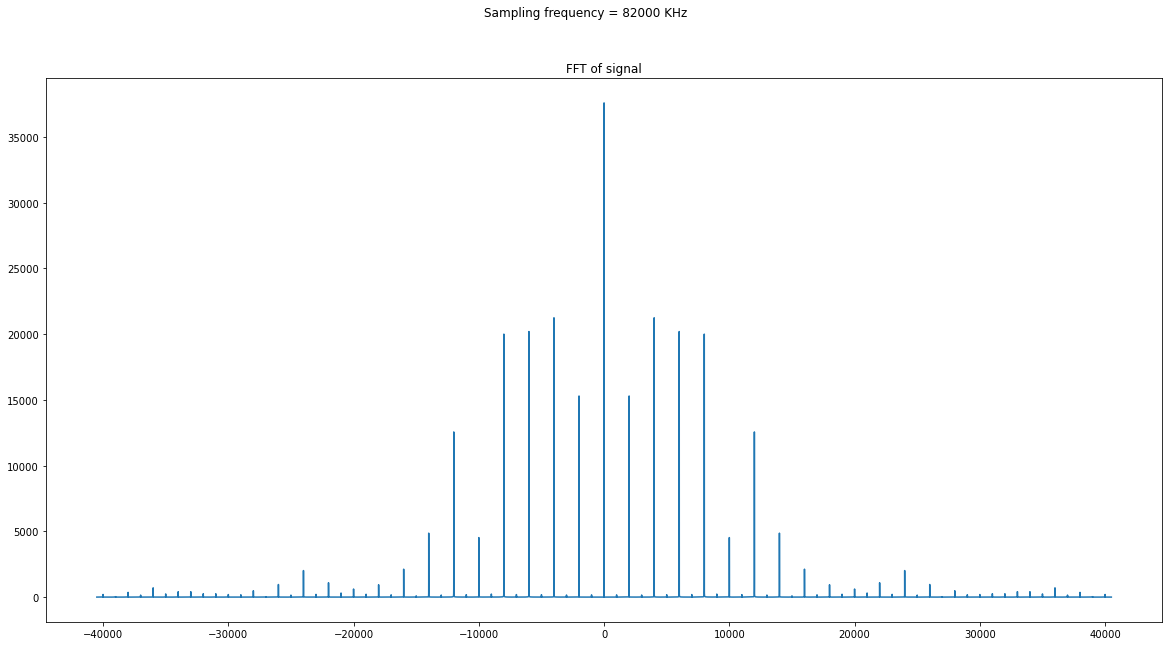

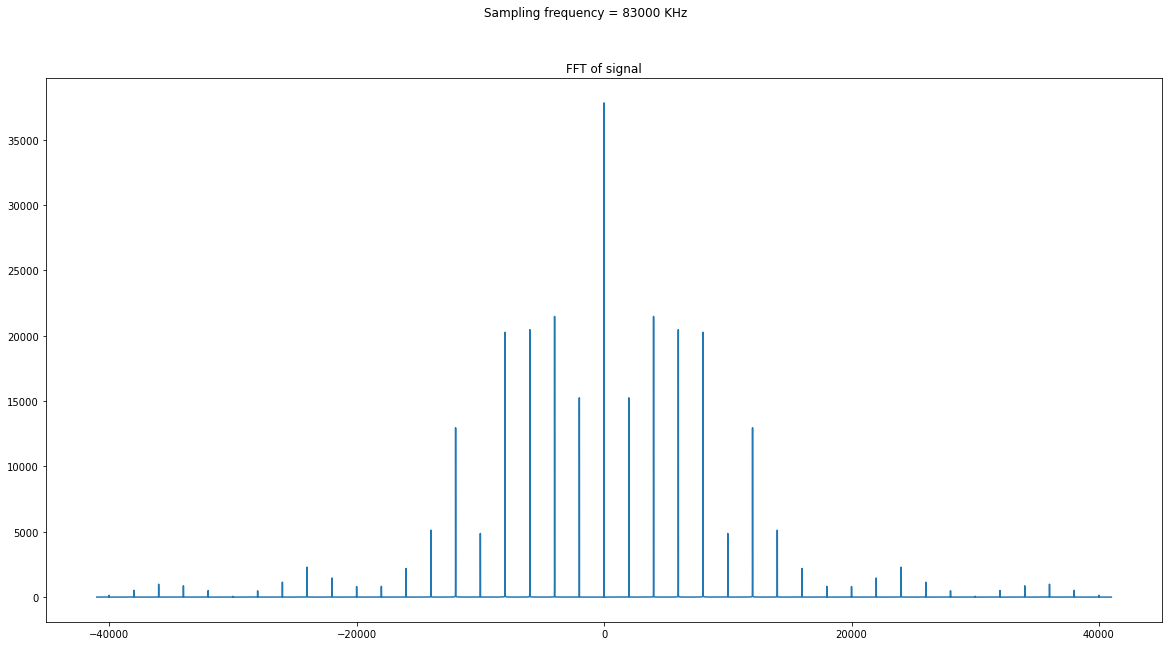

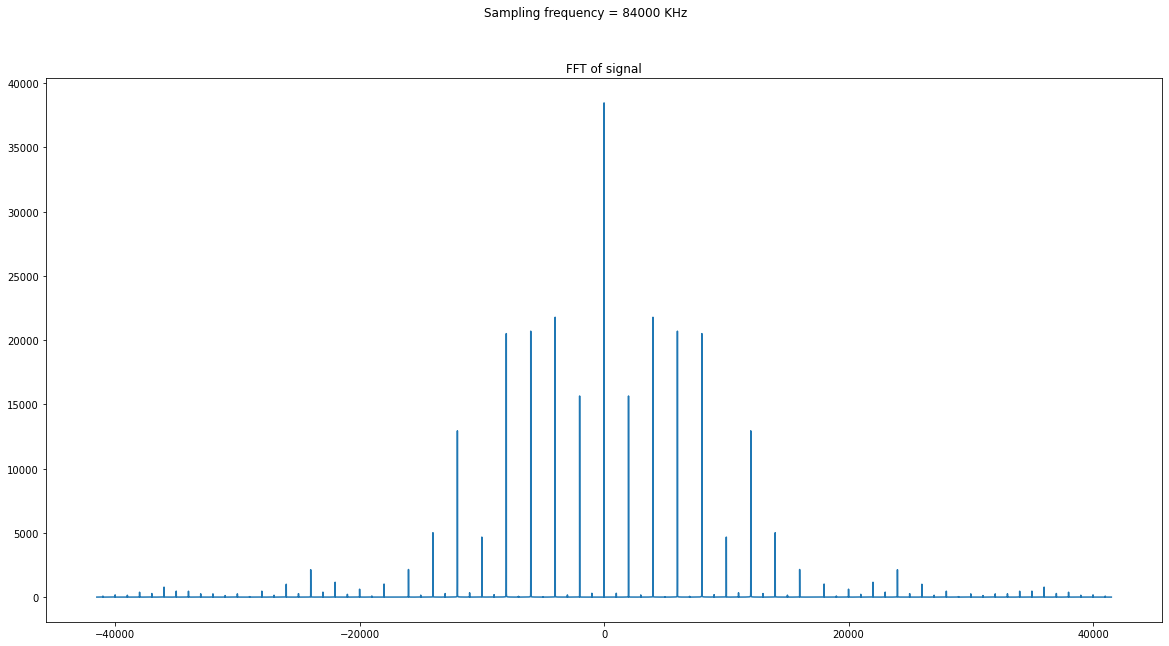

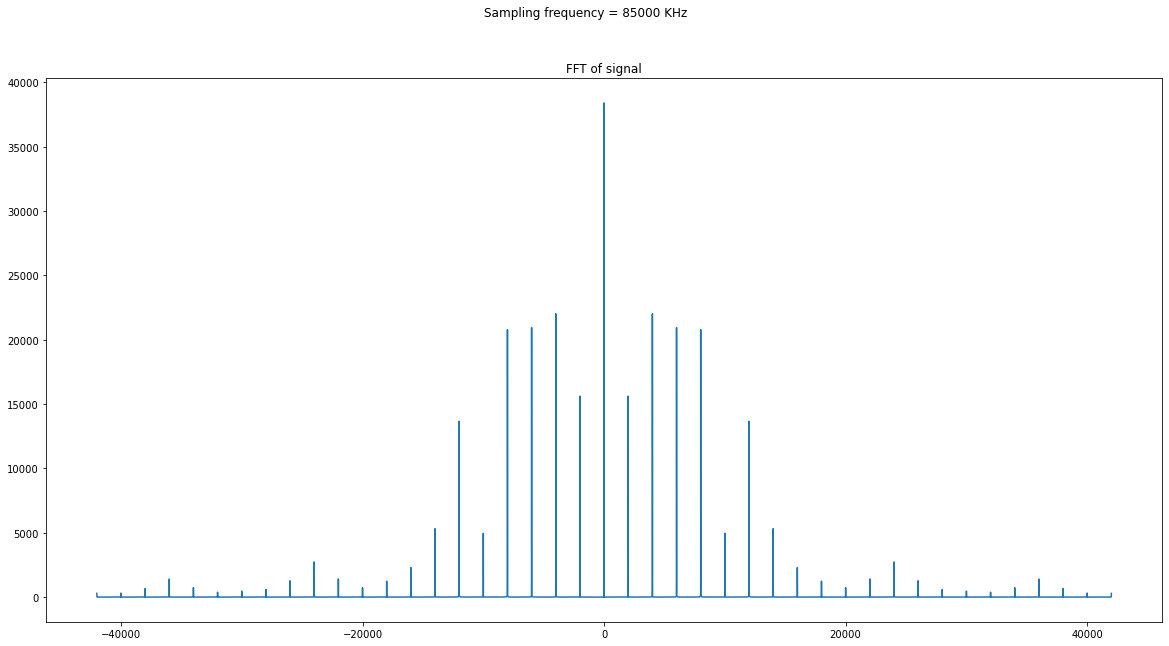

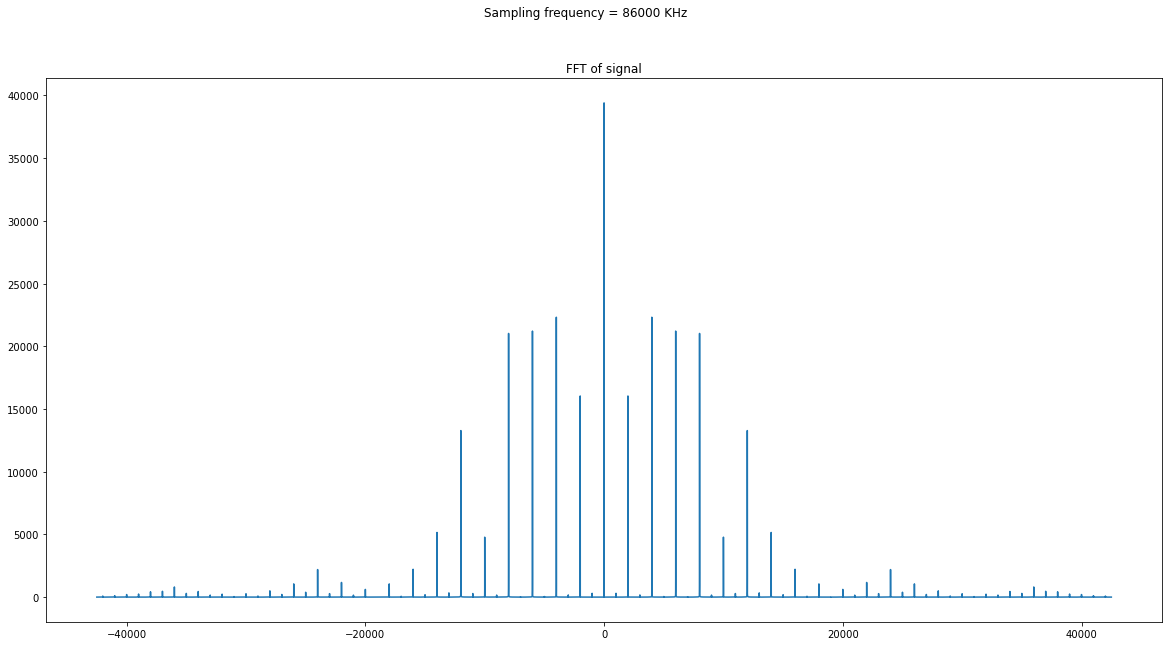

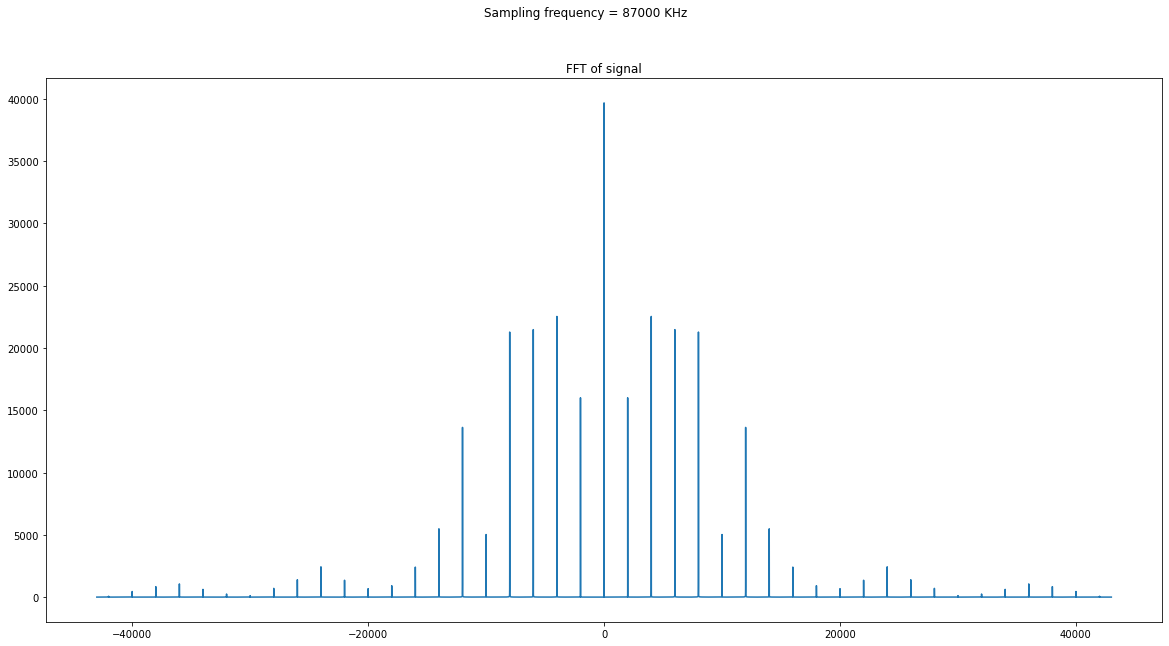

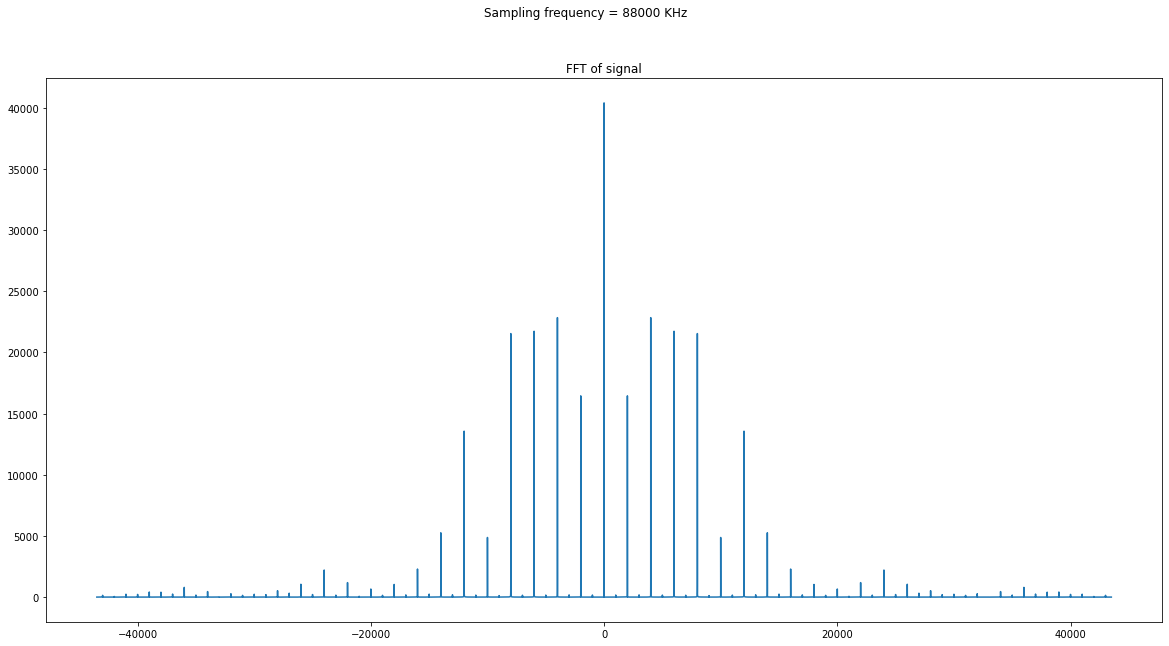

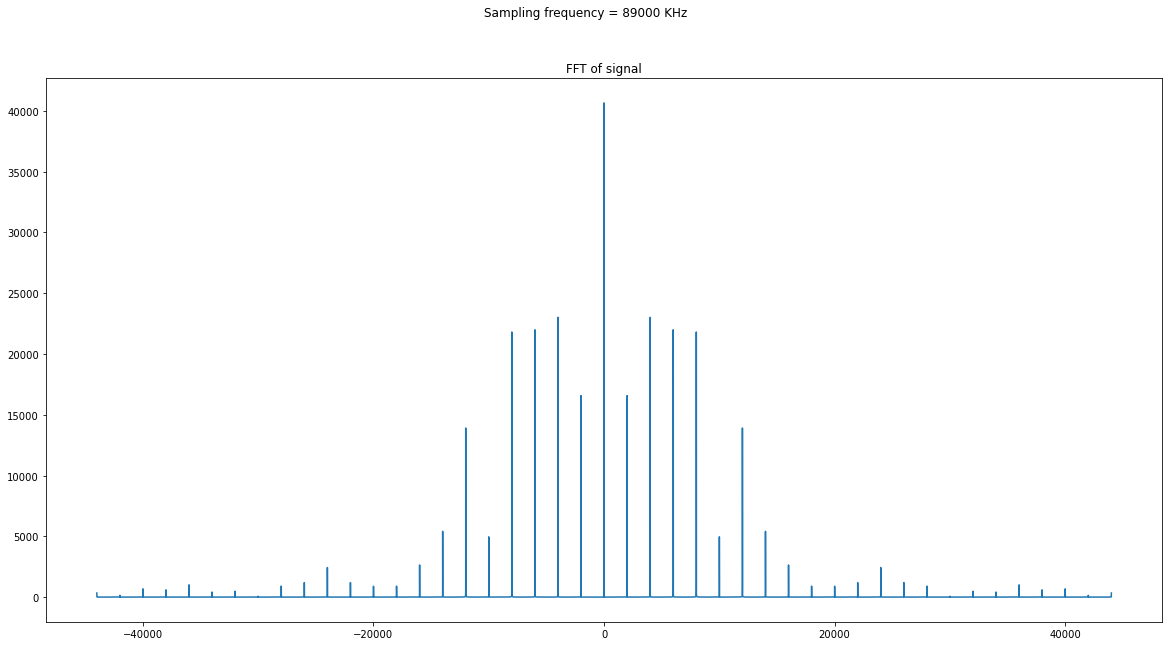

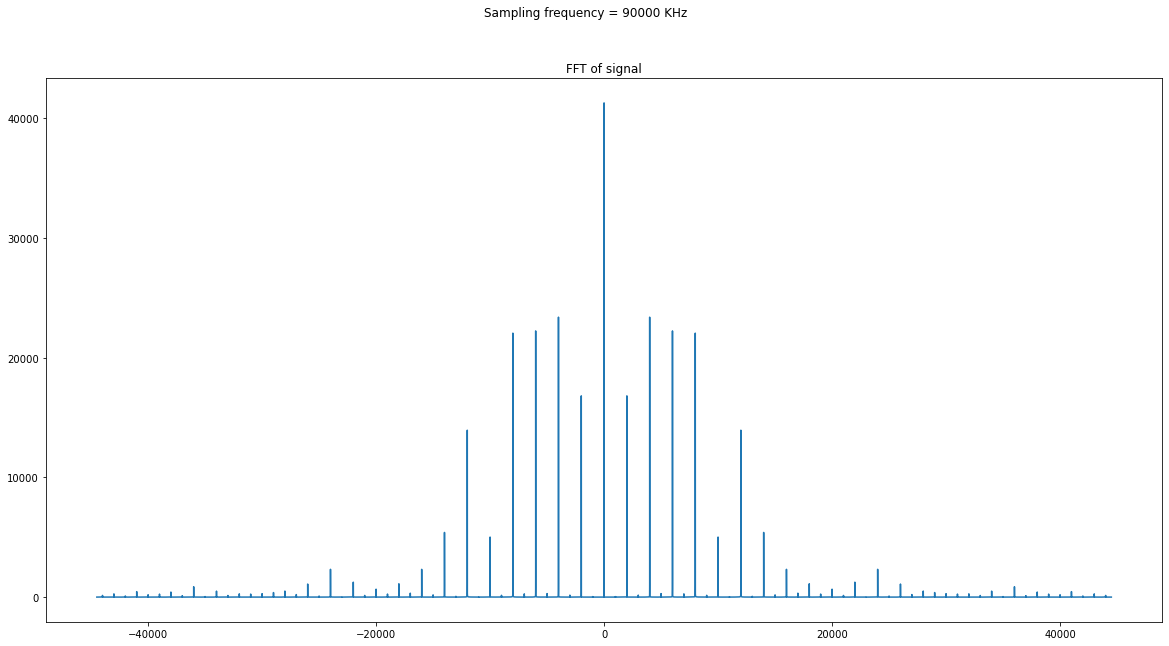

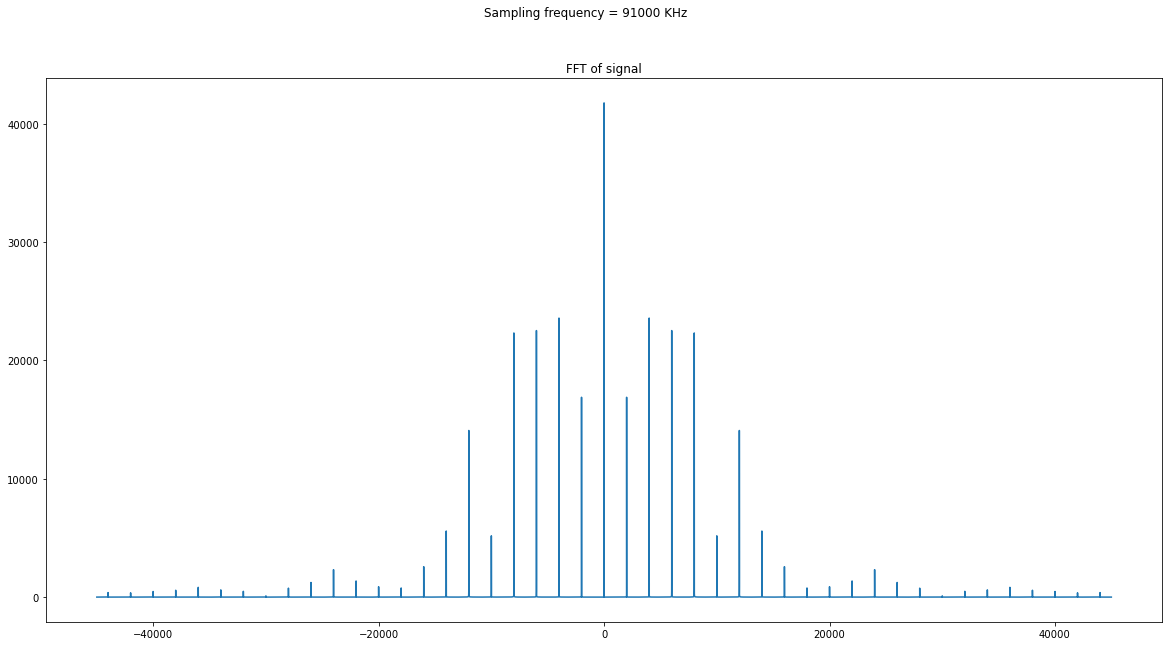

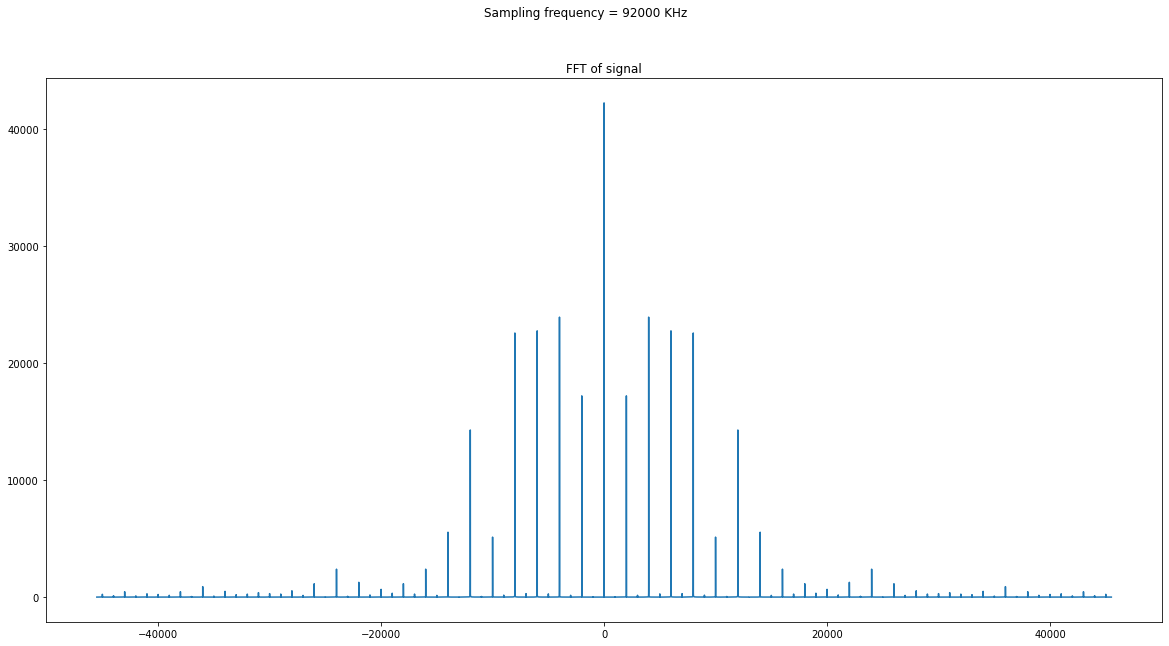

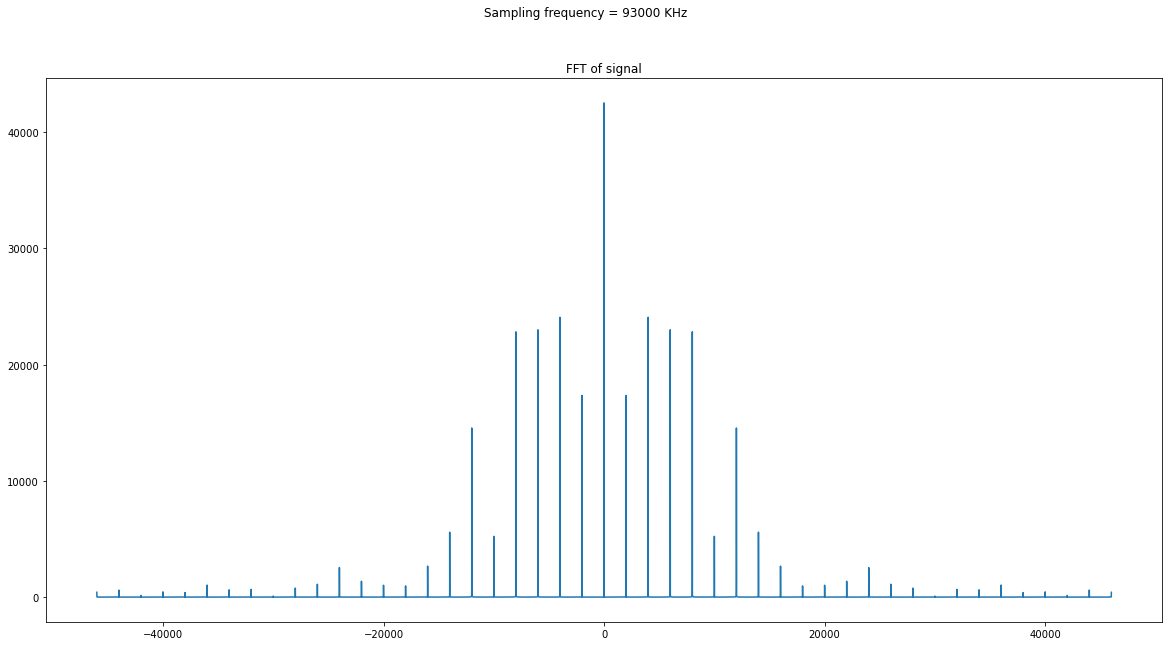

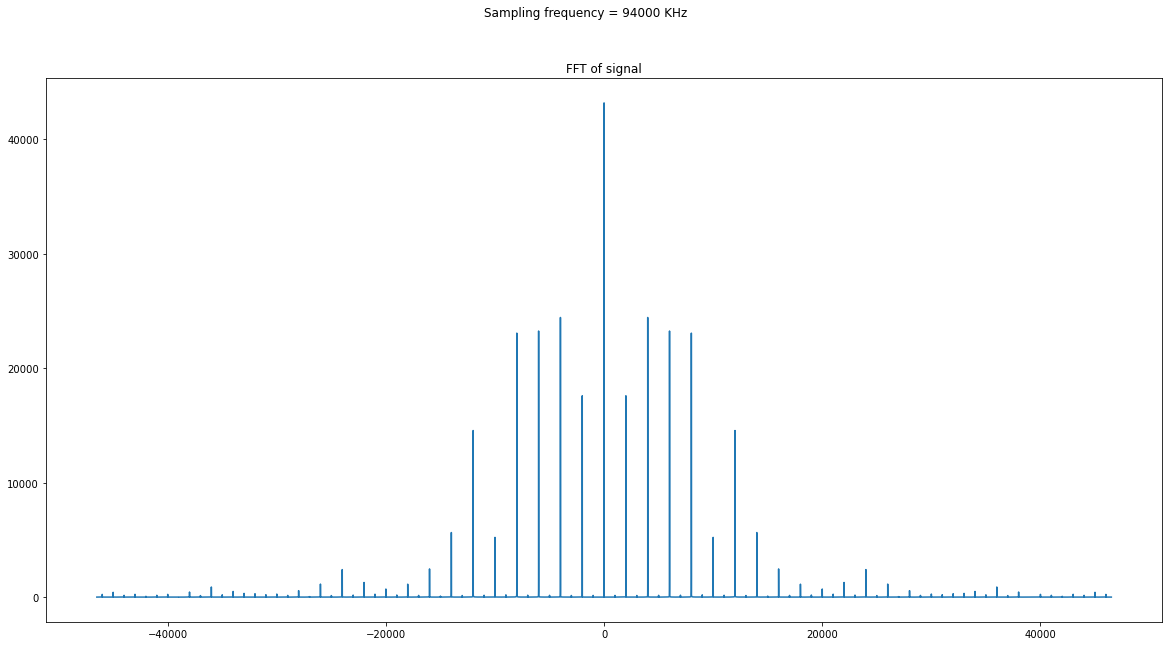

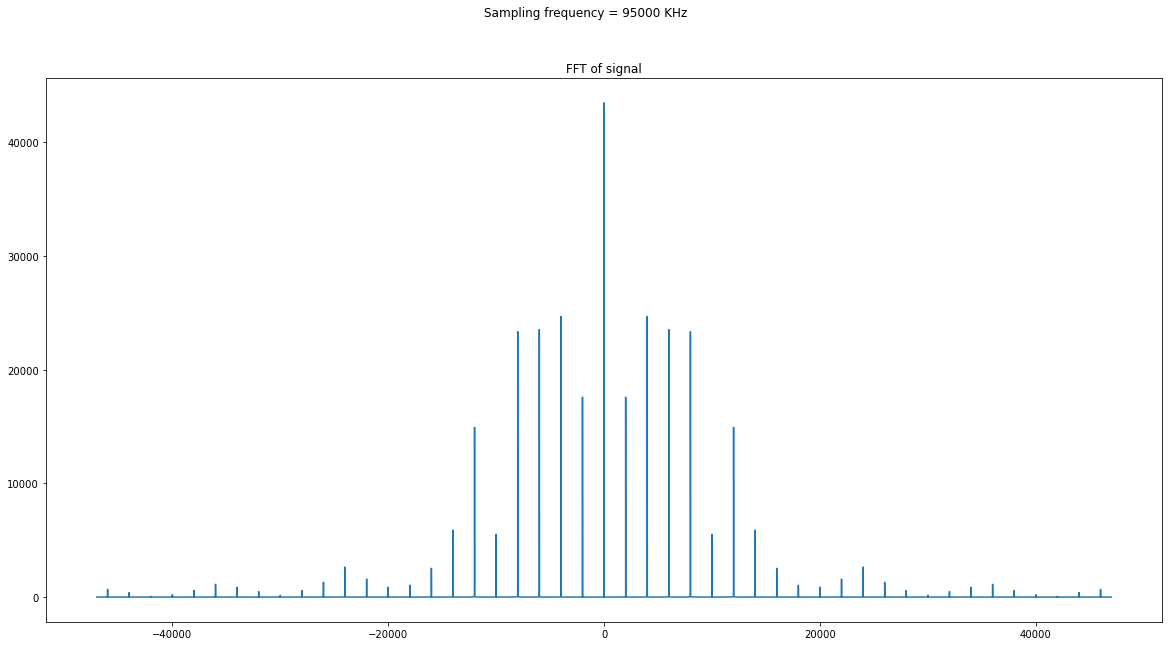

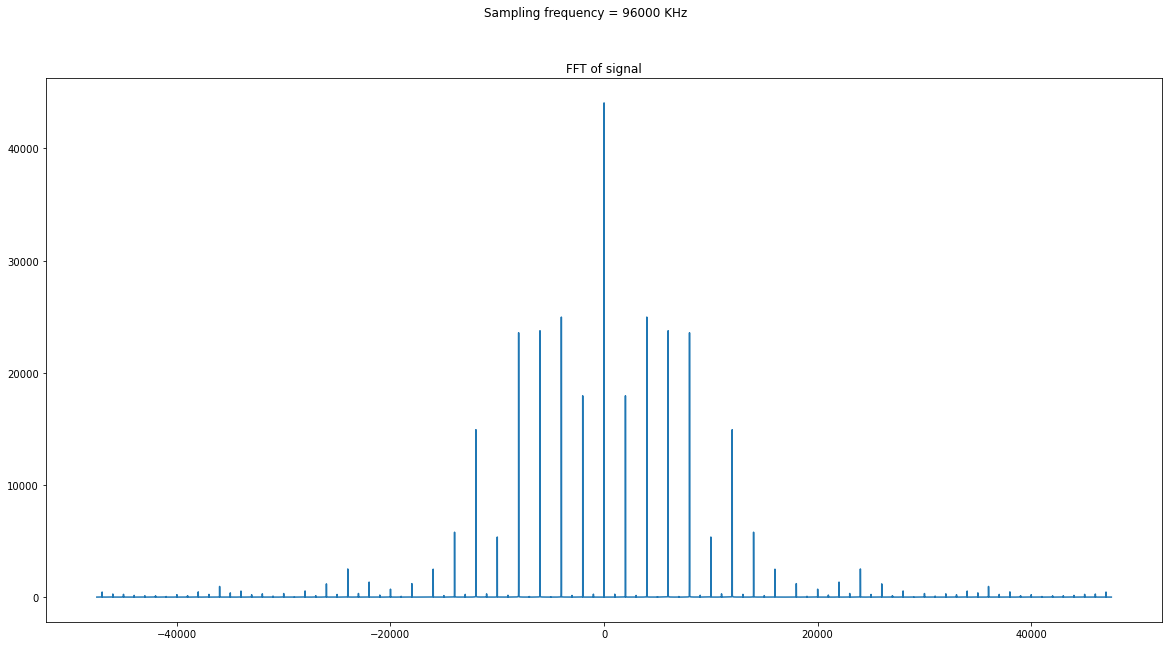

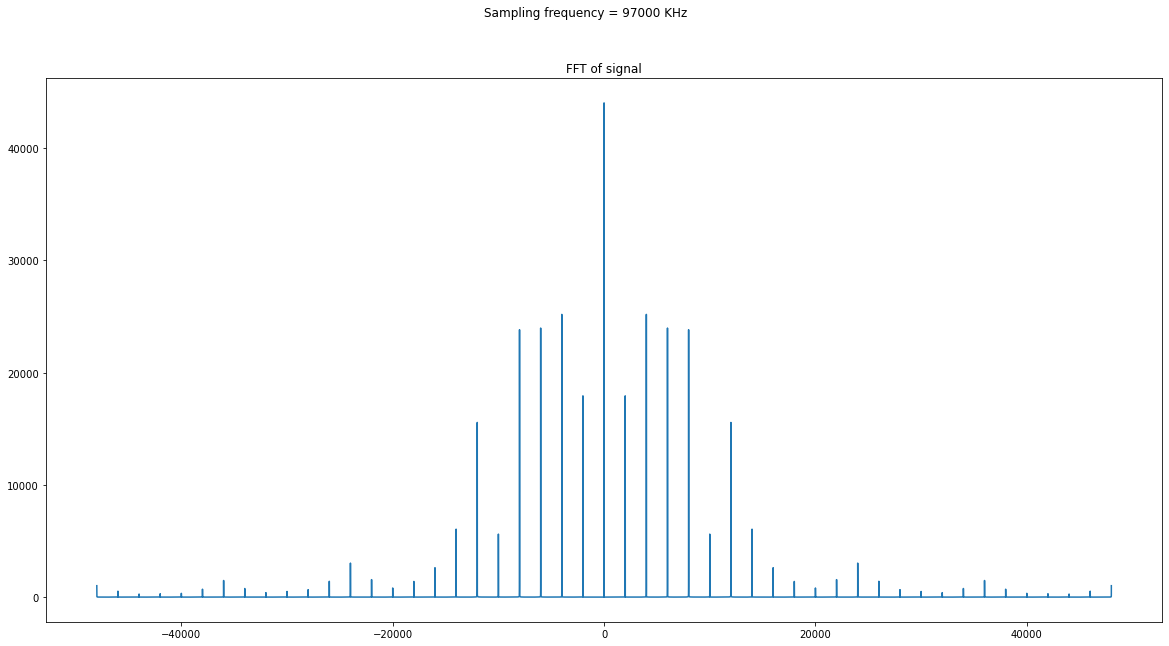

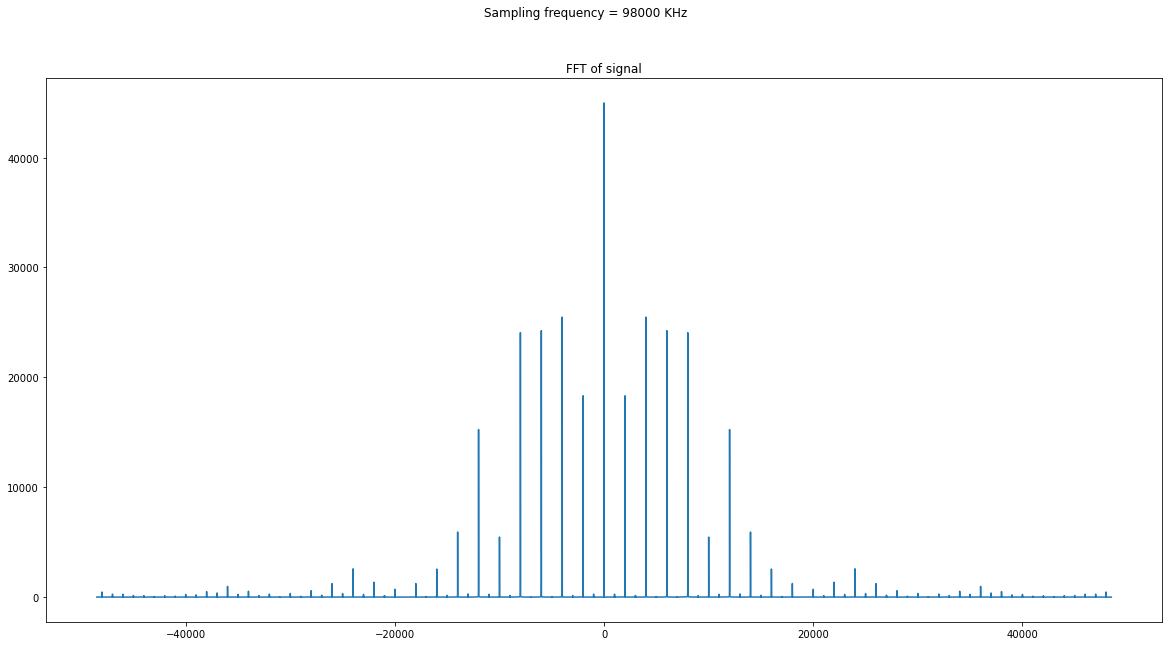

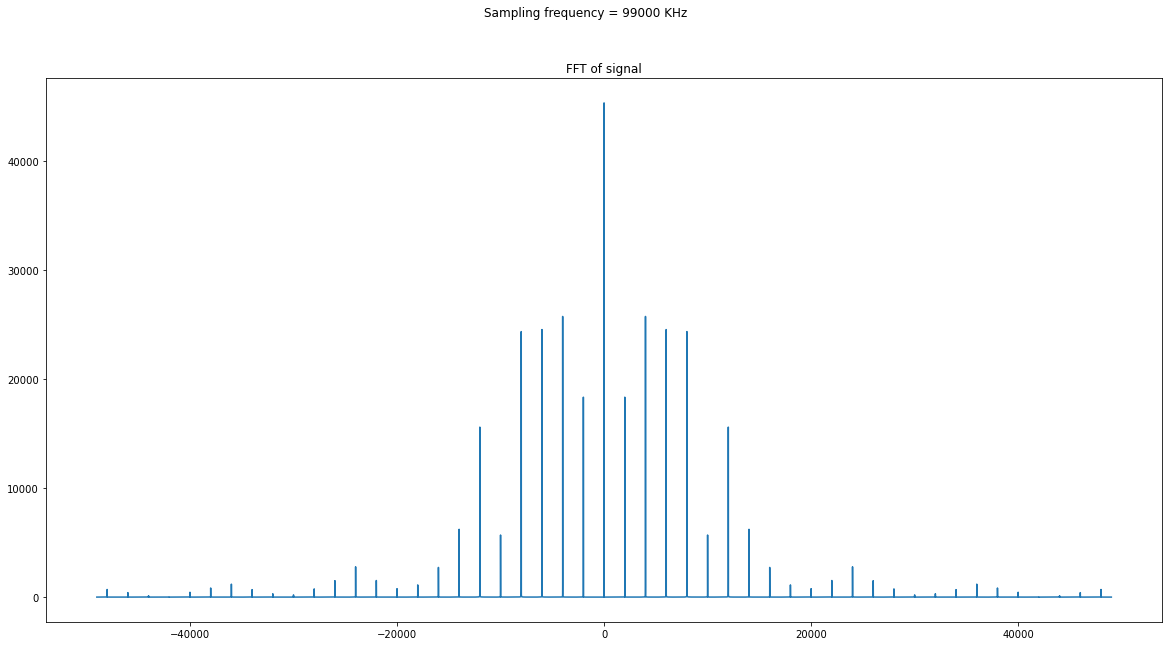

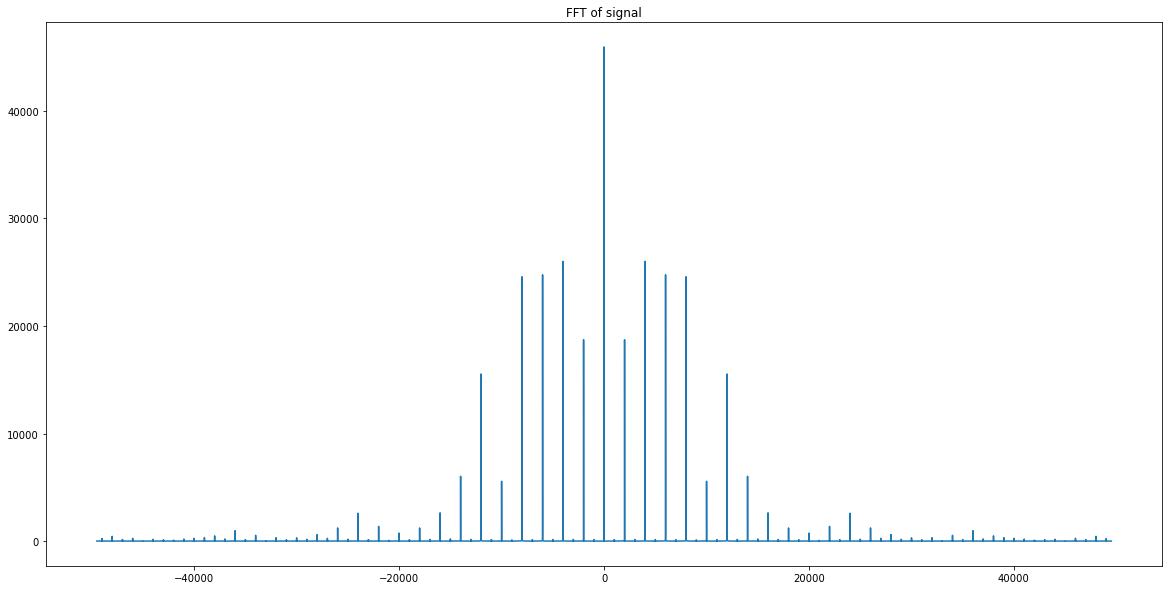

In [3]:
# Question 6

################# Part c
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import ffmpeg

for freq in range(4000,100000,1000):
    t = np.linspace(0,1,freq+1)
    s1 = np.sin(2*np.pi*4000*t)  
    s2 = np.sin(2*np.pi*6000*t)
    s3 = np.sin(2*np.pi*8000*t)
    
    st = s1 + s2 + s3
    
    # computing fft
    fft_st = scipy.fft(st)
    fft_st_shift = scipy.fft.fftshift(fft_st)
    # eliminating noisy values
    fft_st_shift[np.where(fft_st_shift<0.000001)] = 0
    
    # mapping the x axis to continuous frequency
    x = np.linspace(-freq/2,freq/2,freq+1)
    
    # saving several images to creat an animation
    file__name = "animation/fig-%d.png"%(freq)
    figure__name = "Sampling frequency = %d KHz"%(freq)
    plt.suptitle(figure__name)
    plt.figure(figsize=(20,10))
    plt.plot(x, abs(fft_st_shift))
    plt.title("FFT")
    plt.savefig(file__name)
    
# Ctreating the animation   
os.system("ffmpeg -i annimation/fig-%d.png -r 10 -vcodec mpeg4 res2.MP4")
    


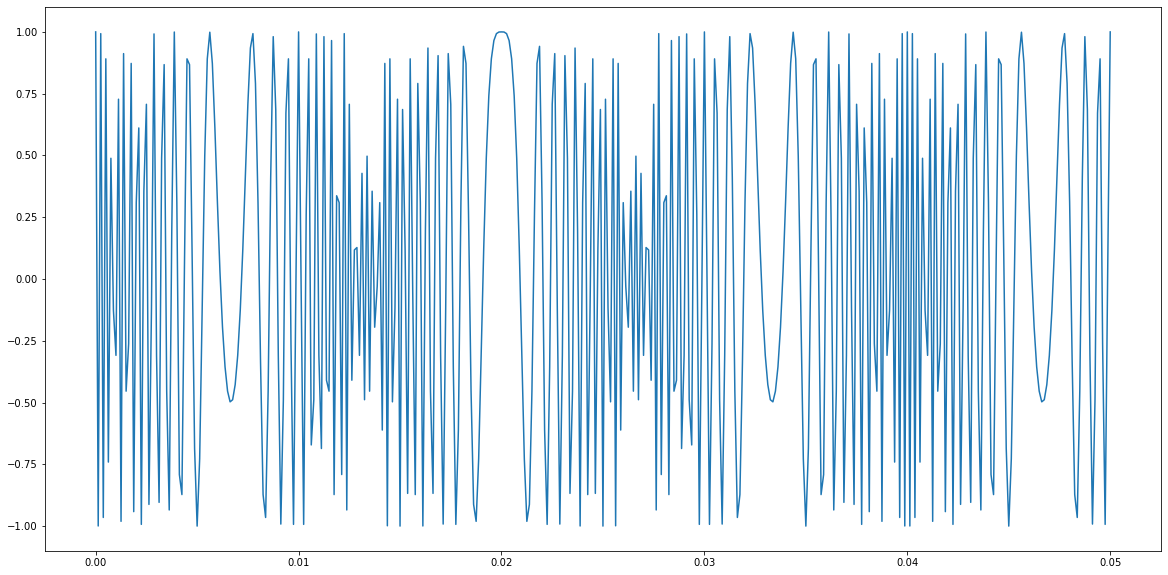

In [48]:
# Question 5

import numpy as np
import matplotlib.pyplot as plt

# Part b

mu = 600000
f1 = 4000
phi = 0

t = np.linspace(0, 0.05, 401)
s = np.cos(np.pi*mu*t*t+2*np.pi*f1*t+phi)


plt.figure(figsize=(20,10))
plt.plot(t, s)


